In [1]:
import pandas as pd
import torch
import tabensemb
tabensemb.setting["matplotlib_usetex"] = True
from src.trainer import FatigueTrainer
from tabensemb.trainer import load_trainer
import matplotlib.pyplot as plt
from tabensemb.utils.utils import global_palette, global_marker
import matplotlib
import numpy as np

# trainer = load_trainer(path='output/analyse/2023-09-23-16-18-29-0_composite_test/trainer.pkl')

device = "cuda" if torch.cuda.is_available() else "cpu"

configfile = "composite_test"
trainer = FatigueTrainer(device=device, project="analyse")
trainer.load_config(
    configfile,
    manual_config={
        "database": "composite_database_10082023",
        "data_splitter": "RandomSplitter",
    },
)
trainer.load_data()

The project will be saved to output/analyse/2023-10-13-16-07-12-0_composite_test
Dataset size: 4062 1354 1354
Data saved to output/analyse/2023-10-13-16-07-12-0_composite_test (data.csv and tabular_data.csv).


# Analyse the dataset

## Statistics

In [2]:
desc = trainer.datamodule.describe()
desc

Fibre Volume Fraction  \
count                                                 6148.000000   
mean                                                    46.445081   
std                                                     11.236202   
min                                                      0.000000   
25%                                                     38.000000   
50%                                                     50.000000   
75%                                                     54.600000   
max                                                     70.900000   
Skewness                                                -1.341580   
Gini Index                                               0.127706   
Mode                                                    50.000000   
Mode counts                                            447.000000   
Mode percentage                                          0.072707   
Kurtosis                                                 3.454504   
Percentage of points with Z-score beyond 2               0.002602   

                                            Fibre Weight Fraction  \
count                                                  702.000000   
mean                                                    71.547448   
std                                                      4.986627   
min                                                      0.000000   
25%                                                     71.468684   
50%                                                     71.985680   
75%                                                     72.838361   
max                                                     74.690000   
Skewness                                               -12.698385   
Gini Index                                               0.016365   
Mode                                                    71.500000   
Mode counts                                             65.000000   
Mode percentage                                          0.092593   
Kurtosis                                               178.674447   
Percentage of points with Z-score beyond 2               0.000000   

                                            Fibre Weight Fraction (0-deg)  \
count                                                         4931.000000   
mean                                                            57.567836   
std                                                             35.651901   
min                                                              0.000000   
25%                                                             28.000000   
50%                                                             66.000000   
75%                                                             92.000000   
max                                                            100.000000   
Skewness                                                        -0.464690   
Gini Index                                                       0.346759   
Mode                                                           100.000000   
Mode counts                                                   1021.000000   
Mode percentage                                                  0.207057   
Kurtosis                                                        -1.095504   
Percentage of points with Z-score beyond 2                       0.000000   

                                            Fibre Weight Fraction (45-deg)  \
count                                                          4931.000000   
mean                                                             28.527479   
std                                                              29.537740   
min                                                               0.000000   
25%                                                               0.000000   
50%                                                              26.000000   
75%                                                    

In [3]:
res = trainer.cal_theoretical_pof50(max_stress_col="Maximum Stress", r_value_col="R-value", freq_col="Frequency")
from tabensemb.utils import auto_metric_sklearn
auto_metric_sklearn(trainer.df["log10(Cycles to Failure)"].values, res, metric="rmse", task="regression"), auto_metric_sklearn(trainer.df["log10(Cycles to Failure)"].values, res, metric="mape", task="regression"), auto_metric_sklearn(10**trainer.df["log10(Cycles to Failure)"].values, 10**res, metric="rmse", task="regression"), auto_metric_sklearn(10**trainer.df["log10(Cycles to Failure)"].values, 10**res, metric="mape", task="regression")

Theoretical accuracy at PoF=50% (gaussian distribution):
	 Training MSE 0.03677, RMSE 0.19174
	 Validation MSE 0.03064, RMSE 0.17504
	 Testing MSE 0.03590, RMSE 0.18948
	 Overall MSE 0.03537, RMSE 0.18806


(0.18806268756573194,
 0.025854839755728762,
 51063899.78816517,
 0.2810966774843461)

In [4]:
unique_values, counts = np.unique(res, return_counts=True)
unique_values_rep = unique_values[counts>=2]
rep_idx = np.concatenate([np.where(res==val)[0] for val in unique_values_rep])
auto_metric_sklearn(trainer.df["log10(Cycles to Failure)"].values[rep_idx], res[rep_idx], metric="rmse", task="regression"), auto_metric_sklearn(trainer.df["log10(Cycles to Failure)"].values[rep_idx], res[rep_idx], metric="mape", task="regression"), auto_metric_sklearn(10**trainer.df["log10(Cycles to Failure)"].values[rep_idx], 10**res[rep_idx], metric="rmse", task="regression"), auto_metric_sklearn(10**trainer.df["log10(Cycles to Failure)"].values[rep_idx], 10**res[rep_idx], metric="mape", task="regression")

(0.24857710119882917,
 0.04517090713452483,
 67495133.40232903,
 0.49110309846942524)

In [5]:
# res = trainer.cal_theoretical_pof50(max_stress_col="Maximum Stress", r_value_col="R-value", freq_col="Frequency", distribution="weibull")
# auto_metric_sklearn(trainer.df["log10(Cycles to Failure)"].values, res, metric="rmse", task="regression"), auto_metric_sklearn(trainer.df["log10(Cycles to Failure)"].values, res, metric="mape", task="regression"), auto_metric_sklearn(10**trainer.df["log10(Cycles to Failure)"].values, 10**res, metric="rmse", task="regression"), auto_metric_sklearn(10**trainer.df["log10(Cycles to Failure)"].values, 10**res, metric="mape", task="regression")

# out>> (0.26512630916654323,
#  0.032604599797592226,
#  60973391.13655199,
#  0.3865772744246053)

In [6]:
# unique_values, counts = np.unique(res, return_counts=True)
# unique_values_rep = unique_values[counts>=2]
# rep_idx = np.concatenate([np.where(res==val)[0] for val in unique_values_rep])
# auto_metric_sklearn(trainer.df["log10(Cycles to Failure)"].values[rep_idx], res[rep_idx], metric="rmse", task="regression"), auto_metric_sklearn(trainer.df["log10(Cycles to Failure)"].values[rep_idx], res[rep_idx], metric="mape", task="regression"), auto_metric_sklearn(10**trainer.df["log10(Cycles to Failure)"].values[rep_idx], 10**res[rep_idx], metric="rmse", task="regression"), auto_metric_sklearn(10**trainer.df["log10(Cycles to Failure)"].values[rep_idx], 10**res[rep_idx], metric="mape", task="regression")

# out>> (0.350483318450984, 0.05697809515480108, 80603681.05273384, 0.6755622477683474)

### Z-score

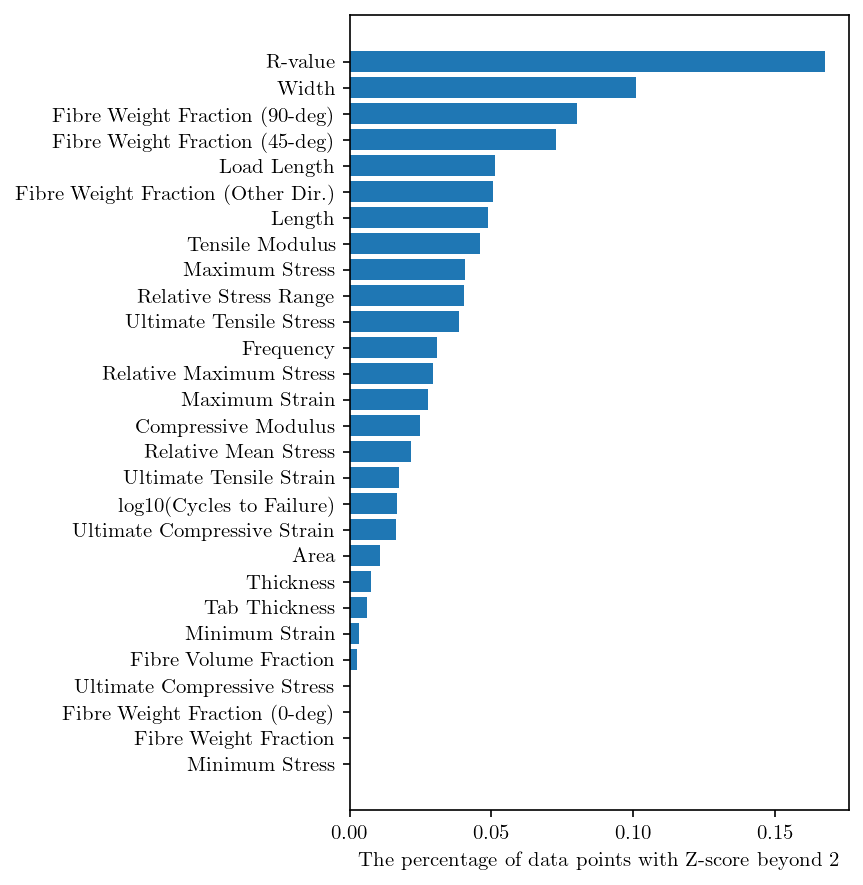

In [7]:
plt.figure(figsize=(6, 6), dpi=150)
ax = plt.subplot(111)
features = [x for x in desc.columns if x not in trainer.cat_feature_names]
values = desc.loc["Percentage of points with Z-score beyond 2", features].values
order = np.argsort(values)
ax.barh(y=np.array(features)[order], width=values[order])
ax.set_xlabel("The percentage of data points with Z-score beyond 2")
plt.tight_layout()
plt.show()

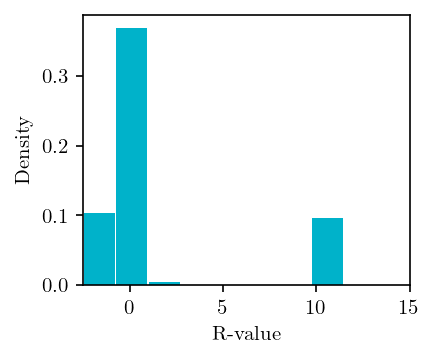

<AxesSubplot:xlabel='R-value', ylabel='Density'>

In [8]:
trainer.plot_hist(feature="R-value", figure_kwargs=dict(figsize=(3, 2.5), dpi=150))

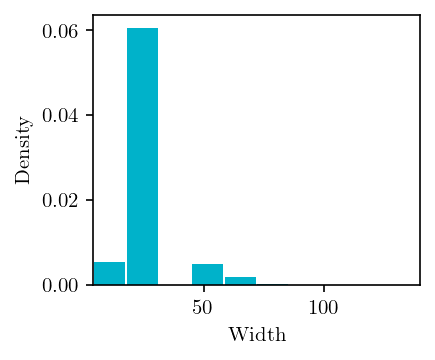

<AxesSubplot:xlabel='Width', ylabel='Density'>

In [9]:
trainer.plot_hist(feature="Width", figure_kwargs=dict(figsize=(3, 2.5), dpi=150))

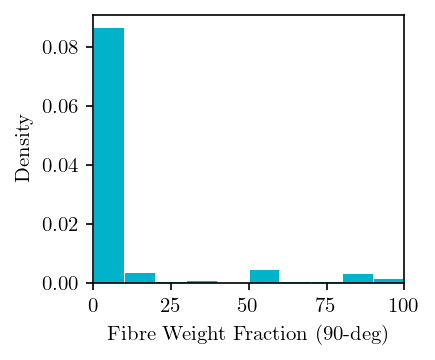

<AxesSubplot:xlabel='Fibre Weight Fraction (90-deg)', ylabel='Density'>

In [10]:
trainer.plot_hist(feature="Fibre Weight Fraction (90-deg)", figure_kwargs=dict(figsize=(3, 2.5), dpi=150))

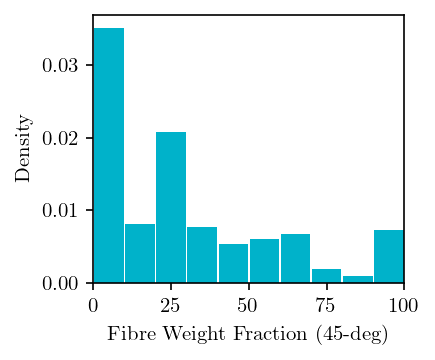

<AxesSubplot:xlabel='Fibre Weight Fraction (45-deg)', ylabel='Density'>

In [11]:
trainer.plot_hist(feature="Fibre Weight Fraction (45-deg)", figure_kwargs=dict(figsize=(3, 2.5), dpi=150))

### Mode

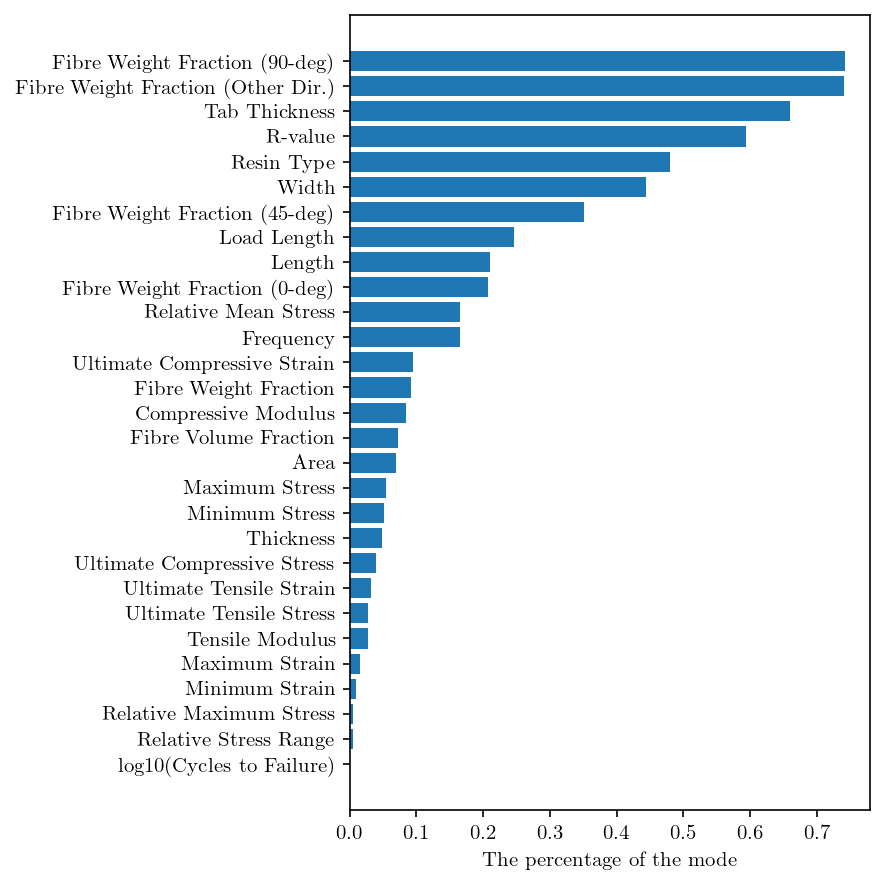

In [12]:
plt.figure(figsize=(6, 6), dpi=150)
ax = plt.subplot(111)
features = list(desc.columns)
values = desc.loc["Mode percentage", features].values
order = np.argsort(values)
ax.barh(y=np.array(features)[order], width=values[order])
ax.set_xlabel("The percentage of the mode")
plt.tight_layout()
plt.show()

### Kurtosis

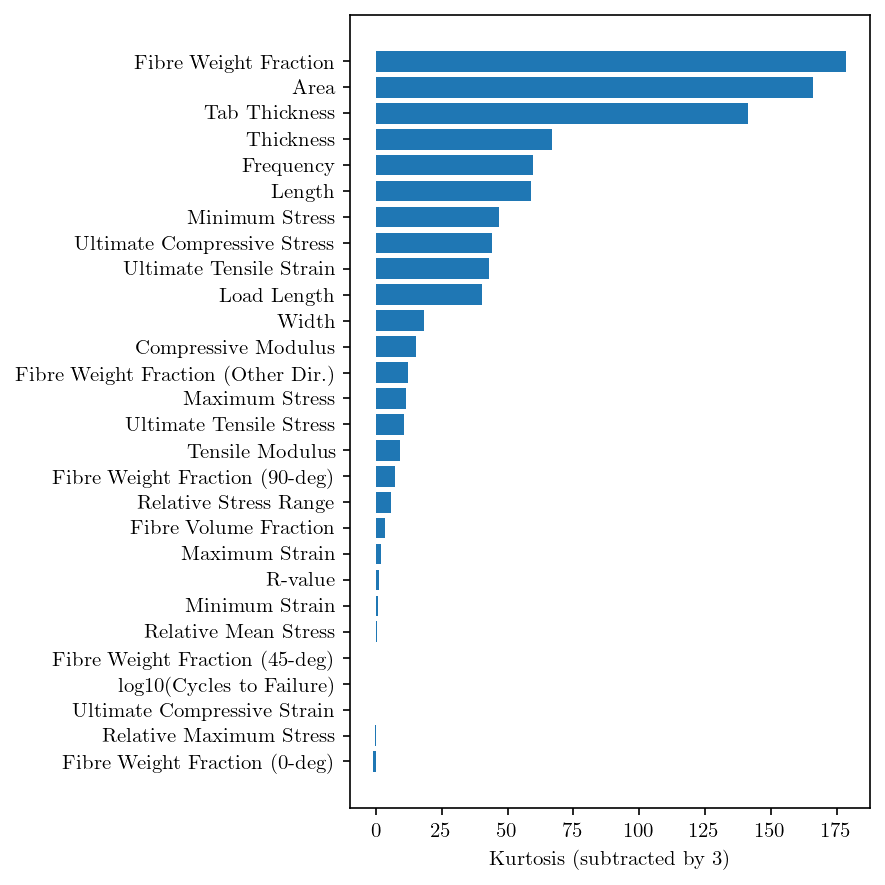

In [13]:
plt.figure(figsize=(6, 6), dpi=150)
ax = plt.subplot(111)
features = [x for x in desc.columns if x not in trainer.cat_feature_names]
values = desc.loc["Kurtosis", features].values
order = np.argsort(values)
ax.barh(y=np.array(features)[order], width=values[order])
ax.set_xlabel("Kurtosis (subtracted by 3)")
plt.tight_layout()
plt.show()

## Filling rate

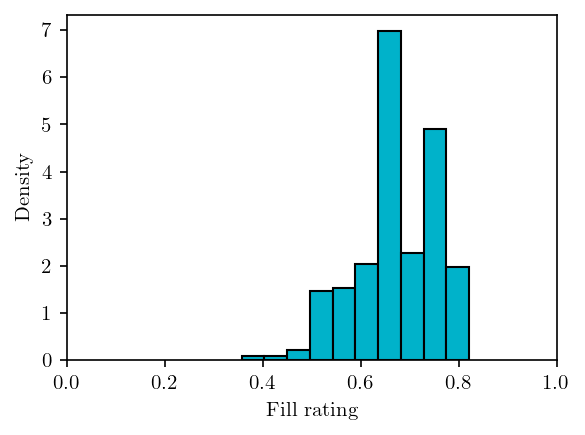

<AxesSubplot:xlabel='Fill rating', ylabel='Density'>

In [14]:
trainer.plot_fill_rating(figure_kwargs=dict(figsize=(4,3), dpi=150))

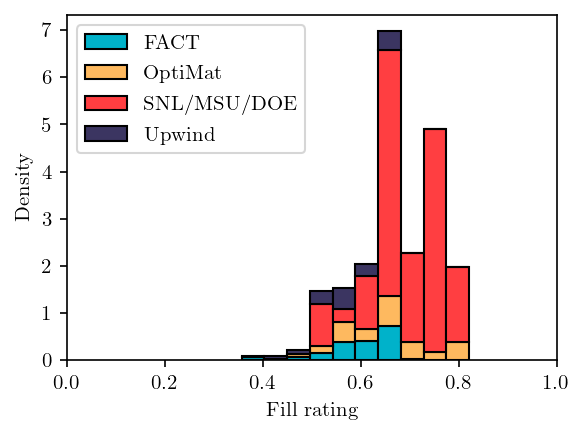

<AxesSubplot:xlabel='Fill rating', ylabel='Density'>

In [15]:
trainer.plot_fill_rating(figure_kwargs=dict(figsize=(4,3), dpi=150), category="Data source")

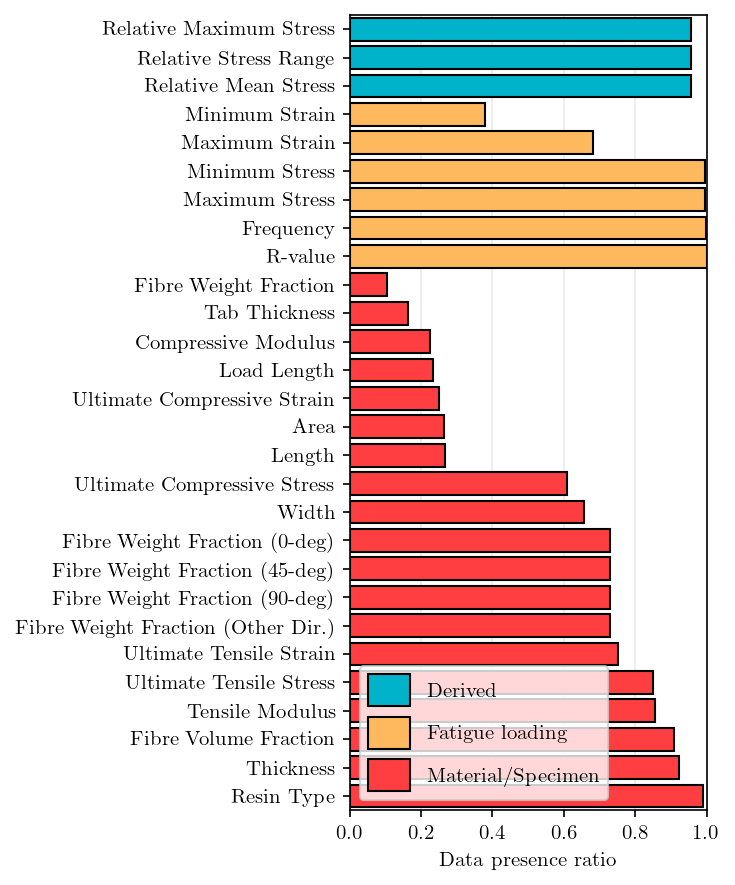

<AxesSubplot:xlabel='Data presence ratio'>

In [16]:
trainer.plot_presence_ratio(order="type", figure_kwargs=dict(figsize=(5,6), dpi=150), legend_kwargs=dict(loc="lower left"))

/home/xlluo/hdd/tabular_ensemble/tabensemb/trainer/trainer.py:4035: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(**savefig_kwargs_)
/home/xlluo/anaconda3/envs/mlfatigue/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


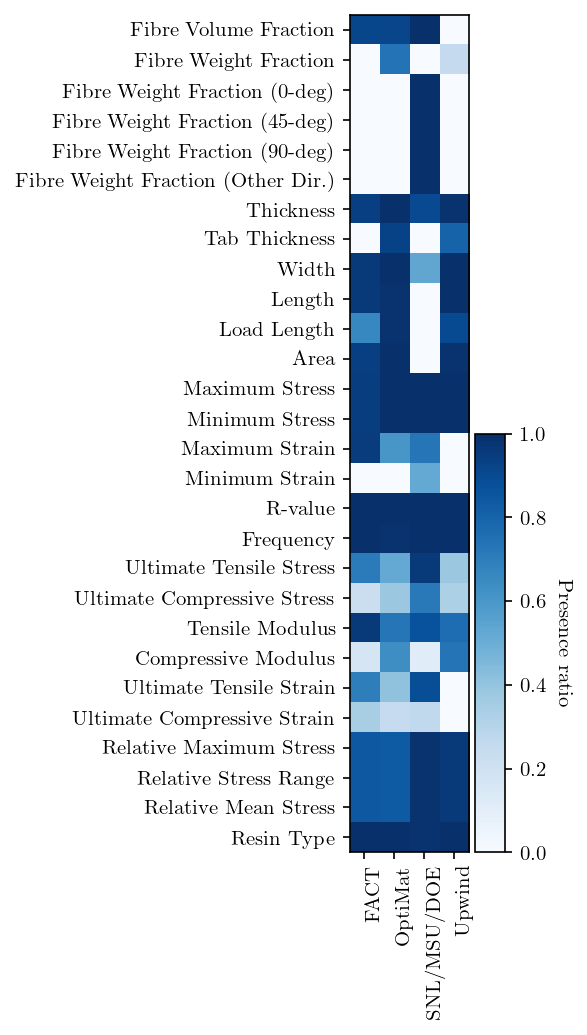

<AxesSubplot:>

In [17]:
trainer.plot_categorical_presence_ratio(category="Data source", figure_kwargs=dict(figsize=(4,7), dpi=150))

## PCA

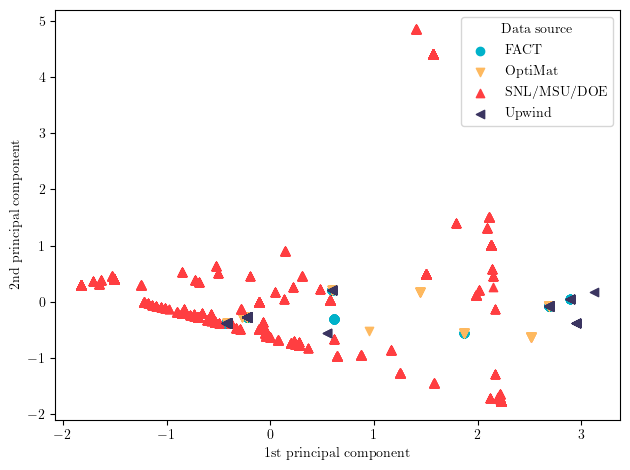

<AxesSubplot:xlabel='1st principal component', ylabel='2nd principal component'>

In [18]:
trainer.plot_pca_2d_visual(category="Data source", features=["Fibre Weight Fraction (0-deg)", "Fibre Weight Fraction (45-deg)", "Fibre Weight Fraction (90-deg)", "Fibre Weight Fraction (Other Dir.)"], select_by_value_kwargs=dict(partition="all"))

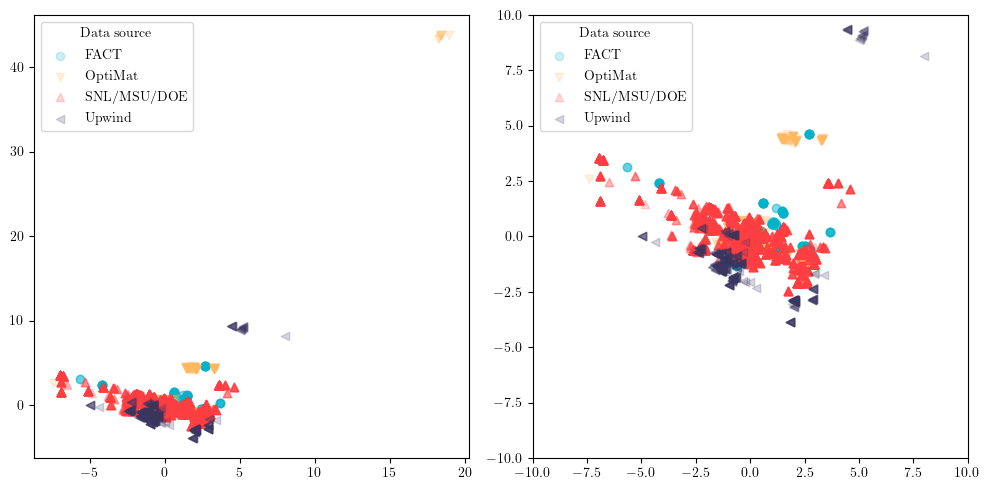

In [19]:
material_features = trainer.datamodule.get_feature_names_by_type("Material/Specimen")
material_features.remove("Resin Type")
plt.figure(figsize=(10,5))
ax1 = plt.subplot(121)
trainer.plot_pca_2d_visual(ax=ax1, category="Data source", features=material_features, scatter_kwargs={"alpha": 0.2, "edgecolor": None})

ax2 = plt.subplot(122)
trainer.plot_pca_2d_visual(ax=ax2, category="Data source", features=material_features, scatter_kwargs={"alpha": 0.2, "edgecolor": None})

ax2.set_xlim([-10, 10])
ax2.set_ylim([-10, 10])
plt.show()

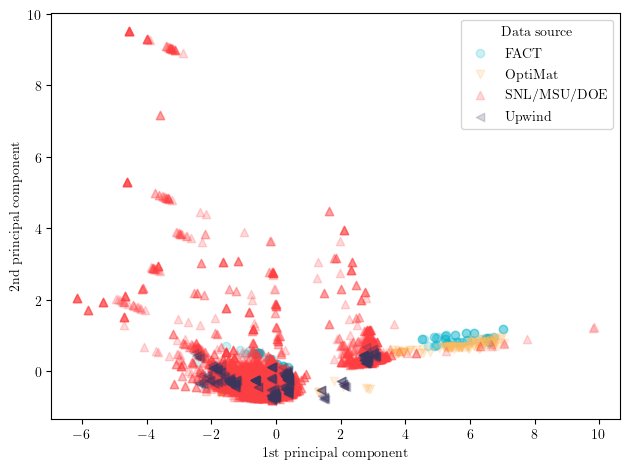

<AxesSubplot:xlabel='1st principal component', ylabel='2nd principal component'>

In [20]:
fatigue_features = trainer.datamodule.get_feature_names_by_type("Fatigue loading")
trainer.plot_pca_2d_visual(category="Data source", features=fatigue_features, scatter_kwargs={"alpha": 0.2, "edgecolor": None})

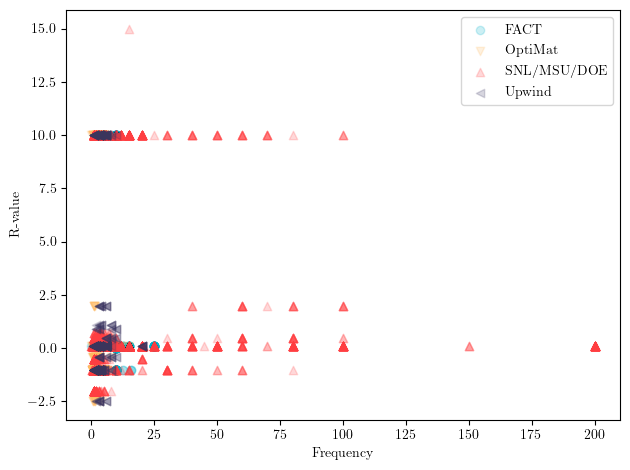

<AxesSubplot:xlabel='Frequency', ylabel='R-value'>

In [21]:
trainer.plot_scatter(category="Data source", x_col="Frequency", y_col="R-value", scatter_kwargs={"alpha": 0.2, "edgecolor": None})

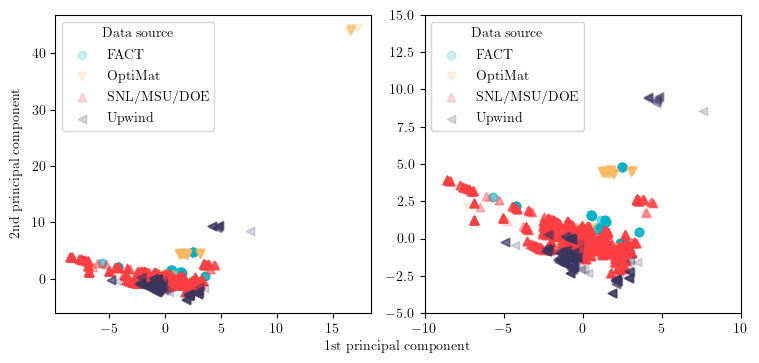

In [22]:
clustering_features = trainer.datamodule.get_feature_names_by_type("Material/Specimen") + ["Frequency", "R-value"]
clustering_features.remove("Resin Type")

fig = plt.figure(figsize=(8,4))
ax1 = plt.subplot(121)
trainer.plot_pca_2d_visual(ax=ax1, category="Data source", features=clustering_features, scatter_kwargs={"alpha": 0.2, "edgecolor": None})

ax2 = plt.subplot(122)
trainer.plot_pca_2d_visual(ax=ax2, category="Data source", features=clustering_features, scatter_kwargs={"alpha": 0.2, "edgecolor": None})

ax2.set_xlim([-10, 10])
ax2.set_ylim([-5, 15])

ax = fig.add_subplot(111, frameon=False)
ax.tick_params(
            labelcolor="none",
            which="both",
            top=False,
            bottom=False,
            left=False,
            right=False,
        )
ax.set_xlabel("1st principal component")
ax.set_ylabel("2nd principal component")
plt.show()

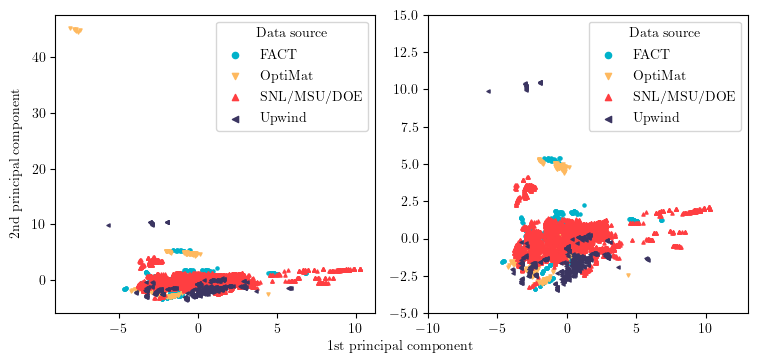

In [23]:
fig = plt.figure(figsize=(8,4))
ax1 = plt.subplot(121)
trainer.plot_pca_2d_visual(category="Data source", features=trainer.cont_feature_names, figure_kwargs=dict(figsize=(5,4), dpi=150), scatter_kwargs=dict(s=5), ax=ax1, legend_kwargs=dict(markerscale=2))

ax2 = plt.subplot(122)
trainer.plot_pca_2d_visual(category="Data source", features=trainer.cont_feature_names, figure_kwargs=dict(figsize=(5,4), dpi=150), scatter_kwargs=dict(s=5), ax=ax2, legend_kwargs=dict(markerscale=2))

ax2.set_xlim([-10, 13])
ax2.set_ylim([-5, 15])

ax = fig.add_subplot(111, frameon=False)
ax.tick_params(
            labelcolor="none",
            which="both",
            top=False,
            bottom=False,
            left=False,
            right=False,
        )
ax.set_xlabel("1st principal component")
ax.set_ylabel("2nd principal component")
plt.show()

## vs Cycle

### Modulus vs cycle

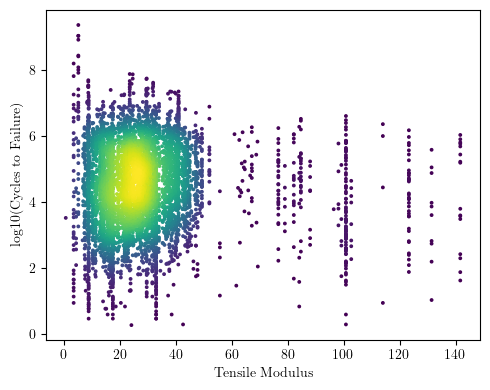

<AxesSubplot:xlabel='Tensile Modulus', ylabel='log10(Cycles to Failure)'>

In [24]:
trainer.plot_scatter(x_col="Tensile Modulus", y_col="log10(Cycles to Failure)", kde_color=True, scatter_kwargs=dict(s=3), figure_kwargs=dict(figsize=(5,4)))

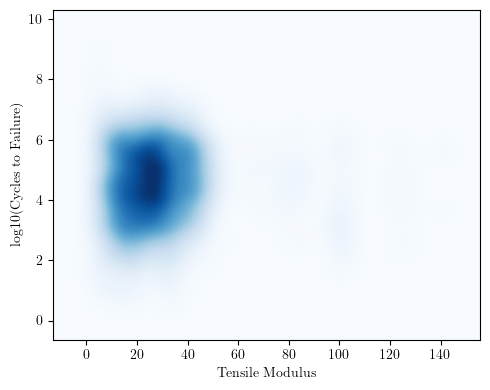

<AxesSubplot:xlabel='Tensile Modulus', ylabel='log10(Cycles to Failure)'>

In [25]:
trainer.plot_kde(x_col="Tensile Modulus", y_col="log10(Cycles to Failure)", kdeplot_kwargs=dict(fill=True, thresh=0, levels=100, cmap="Blues"), figure_kwargs=dict(figsize=(5,4)))

### Frequency vs cycle

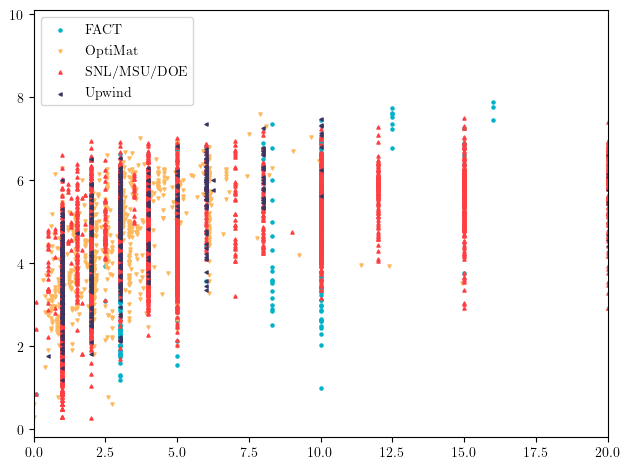

In [26]:
plt.figure()
ax = plt.subplot(111)
trainer.plot_scatter(x_col="Frequency", y_col="log10(Cycles to Failure)", category="Data source", scatter_kwargs=dict(s=5), ax=ax)
ax.set_xlim([0, 20])
plt.show()

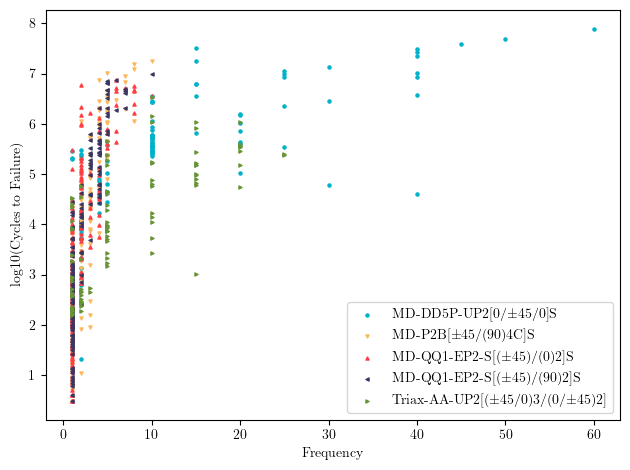

<AxesSubplot:xlabel='Frequency', ylabel='log10(Cycles to Failure)'>

In [27]:
mcodes = ["MD-P2B[±45/(90)4C]S", "MD-DD5P-UP2[0/±45/0]S", "MD-QQ1-EP2-S[(±45)/(90)2]S", "MD-QQ1-EP2-S[(±45)/(0)2]S", "Triax-AA-UP2[(±45/0)3/(0/±45)2]"]

trainer.plot_scatter(x_col="Frequency", y_col="log10(Cycles to Failure)", category="Material_Code", scatter_kwargs=dict(s=5), select_by_value_kwargs=dict(selection={"Material_Code": mcodes}))

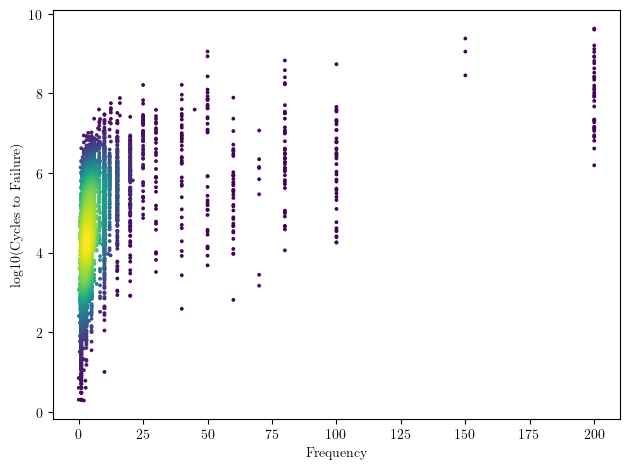

<AxesSubplot:xlabel='Frequency', ylabel='log10(Cycles to Failure)'>

In [28]:
trainer.plot_scatter(x_col="Frequency", y_col="log10(Cycles to Failure)", scatter_kwargs=dict(s=3), kde_color=True)

### Volume Fraction vs cycle

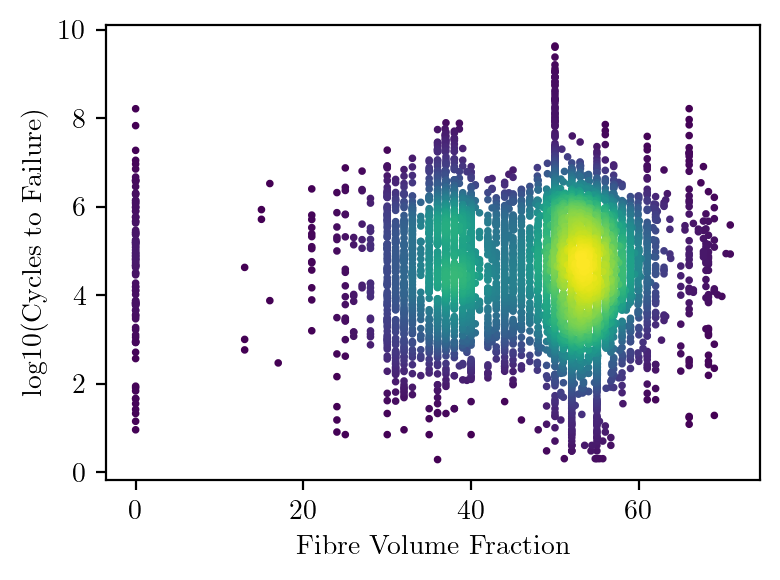

<AxesSubplot:xlabel='Fibre Volume Fraction', ylabel='log10(Cycles to Failure)'>

In [29]:
trainer.plot_scatter(x_col="Fibre Volume Fraction", y_col="log10(Cycles to Failure)", kde_color=True, scatter_kwargs=dict(s=3), figure_kwargs=dict(figsize=(4,3), dpi=200))

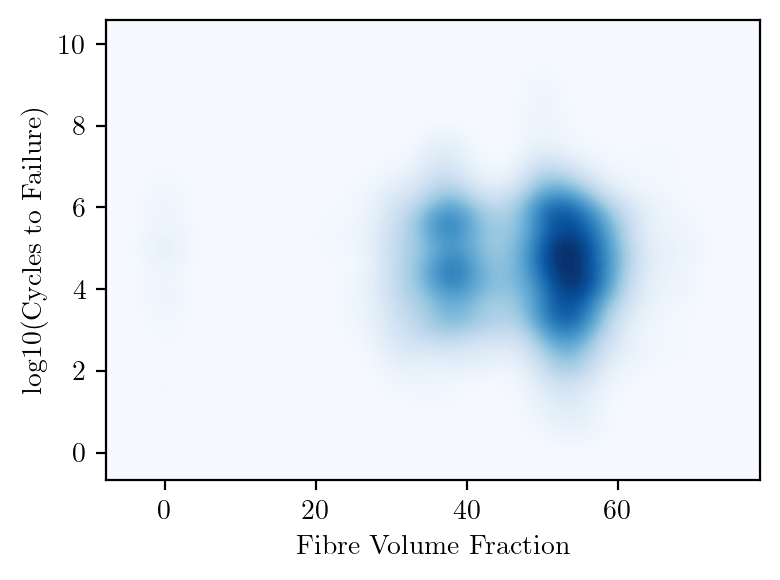

<AxesSubplot:xlabel='Fibre Volume Fraction', ylabel='log10(Cycles to Failure)'>

In [30]:
trainer.plot_kde(x_col="Fibre Volume Fraction", y_col="log10(Cycles to Failure)", kdeplot_kwargs=dict(fill=True, thresh=0, levels=100, cmap="Blues"), figure_kwargs=dict(figsize=(4,3), dpi=200))

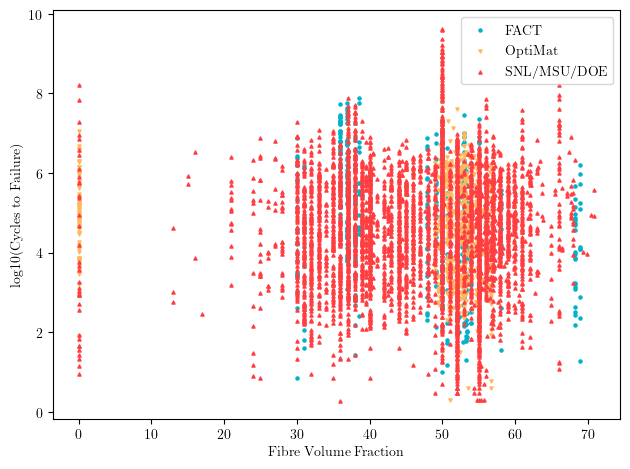

<AxesSubplot:xlabel='Fibre Volume Fraction', ylabel='log10(Cycles to Failure)'>

In [31]:
trainer.plot_scatter(x_col="Fibre Volume Fraction", y_col="log10(Cycles to Failure)", category="Data source", scatter_kwargs=dict(s=5))

### Stress vs cycle

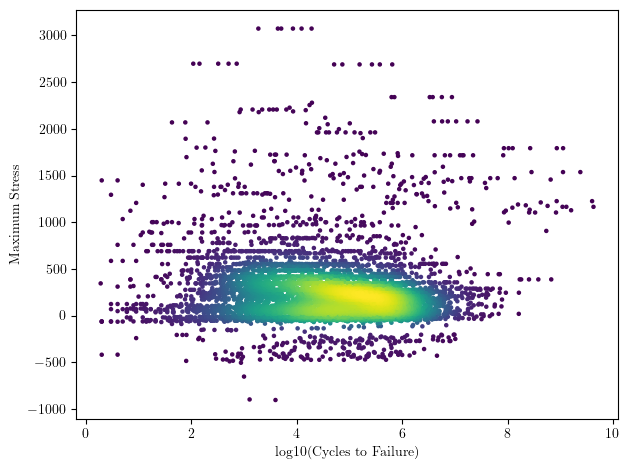

<AxesSubplot:xlabel='log10(Cycles to Failure)', ylabel='Maximum Stress'>

In [32]:
trainer.plot_scatter(x_col="log10(Cycles to Failure)", y_col="Maximum Stress", kde_color=True, scatter_kwargs=dict(s=5))

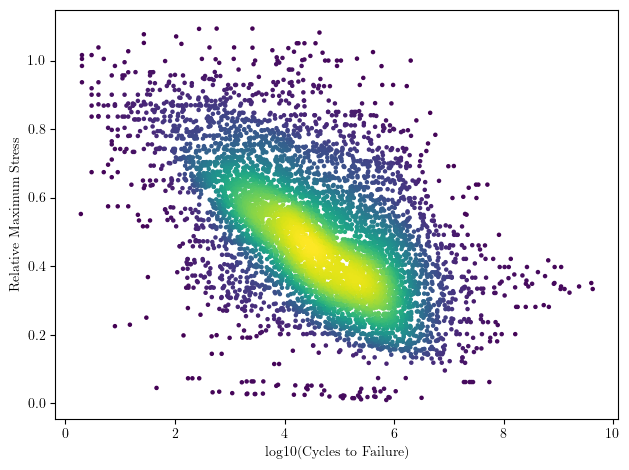

<AxesSubplot:xlabel='log10(Cycles to Failure)', ylabel='Relative Maximum Stress'>

In [33]:
trainer.plot_scatter(x_col="log10(Cycles to Failure)", y_col="Relative Maximum Stress", kde_color=True, scatter_kwargs=dict(s=5))

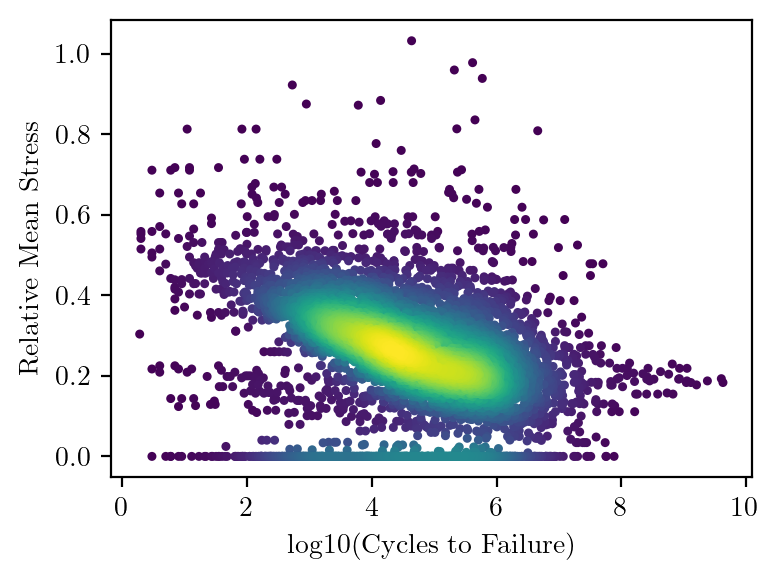

<AxesSubplot:xlabel='log10(Cycles to Failure)', ylabel='Relative Mean Stress'>

In [34]:
trainer.plot_scatter(x_col="log10(Cycles to Failure)", y_col="Relative Mean Stress", kde_color=True, scatter_kwargs=dict(s=5), figure_kwargs=dict(figsize=(4, 3), dpi=200))

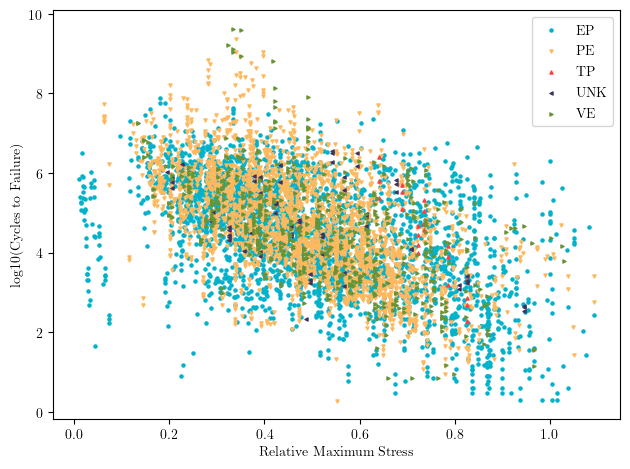

<AxesSubplot:xlabel='Relative Maximum Stress', ylabel='log10(Cycles to Failure)'>

In [35]:
trainer.plot_scatter(x_col="Relative Maximum Stress", y_col="log10(Cycles to Failure)", category="Resin Type", scatter_kwargs=dict(s=5))

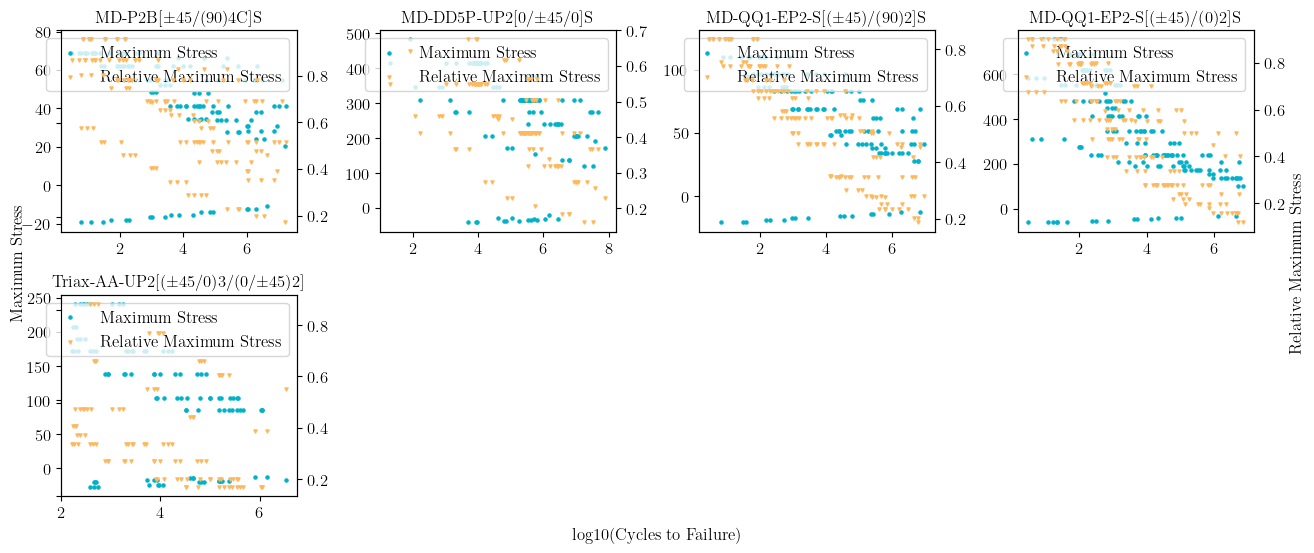

In [36]:
mcodes = ["MD-P2B[±45/(90)4C]S", "MD-DD5P-UP2[0/±45/0]S", "MD-QQ1-EP2-S[(±45)/(90)2]S", "MD-QQ1-EP2-S[(±45)/(0)2]S",
          "Triax-AA-UP2[(±45/0)3/(0/±45)2]"]
_ = trainer.plot_subplots(
    ls=[
        [
            dict(
                select_by_value_kwargs={"selection": {"Material_Code": mcode}},
                scatter_kwargs={
                    "color": global_palette[0],
                    "s": 5,
                    "marker": global_marker[0],
                    "label": mcode,
                },
                y_col="Maximum Stress",
            ),
            dict(
                select_by_value_kwargs={"selection": {"Material_Code": mcode}},
                scatter_kwargs={
                    "color": global_palette[1],
                    "s": 5,
                    "marker": global_marker[1],
                    "label": mcode,
                },
                y_col="Relative Maximum Stress",
            ),
        ]
        for mcode in mcodes
    ],
    ls_kwarg_name="meth_kwargs_ls",
    meth_name="plot_on_one_axes",
    with_title=True,
    titles=mcodes,
    meth_fix_kwargs=dict(
        meth_name="plot_scatter",
        meth_fix_kwargs=dict(
            x_col="log10(Cycles to Failure)",
            imputed=False,
        ),
        save_show_close=True,
        # ylabel="Maximum Stress",
        # twin_ylabel="Relative Maximum Stress",
        twin=True,
        legend=True,
        legend_kwargs={
            "labels": ["Maximum Stress", "Relative Maximum Stress"],
            "loc": "upper right",
        },
    ),
    xlabel="log10(Cycles to Failure)",
    ylabel="Maximum Stress",
    twin_ylabel="Relative Maximum Stress"
)

### R-value vs cycle

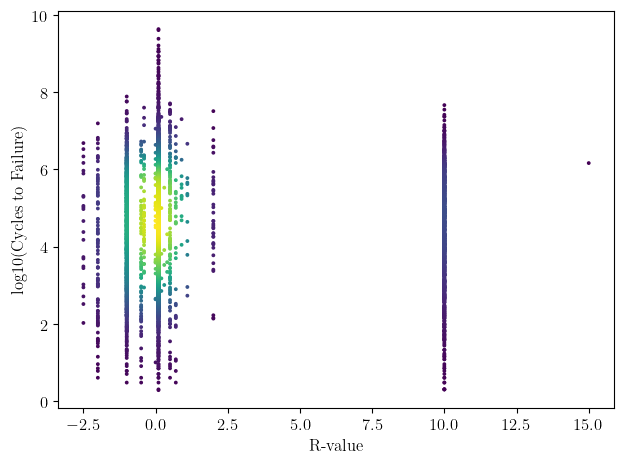

<AxesSubplot:xlabel='R-value', ylabel='log10(Cycles to Failure)'>

In [37]:
trainer.plot_scatter(x_col="R-value", y_col="log10(Cycles to Failure)", kde_color=True, scatter_kwargs=dict(s=3))

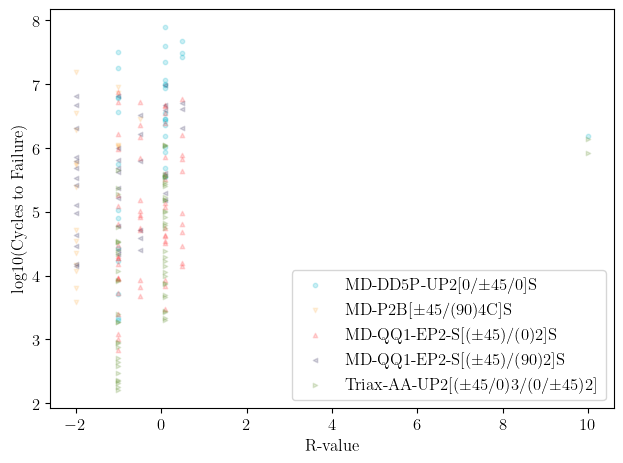

<AxesSubplot:xlabel='R-value', ylabel='log10(Cycles to Failure)'>

In [38]:
mcodes = ["MD-P2B[±45/(90)4C]S", "MD-DD5P-UP2[0/±45/0]S", "MD-QQ1-EP2-S[(±45)/(90)2]S", "MD-QQ1-EP2-S[(±45)/(0)2]S", "Triax-AA-UP2[(±45/0)3/(0/±45)2]"]

trainer.plot_scatter(x_col="R-value", y_col="log10(Cycles to Failure)", category="Material_Code", scatter_kwargs=dict(s=10, alpha=0.2), select_by_value_kwargs=dict(selection={"Material_Code": mcodes, "Relative Maximum Stress": (0.0, 0.4)}))

## Volume Fraction vs others

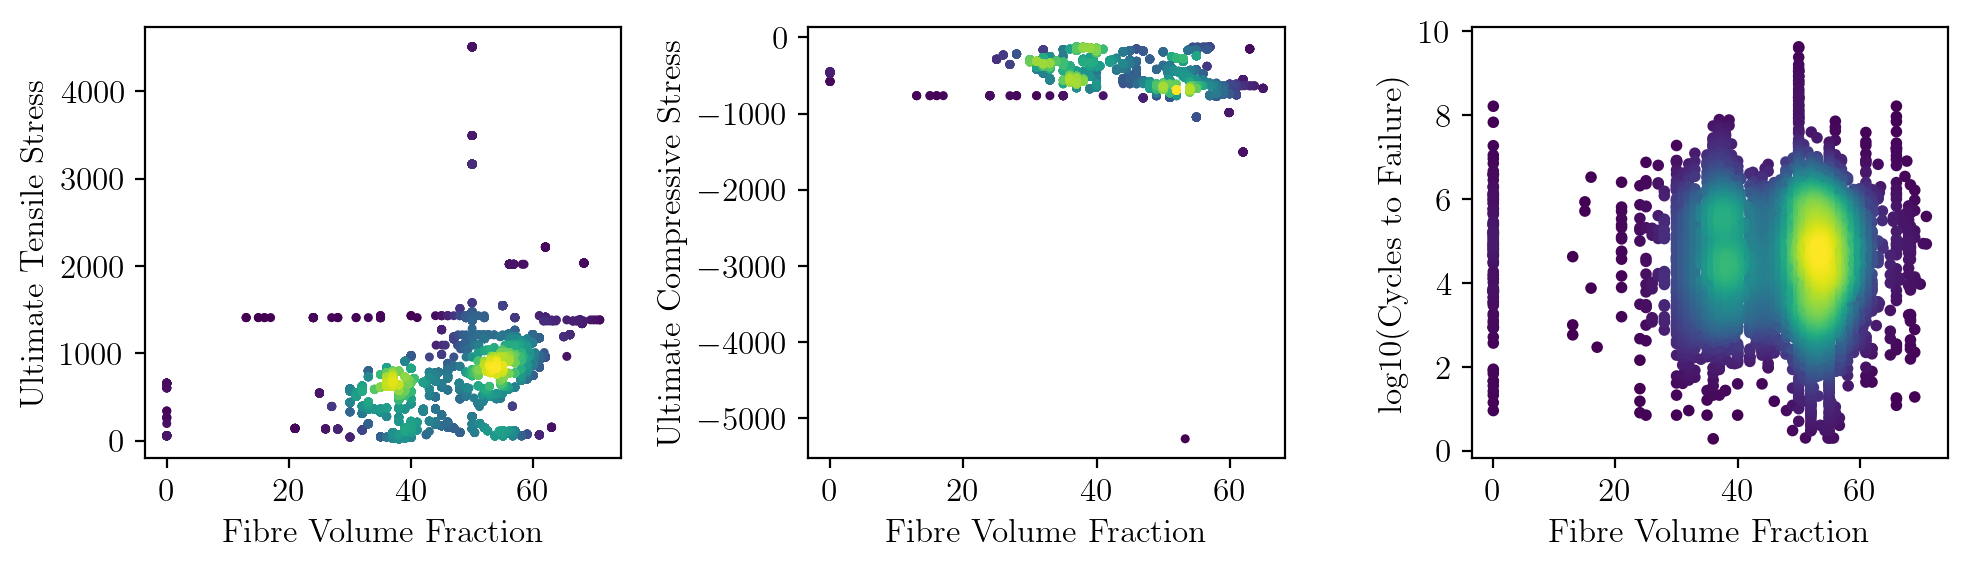

In [39]:
resin_types = list(trainer.datamodule.cat_feature_mapping["Resin Type"])

plt.figure(figsize=(10,3), dpi=200)
ax1 = plt.subplot(131)
trainer.plot_scatter(x_col="Fibre Volume Fraction", y_col="Ultimate Tensile Stress", kde_color=True, scatter_kwargs=dict(s=5), ax=ax1)
ax1.set_xlabel("Fibre Volume Fraction")
ax1.set_ylabel("Ultimate Tensile Stress")

ax2 = plt.subplot(132)
trainer.plot_scatter(x_col="Fibre Volume Fraction", y_col="Ultimate Compressive Stress", kde_color=True, scatter_kwargs=dict(s=5), ax=ax2)
ax2.set_xlabel("Fibre Volume Fraction")
ax2.set_ylabel("Ultimate Compressive Stress")

ax3 = plt.subplot(133)
trainer.plot_scatter(x_col="Fibre Volume Fraction", y_col="log10(Cycles to Failure)", kde_color=True, scatter_kwargs=dict(s=10), ax=ax3)
ax3.set_xlabel("Fibre Volume Fraction")
ax3.set_ylabel("log10(Cycles to Failure)")
plt.show()

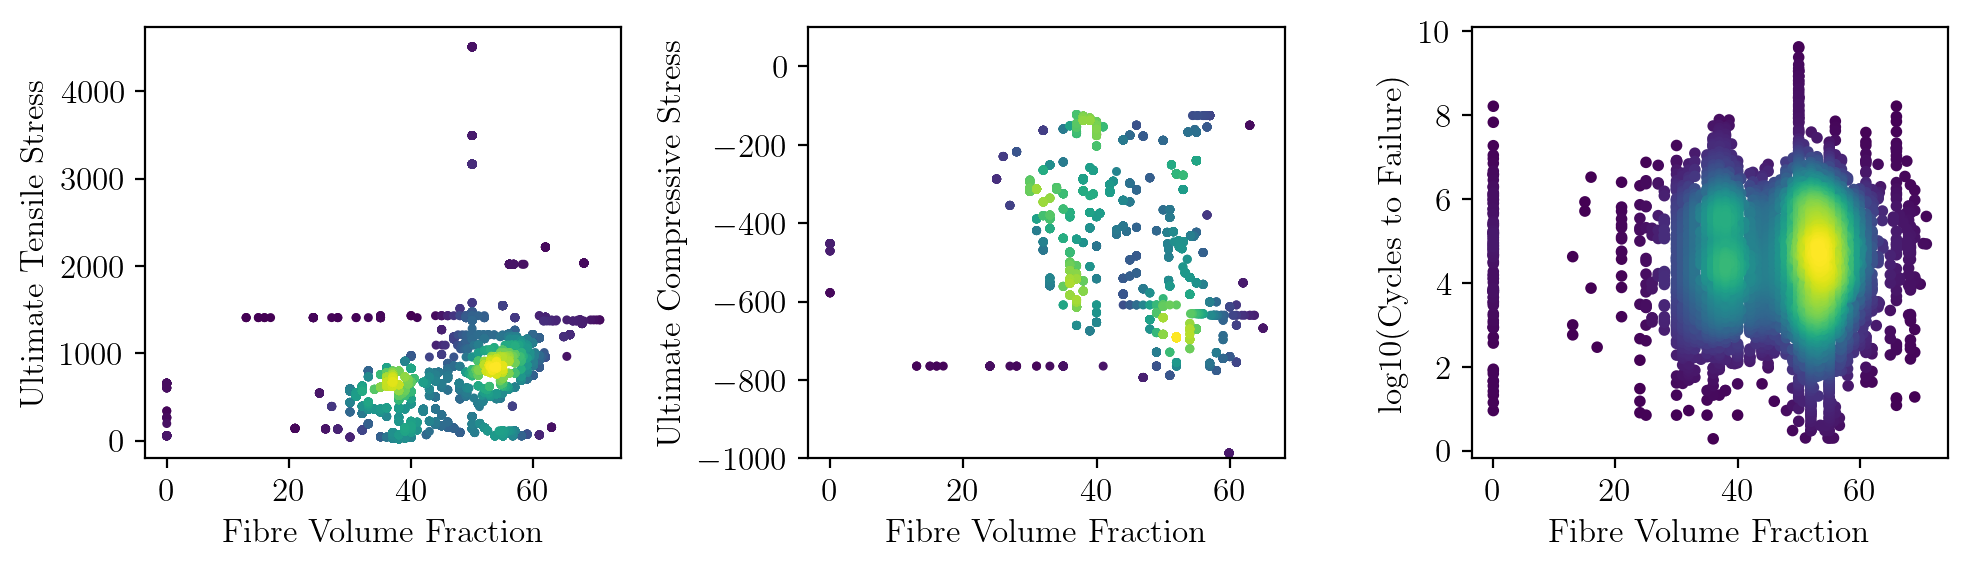

In [40]:
plt.figure(figsize=(10,3), dpi=200)
ax1 = plt.subplot(131)
trainer.plot_scatter(x_col="Fibre Volume Fraction", y_col="Ultimate Tensile Stress", kde_color=True, scatter_kwargs=dict(s=5), ax=ax1)
ax1.set_xlabel("Fibre Volume Fraction")
ax1.set_ylabel("Ultimate Tensile Stress")

ax2 = plt.subplot(132)
trainer.plot_scatter(x_col="Fibre Volume Fraction", y_col="Ultimate Compressive Stress", kde_color=True, scatter_kwargs=dict(s=5), ax=ax2)
ax2.set_xlabel("Fibre Volume Fraction")
ax2.set_ylabel("Ultimate Compressive Stress")
ax2.set_ylim([-1000, 100])

ax3 = plt.subplot(133)
trainer.plot_scatter(x_col="Fibre Volume Fraction", y_col="log10(Cycles to Failure)", kde_color=True, scatter_kwargs=dict(s=10), ax=ax3)
ax3.set_xlabel("Fibre Volume Fraction")
ax3.set_ylabel("log10(Cycles to Failure)")
plt.show()

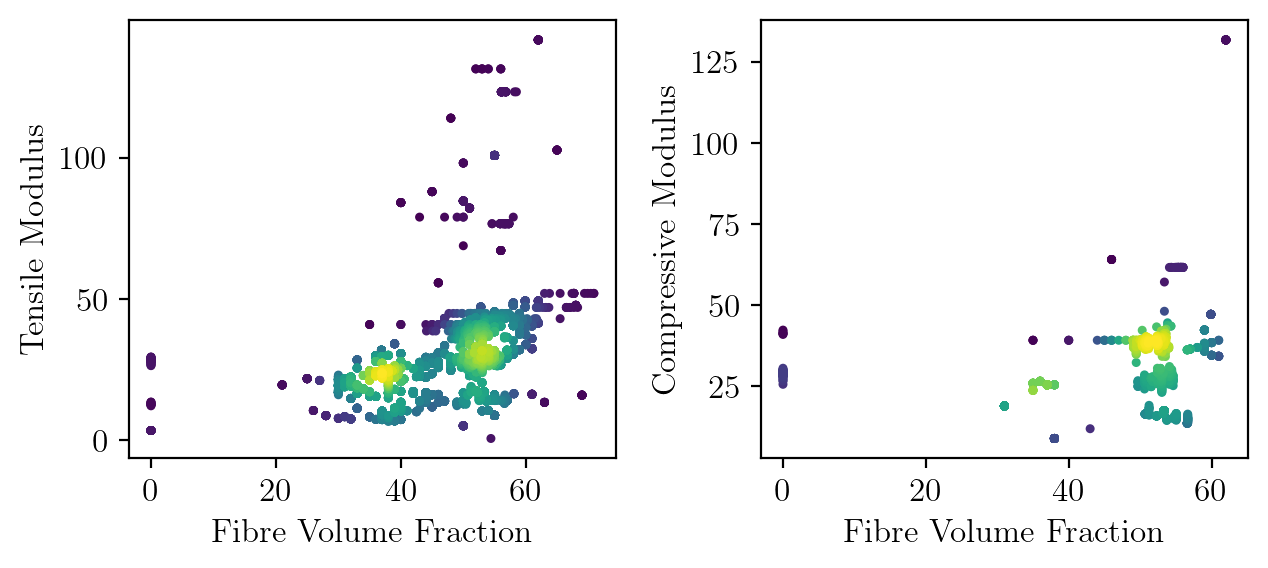

In [41]:
plt.figure(figsize=(6.5,3), dpi=200)
ax1 = plt.subplot(121)
trainer.plot_scatter(x_col="Fibre Volume Fraction", y_col="Tensile Modulus", kde_color=True, scatter_kwargs=dict(s=5), ax=ax1)
ax1.set_xlabel("Fibre Volume Fraction")
ax1.set_ylabel("Tensile Modulus")

ax2 = plt.subplot(122)
trainer.plot_scatter(x_col="Fibre Volume Fraction", y_col="Compressive Modulus", kde_color=True, scatter_kwargs=dict(s=5), ax=ax2)
ax2.set_xlabel("Fibre Volume Fraction")
ax2.set_ylabel("Compressive Modulus")

plt.show()

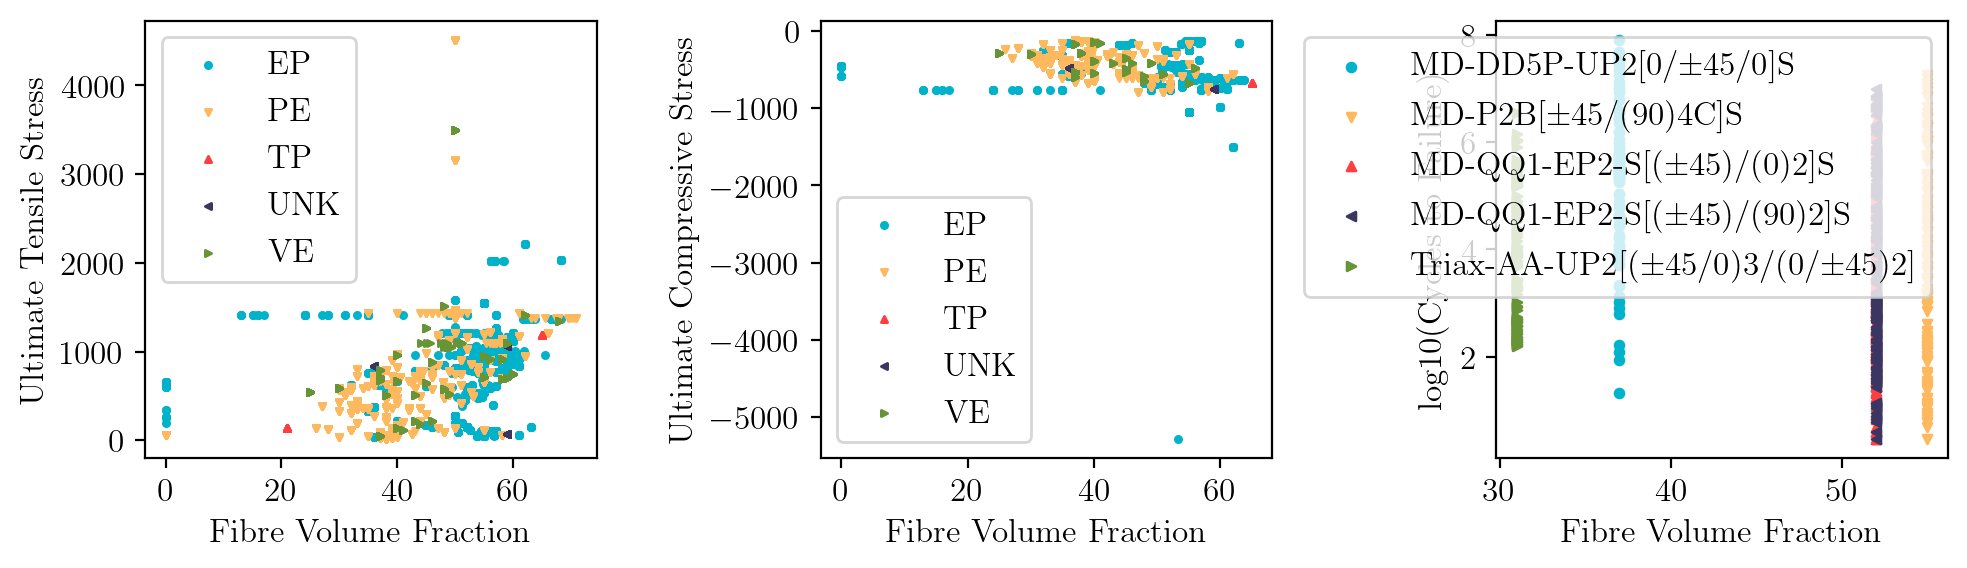

In [42]:
plt.figure(figsize=(10,3), dpi=200)
ax1 = plt.subplot(131)
trainer.plot_scatter(x_col="Fibre Volume Fraction", y_col="Ultimate Tensile Stress", category="Resin Type", scatter_kwargs=dict(s=5), ax=ax1)
ax1.set_xlabel("Fibre Volume Fraction")
ax1.set_ylabel("Ultimate Tensile Stress")

ax2 = plt.subplot(132)
trainer.plot_scatter(x_col="Fibre Volume Fraction", y_col="Ultimate Compressive Stress", category="Resin Type", scatter_kwargs=dict(s=5), ax=ax2)
ax2.set_xlabel("Fibre Volume Fraction")
ax2.set_ylabel("Ultimate Compressive Stress")

mcodes = ["MD-P2B[±45/(90)4C]S", "MD-DD5P-UP2[0/±45/0]S", "MD-QQ1-EP2-S[(±45)/(90)2]S", "MD-QQ1-EP2-S[(±45)/(0)2]S", "Triax-AA-UP2[(±45/0)3/(0/±45)2]"]

ax3 = plt.subplot(133)
trainer.plot_scatter(x_col="Fibre Volume Fraction", y_col="log10(Cycles to Failure)", category="Material_Code", scatter_kwargs=dict(s=10), select_by_value_kwargs=dict(selection={"Material_Code": mcodes}), ax=ax3)
ax3.set_xlabel("Fibre Volume Fraction")
ax3.set_ylabel("log10(Cycles to Failure)")
plt.show()

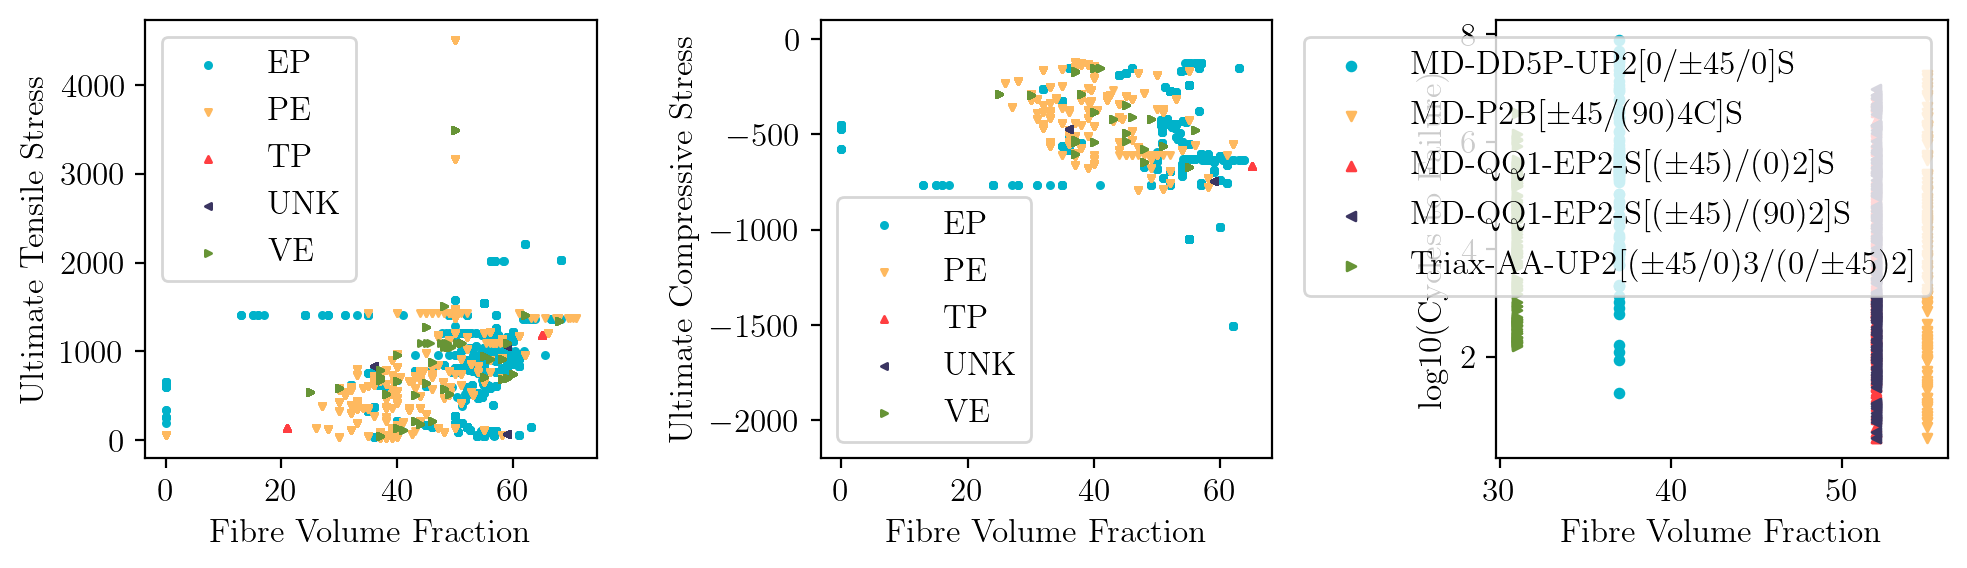

In [43]:
plt.figure(figsize=(10,3), dpi=200)
ax1 = plt.subplot(131)
trainer.plot_scatter(x_col="Fibre Volume Fraction", y_col="Ultimate Tensile Stress", category="Resin Type", scatter_kwargs=dict(s=5), ax=ax1)
ax1.set_xlabel("Fibre Volume Fraction")
ax1.set_ylabel("Ultimate Tensile Stress")

ax2 = plt.subplot(132)
trainer.plot_scatter(x_col="Fibre Volume Fraction", y_col="Ultimate Compressive Stress", category="Resin Type", scatter_kwargs=dict(s=5), ax=ax2)
ax2.set_xlabel("Fibre Volume Fraction")
ax2.set_ylabel("Ultimate Compressive Stress")
ax2.set_ylim([-2200, 100])

mcodes = ["MD-P2B[±45/(90)4C]S", "MD-DD5P-UP2[0/±45/0]S", "MD-QQ1-EP2-S[(±45)/(90)2]S", "MD-QQ1-EP2-S[(±45)/(0)2]S", "Triax-AA-UP2[(±45/0)3/(0/±45)2]"]

ax3 = plt.subplot(133)
trainer.plot_scatter(x_col="Fibre Volume Fraction", y_col="log10(Cycles to Failure)", category="Material_Code", scatter_kwargs=dict(s=10), select_by_value_kwargs=dict(selection={"Material_Code": mcodes}), ax=ax3)
ax3.set_xlabel("Fibre Volume Fraction")
ax3.set_ylabel("log10(Cycles to Failure)")
plt.show()

## KDE of cycle

### KDE of cycle split by frequency

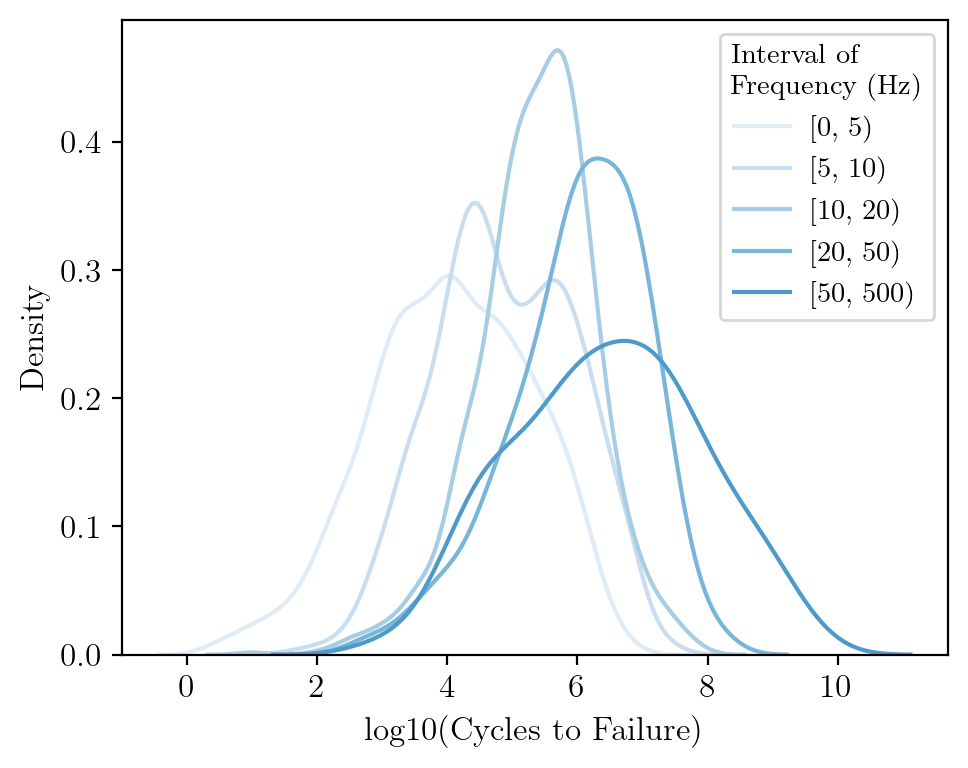

<AxesSubplot:xlabel='log10(Cycles to Failure)', ylabel='Density'>

In [44]:
intervals = [(0, 5), (5, 10), (10, 20), (20, 50), (50, 500)]
cmap = plt.get_cmap("Blues")

trainer.plot_on_one_axes(meth_name="plot_kde", meth_kwargs_ls=[dict(select_by_value_kwargs={"selection": {"Frequency": intv}}, clr=[cmap(idx*30+30)], kdeplot_kwargs={"label": f"[{intv[0]}, {intv[1]})"}) for idx, intv in enumerate(intervals) ], meth_fix_kwargs=dict(x_col="log10(Cycles to Failure)"), legend=True, legend_kwargs=dict(title="Interval of\nFrequency (Hz)", fontsize="small", title_fontsize="small"), xlabel="log10(Cycles to Failure)", ylabel="Density", figure_kwargs=dict(figsize=(5,4), dpi=200))

### KDE of cycle split by Fibre Volume Fraction

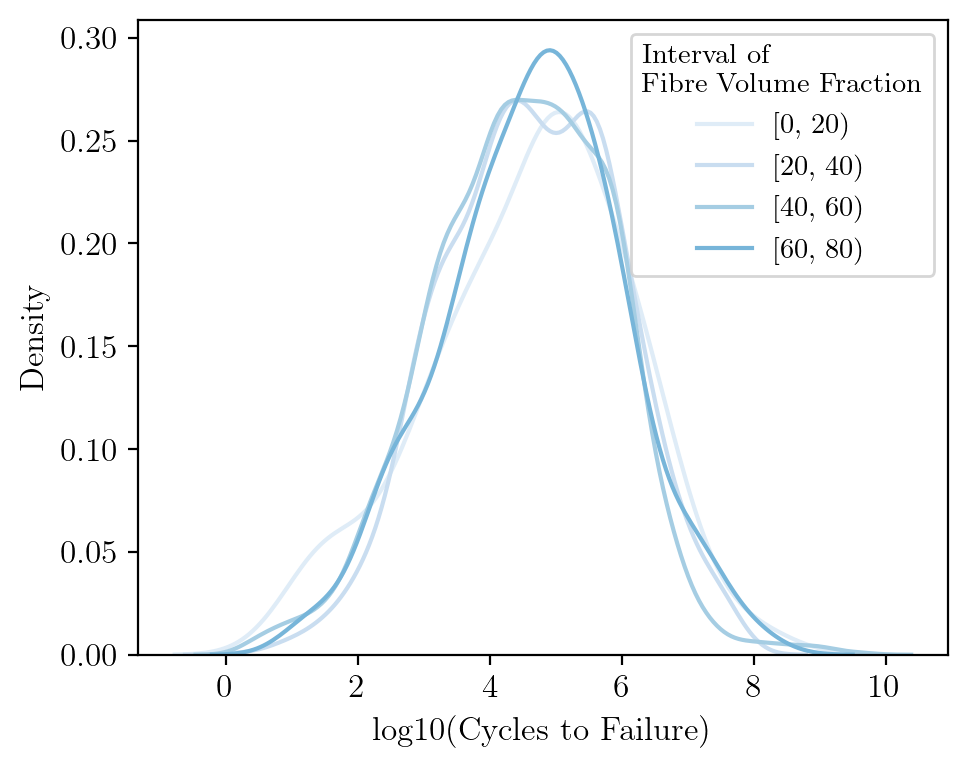

<AxesSubplot:xlabel='log10(Cycles to Failure)', ylabel='Density'>

In [45]:
intervals = [(0, 20), (20, 40), (40, 60), (60, 80)]
cmap = plt.get_cmap("Blues")

trainer.plot_on_one_axes(meth_name="plot_kde", meth_kwargs_ls=[dict(select_by_value_kwargs={"selection": {"Fibre Volume Fraction": intv}}, clr=[cmap(idx*30+30)], kdeplot_kwargs={"label": f"[{intv[0]}, {intv[1]})"}) for idx, intv in enumerate(intervals) ], meth_fix_kwargs=dict(x_col="log10(Cycles to Failure)"), legend=True, legend_kwargs=dict(title="Interval of\nFibre Volume Fraction", fontsize="small", title_fontsize="small"), xlabel="log10(Cycles to Failure)", ylabel="Density", figure_kwargs=dict(figsize=(5,4), dpi=200))

### KDE of cycle split by R-value

/home/xlluo/anaconda3/envs/mlfatigue/lib/python3.8/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


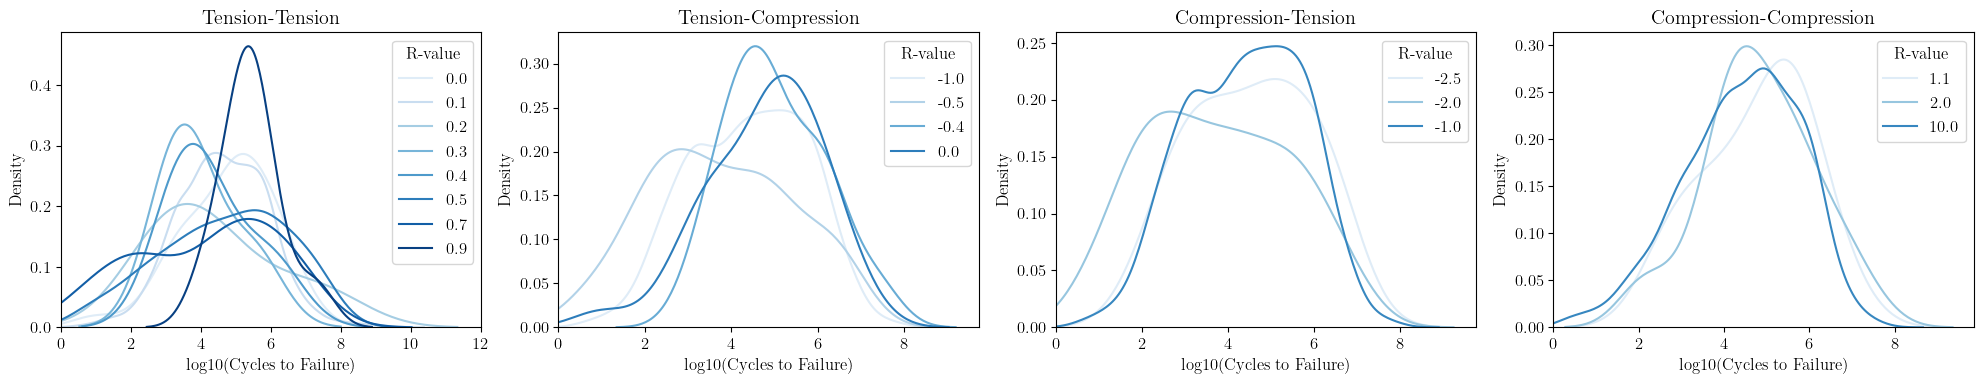

In [46]:
cmap = plt.get_cmap("Blues")
rvalues = sorted(set(trainer.datamodule.get_not_imputed_df()["R-value"]))
plt.figure(figsize=(20, 4))

ax = plt.subplot(141)
tt = [x for x in rvalues if 0<=x<1]
trainer.plot_on_one_axes(meth_name="plot_kde", meth_kwargs_ls=[dict(select_by_value_kwargs={"selection": {"R-value": x}}, clr=[cmap(idx*30+30)], kdeplot_kwargs={"label": round(x, 1)}) for idx, x in enumerate(tt) ], meth_fix_kwargs=dict(x_col="log10(Cycles to Failure)"), legend=True, legend_kwargs=dict(title="R-value"), xlabel="log10(Cycles to Failure)", ylabel="Density", ax=ax)
ax.set_title("Tension-Tension")
ax.set_xlim(left=max([ax.get_xlim()[0], 0]))

ax = plt.subplot(142)
tc = [x for x in rvalues if -1<=x<=0]
trainer.plot_on_one_axes(meth_name="plot_kde", meth_kwargs_ls=[dict(select_by_value_kwargs={"selection": {"R-value": x}}, clr=[cmap(idx*50+30)], kdeplot_kwargs={"label": round(x, 1)}) for idx, x in enumerate(tc)], meth_fix_kwargs=dict(x_col="log10(Cycles to Failure)"), legend=True, legend_kwargs=dict(title="R-value"), xlabel="log10(Cycles to Failure)", ylabel="Density", ax=ax)
ax.set_title("Tension-Compression")
ax.set_xlim(left=max([ax.get_xlim()[0], 0]))

ax = plt.subplot(143)
ct = [x for x in rvalues if x<=-1]
trainer.plot_on_one_axes(meth_name="plot_kde", meth_kwargs_ls=[dict(select_by_value_kwargs={"selection": {"R-value": x}}, clr=[cmap(idx*70+30)], kdeplot_kwargs={"label": round(x, 1)}) for idx, x in enumerate(ct)], meth_fix_kwargs=dict(x_col="log10(Cycles to Failure)"), legend=True, legend_kwargs=dict(title="R-value"), xlabel="log10(Cycles to Failure)", ylabel="Density", ax=ax)
ax.set_title("Compression-Tension")
ax.set_xlim(left=max([ax.get_xlim()[0], 0]))

ax = plt.subplot(144)
cc = [x for x in rvalues if x>1]
trainer.plot_on_one_axes(meth_name="plot_kde", meth_kwargs_ls=[dict(select_by_value_kwargs={"selection": {"R-value": x}}, clr=[cmap(idx*70+30)], kdeplot_kwargs={"label": round(x, 2)}) for idx, x in enumerate(cc)], meth_fix_kwargs=dict(x_col="log10(Cycles to Failure)"), legend=True, legend_kwargs=dict(title="R-value"), xlabel="log10(Cycles to Failure)", ylabel="Density", ax=ax)
ax.set_title("Compression-Compression")
ax.set_xlim(left=max([ax.get_xlim()[0], 0]))

plt.show()

### KDE of cycle split by R-value (Low cycle fatigue)

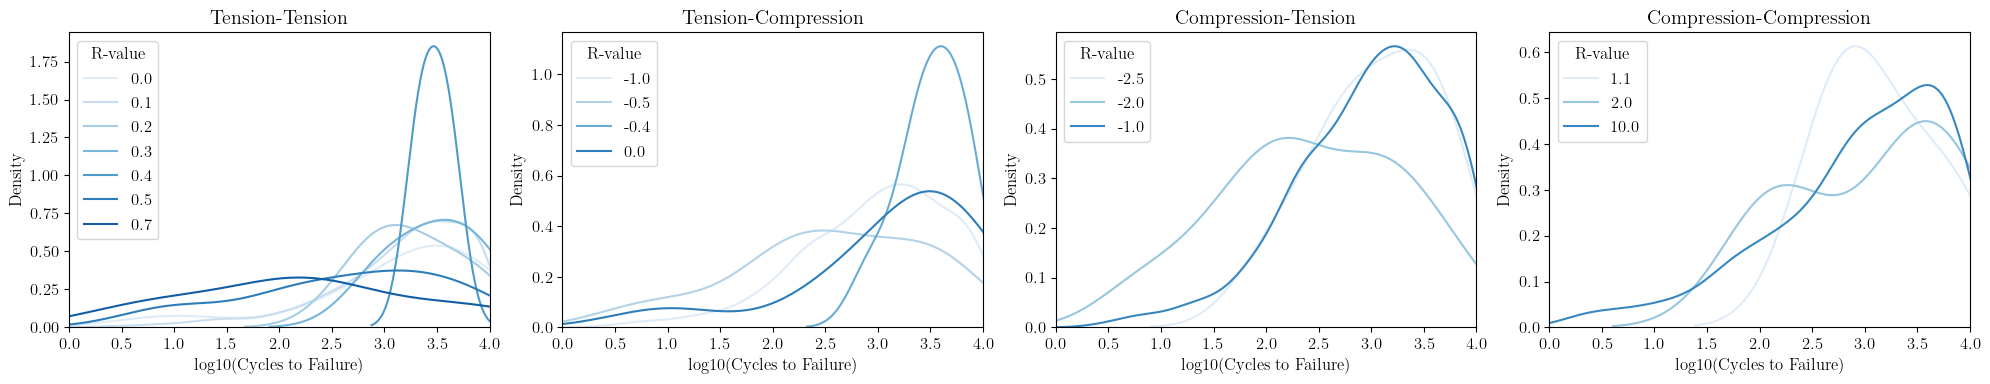

In [47]:
cmap = plt.get_cmap("Blues")
rvalues = sorted(set(trainer.datamodule.get_not_imputed_df()["R-value"]))
plt.figure(figsize=(20, 4))

ax = plt.subplot(141)
tt = [x for x in rvalues if 0<=x<1]
trainer.plot_on_one_axes(meth_name="plot_kde", meth_kwargs_ls=[dict(select_by_value_kwargs={"selection": {"R-value": x, "log10(Cycles to Failure)": (0, 4)}}, clr=[cmap(idx*30+30)], kdeplot_kwargs={"label": round(x, 1)}) for idx, x in enumerate(tt) ], meth_fix_kwargs=dict(x_col="log10(Cycles to Failure)"), legend=True, legend_kwargs=dict(title="R-value"), xlabel="log10(Cycles to Failure)", ylabel="Density", ax=ax)
ax.set_title("Tension-Tension")
ax.set_xlim(left=max([ax.get_xlim()[0], 0]), right=min([ax.get_xlim()[1], 4]))

ax = plt.subplot(142)
tc = [x for x in rvalues if -1<=x<=0]
trainer.plot_on_one_axes(meth_name="plot_kde", meth_kwargs_ls=[dict(select_by_value_kwargs={"selection": {"R-value": x, "log10(Cycles to Failure)": (0, 4)}}, clr=[cmap(idx*50+30)], kdeplot_kwargs={"label": round(x, 1)}) for idx, x in enumerate(tc)], meth_fix_kwargs=dict(x_col="log10(Cycles to Failure)"), legend=True, legend_kwargs=dict(title="R-value"), xlabel="log10(Cycles to Failure)", ylabel="Density", ax=ax)
ax.set_title("Tension-Compression")
ax.set_xlim(left=max([ax.get_xlim()[0], 0]), right=min([ax.get_xlim()[1], 4]))

ax = plt.subplot(143)
ct = [x for x in rvalues if x<=-1]
trainer.plot_on_one_axes(meth_name="plot_kde", meth_kwargs_ls=[dict(select_by_value_kwargs={"selection": {"R-value": x, "log10(Cycles to Failure)": (0, 4)}}, clr=[cmap(idx*70+30)], kdeplot_kwargs={"label": round(x, 1)}) for idx, x in enumerate(ct)], meth_fix_kwargs=dict(x_col="log10(Cycles to Failure)"), legend=True, legend_kwargs=dict(title="R-value"), xlabel="log10(Cycles to Failure)", ylabel="Density", ax=ax)
ax.set_title("Compression-Tension")
ax.set_xlim(left=max([ax.get_xlim()[0], 0]), right=min([ax.get_xlim()[1], 4]))

ax = plt.subplot(144)
cc = [x for x in rvalues if x>1]
trainer.plot_on_one_axes(meth_name="plot_kde", meth_kwargs_ls=[dict(select_by_value_kwargs={"selection": {"R-value": x, "log10(Cycles to Failure)": (0, 4)}}, clr=[cmap(idx*70+30)], kdeplot_kwargs={"label": round(x, 2)}) for idx, x in enumerate(cc)], meth_fix_kwargs=dict(x_col="log10(Cycles to Failure)"), legend=True, legend_kwargs=dict(title="R-value"), xlabel="log10(Cycles to Failure)", ylabel="Density", ax=ax)
ax.set_title("Compression-Compression")
ax.set_xlim(left=max([ax.get_xlim()[0], 0]), right=min([ax.get_xlim()[1], 4]))

plt.show()

### KDE of cycle split by R-value (High cycle fatigue)

/home/xlluo/anaconda3/envs/mlfatigue/lib/python3.8/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/home/xlluo/anaconda3/envs/mlfatigue/lib/python3.8/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


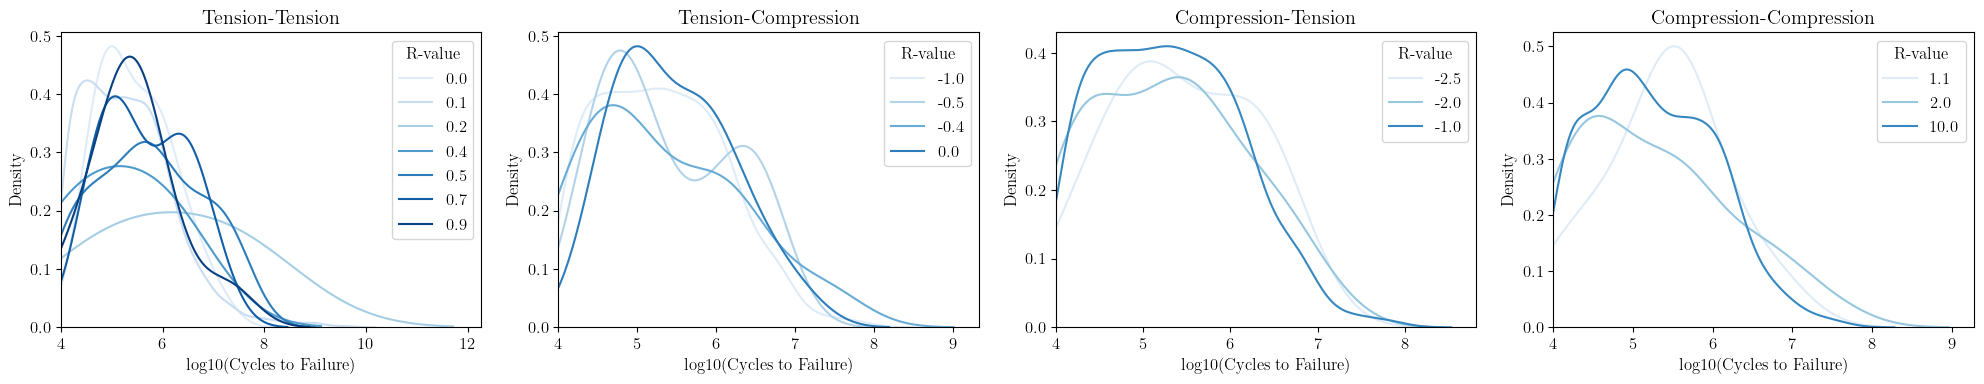

In [48]:
cmap = plt.get_cmap("Blues")
rvalues = sorted(set(trainer.datamodule.get_not_imputed_df()["R-value"]))
plt.figure(figsize=(20, 4))

ax = plt.subplot(141)
tt = [x for x in rvalues if 0<=x<1]
trainer.plot_on_one_axes(meth_name="plot_kde", meth_kwargs_ls=[dict(select_by_value_kwargs={"selection": {"R-value": x, "log10(Cycles to Failure)": (4, 12)}}, clr=[cmap(idx*30+30)], kdeplot_kwargs={"label": round(x, 1)}) for idx, x in enumerate(tt) ], meth_fix_kwargs=dict(x_col="log10(Cycles to Failure)"), legend=True, legend_kwargs=dict(title="R-value"), xlabel="log10(Cycles to Failure)", ylabel="Density", ax=ax)
ax.set_title("Tension-Tension")
ax.set_xlim(left=max([ax.get_xlim()[0], 4]))

ax = plt.subplot(142)
tc = [x for x in rvalues if -1<=x<=0]
trainer.plot_on_one_axes(meth_name="plot_kde", meth_kwargs_ls=[dict(select_by_value_kwargs={"selection": {"R-value": x, "log10(Cycles to Failure)": (4, 12)}}, clr=[cmap(idx*50+30)], kdeplot_kwargs={"label": round(x, 1)}) for idx, x in enumerate(tc)], meth_fix_kwargs=dict(x_col="log10(Cycles to Failure)"), legend=True, legend_kwargs=dict(title="R-value"), xlabel="log10(Cycles to Failure)", ylabel="Density", ax=ax)
ax.set_title("Tension-Compression")
ax.set_xlim(left=max([ax.get_xlim()[0], 4]))

ax = plt.subplot(143)
ct = [x for x in rvalues if x<=-1]
trainer.plot_on_one_axes(meth_name="plot_kde", meth_kwargs_ls=[dict(select_by_value_kwargs={"selection": {"R-value": x, "log10(Cycles to Failure)": (4, 12)}}, clr=[cmap(idx*70+30)], kdeplot_kwargs={"label": round(x, 1)}) for idx, x in enumerate(ct)], meth_fix_kwargs=dict(x_col="log10(Cycles to Failure)"), legend=True, legend_kwargs=dict(title="R-value"), xlabel="log10(Cycles to Failure)", ylabel="Density", ax=ax)
ax.set_title("Compression-Tension")
ax.set_xlim(left=max([ax.get_xlim()[0], 4]))

ax = plt.subplot(144)
cc = [x for x in rvalues if x>1]
trainer.plot_on_one_axes(meth_name="plot_kde", meth_kwargs_ls=[dict(select_by_value_kwargs={"selection": {"R-value": x, "log10(Cycles to Failure)": (4, 12)}}, clr=[cmap(idx*70+30)], kdeplot_kwargs={"label": round(x, 2)}) for idx, x in enumerate(cc)], meth_fix_kwargs=dict(x_col="log10(Cycles to Failure)"), legend=True, legend_kwargs=dict(title="R-value"), xlabel="log10(Cycles to Failure)", ylabel="Density", ax=ax)
ax.set_title("Compression-Compression")
ax.set_xlim(left=max([ax.get_xlim()[0], 4]))

plt.show()

### KDE of cycle split by Ralative Mean Stress

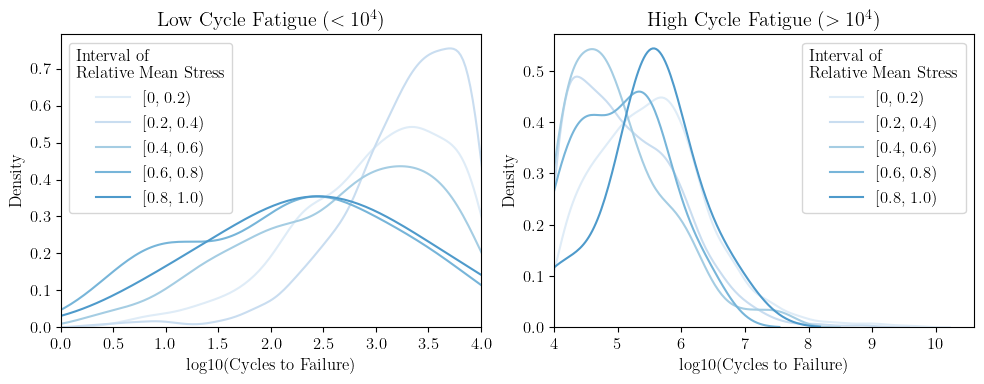

In [49]:
intervals = [(0, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, 1.0)]
cmap = plt.get_cmap("Blues")

plt.figure(figsize=(10, 4))
ax = plt.subplot(121)
trainer.plot_on_one_axes(meth_name="plot_kde", meth_kwargs_ls=[dict(select_by_value_kwargs={"selection": {"Relative Mean Stress": intv, "log10(Cycles to Failure)": (0, 4)}}, clr=[cmap(idx*30+30)], kdeplot_kwargs={"label": f"[{intv[0]}, {intv[1]})"}) for idx, intv in enumerate(intervals) ], meth_fix_kwargs=dict(x_col="log10(Cycles to Failure)"), legend=True, legend_kwargs=dict(title="Interval of \nRelative Mean Stress"), xlabel="log10(Cycles to Failure)", ylabel="Density", ax=ax)
ax.set_title("Low Cycle Fatigue ($<10^4$)")
ax.set_xlim(left=max([ax.get_xlim()[0], 0]), right=min([ax.get_xlim()[1], 4]))

ax = plt.subplot(122)
trainer.plot_on_one_axes(meth_name="plot_kde", meth_kwargs_ls=[dict(select_by_value_kwargs={"selection": {"Relative Mean Stress": intv, "log10(Cycles to Failure)": (4, 12)}}, clr=[cmap(idx*30+30)], kdeplot_kwargs={"label": f"[{intv[0]}, {intv[1]})"}) for idx, intv in enumerate(intervals) ], meth_fix_kwargs=dict(x_col="log10(Cycles to Failure)"), legend=True, legend_kwargs=dict(title="Interval of \nRelative Mean Stress"), xlabel="log10(Cycles to Failure)", ylabel="Density", ax=ax)
ax.set_title("High Cycle Fatigue ($>10^4)$")
ax.set_xlim(left=max([ax.get_xlim()[0], 4]))

plt.show()

## Weight Fraction vs others

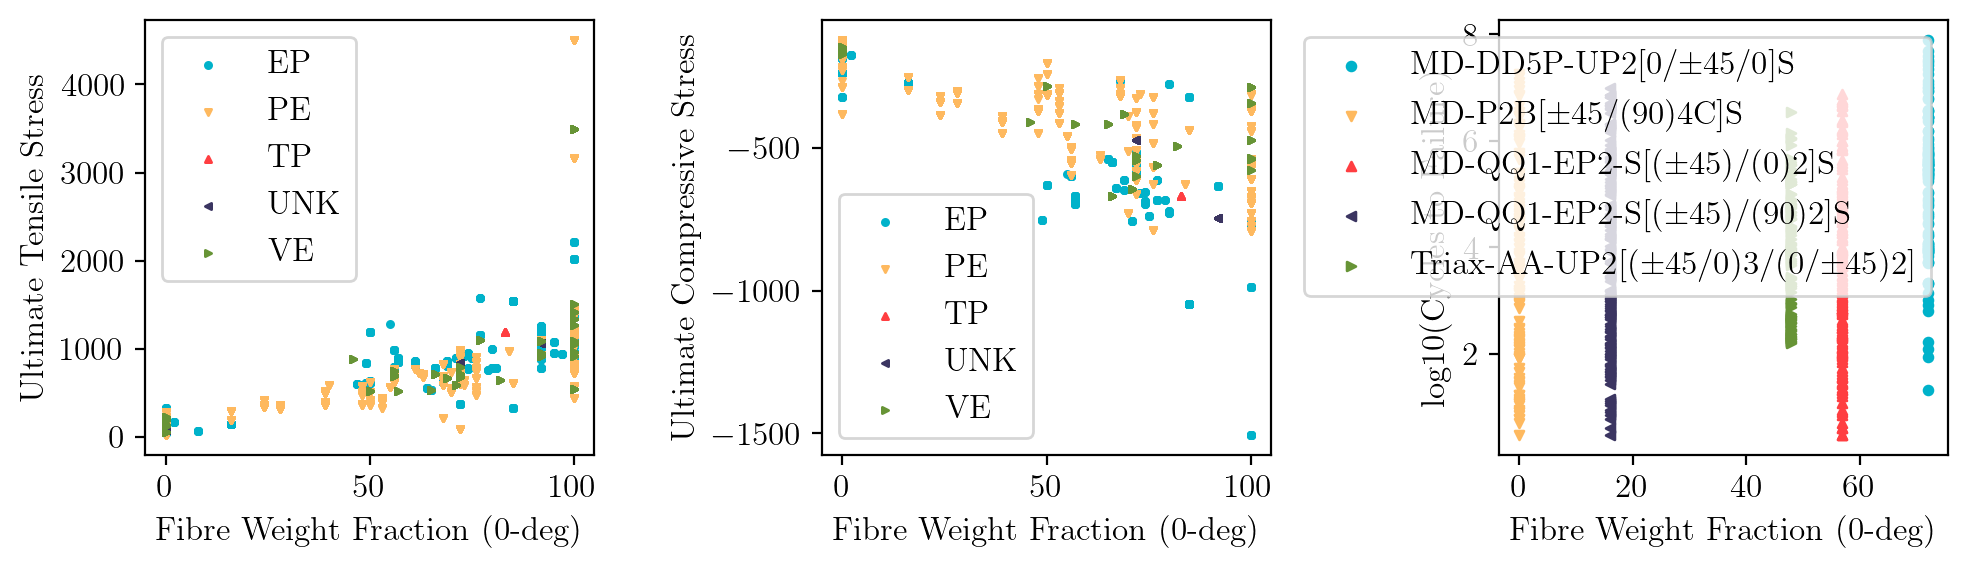

In [50]:
plt.figure(figsize=(10,3), dpi=200)
ax1 = plt.subplot(131)
trainer.plot_scatter(x_col="Fibre Weight Fraction (0-deg)", y_col="Ultimate Tensile Stress", category="Resin Type", scatter_kwargs=dict(s=5), ax=ax1)
ax1.set_xlabel("Fibre Weight Fraction (0-deg)")
ax1.set_ylabel("Ultimate Tensile Stress")

ax2 = plt.subplot(132)
trainer.plot_scatter(x_col="Fibre Weight Fraction (0-deg)", y_col="Ultimate Compressive Stress", category="Resin Type", scatter_kwargs=dict(s=5), ax=ax2)
ax2.set_xlabel("Fibre Weight Fraction (0-deg)")
ax2.set_ylabel("Ultimate Compressive Stress")

mcodes = ["MD-P2B[±45/(90)4C]S", "MD-DD5P-UP2[0/±45/0]S", "MD-QQ1-EP2-S[(±45)/(90)2]S", "MD-QQ1-EP2-S[(±45)/(0)2]S", "Triax-AA-UP2[(±45/0)3/(0/±45)2]"]

ax3 = plt.subplot(133)
trainer.plot_scatter(x_col="Fibre Weight Fraction (0-deg)", y_col="log10(Cycles to Failure)", category="Material_Code", select_by_value_kwargs=dict(selection={"Material_Code": mcodes}), scatter_kwargs=dict(s=10), ax=ax3)
ax3.set_xlabel("Fibre Weight Fraction (0-deg)")
ax3.set_ylabel("log10(Cycles to Failure)")
plt.show()

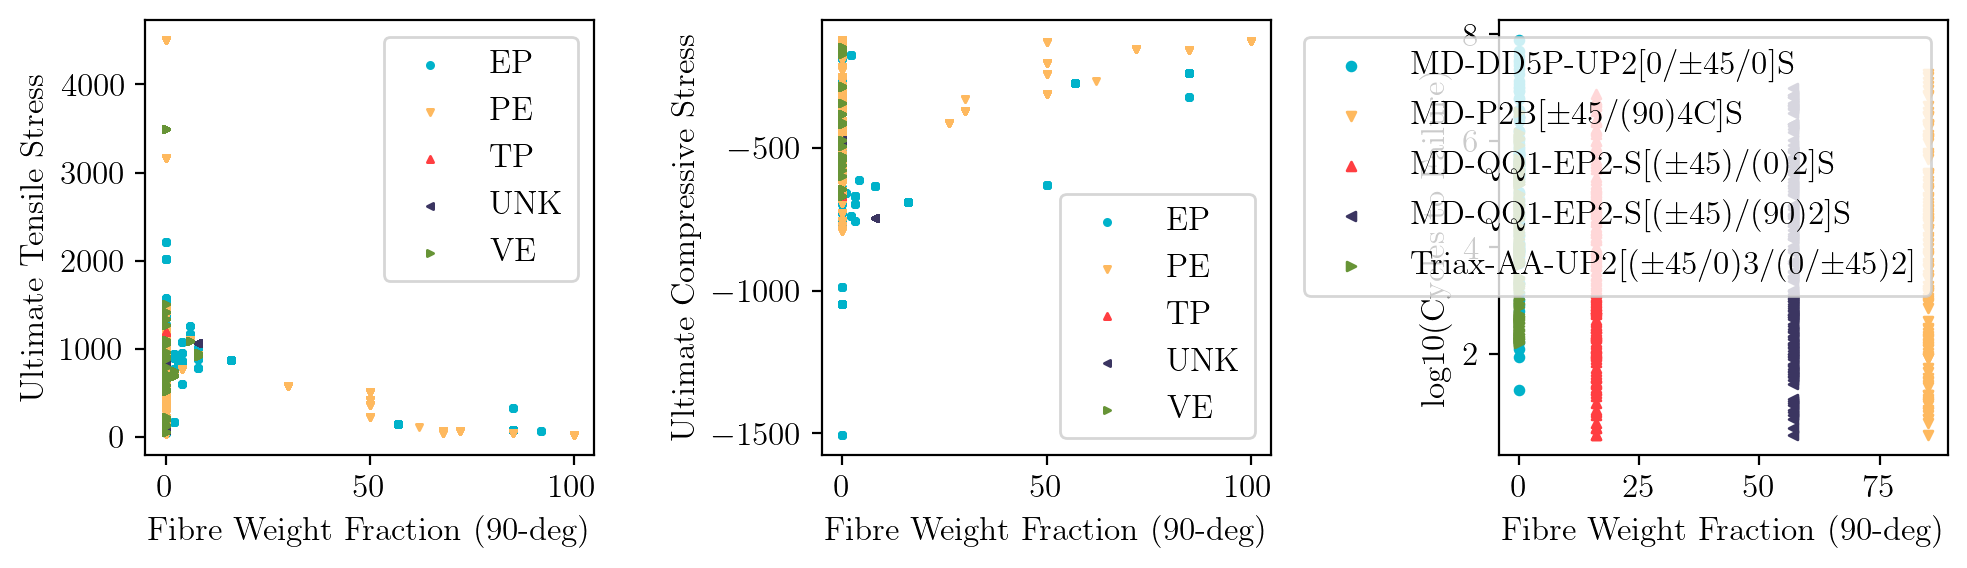

In [51]:
plt.figure(figsize=(10,3), dpi=200)
ax1 = plt.subplot(131)
trainer.plot_scatter(x_col="Fibre Weight Fraction (90-deg)", y_col="Ultimate Tensile Stress", category="Resin Type", scatter_kwargs=dict(s=5), ax=ax1)
ax1.set_xlabel("Fibre Weight Fraction (90-deg)")
ax1.set_ylabel("Ultimate Tensile Stress")

ax2 = plt.subplot(132)
trainer.plot_scatter(x_col="Fibre Weight Fraction (90-deg)", y_col="Ultimate Compressive Stress", category="Resin Type", scatter_kwargs=dict(s=5), ax=ax2)
ax2.set_xlabel("Fibre Weight Fraction (90-deg)")
ax2.set_ylabel("Ultimate Compressive Stress")

mcodes = ["MD-P2B[±45/(90)4C]S", "MD-DD5P-UP2[0/±45/0]S", "MD-QQ1-EP2-S[(±45)/(90)2]S", "MD-QQ1-EP2-S[(±45)/(0)2]S", "Triax-AA-UP2[(±45/0)3/(0/±45)2]"]

ax3 = plt.subplot(133)
trainer.plot_scatter(x_col="Fibre Weight Fraction (90-deg)", y_col="log10(Cycles to Failure)", category="Material_Code", scatter_kwargs=dict(s=10), select_by_value_kwargs=dict(selection={"Material_Code": mcodes}), ax=ax3)
ax3.set_xlabel("Fibre Weight Fraction (90-deg)")
ax3.set_ylabel("log10(Cycles to Failure)")
plt.show()

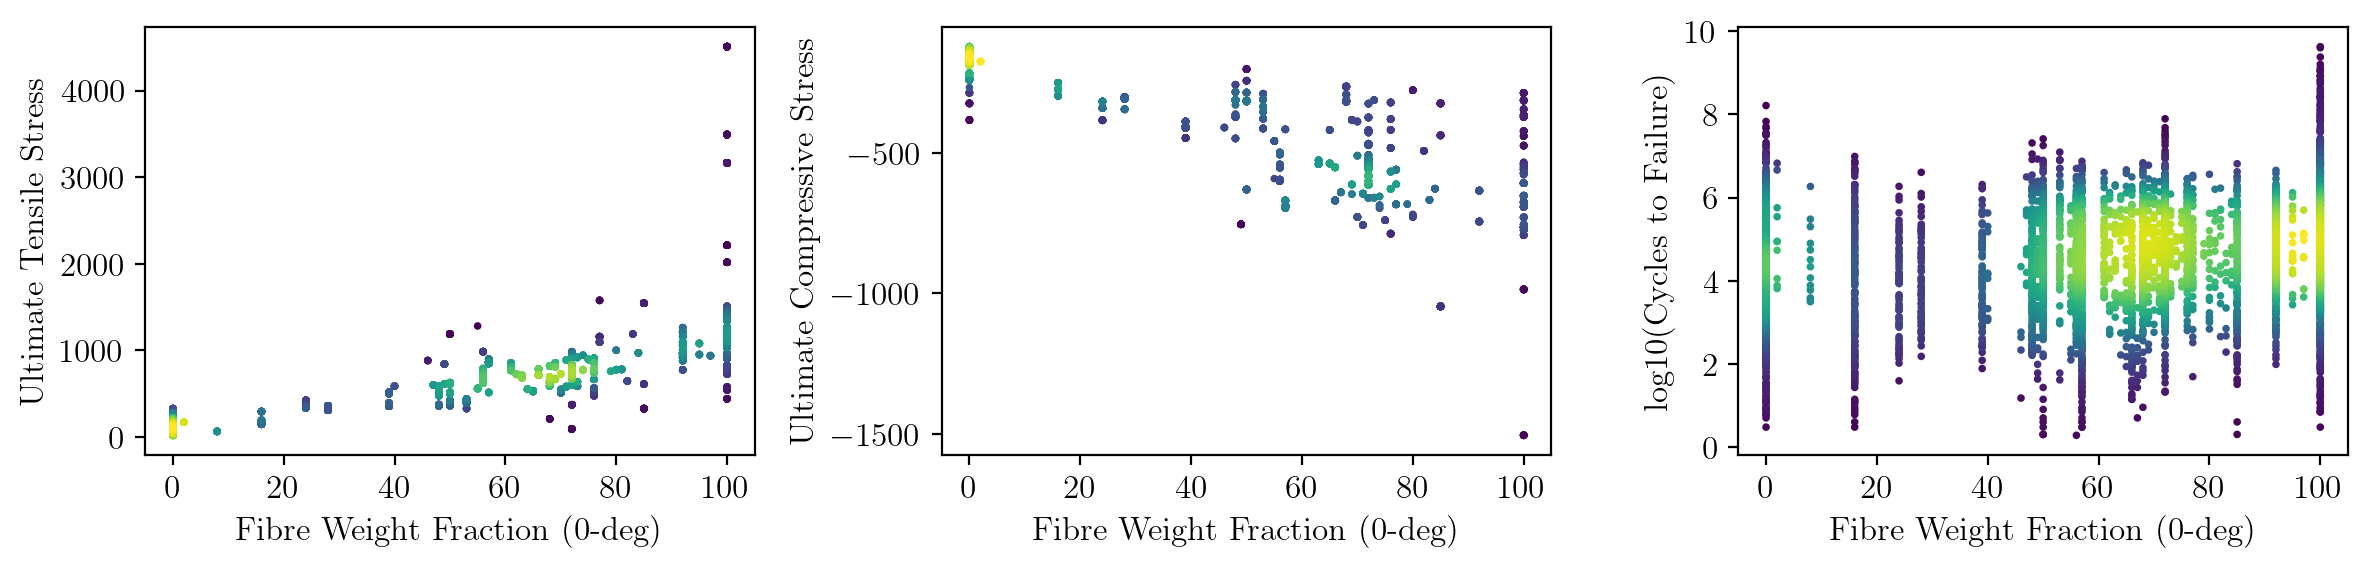

In [52]:
plt.figure(figsize=(12,3), dpi=200)
ax1 = plt.subplot(131)
trainer.plot_scatter(x_col="Fibre Weight Fraction (0-deg)", y_col="Ultimate Tensile Stress", imputed=False, ax=ax1, scatter_kwargs=dict(s=3), kde_color=True)
ax1.set_xlabel("Fibre Weight Fraction (0-deg)")
ax1.set_ylabel("Ultimate Tensile Stress")

ax2 = plt.subplot(132)
trainer.plot_scatter(x_col="Fibre Weight Fraction (0-deg)", y_col="Ultimate Compressive Stress", imputed=False, ax=ax2, scatter_kwargs=dict(s=3), kde_color=True)
ax2.set_xlabel("Fibre Weight Fraction (0-deg)")
ax2.set_ylabel("Ultimate Compressive Stress")

ax3 = plt.subplot(133)
trainer.plot_scatter(x_col="Fibre Weight Fraction (0-deg)", y_col="log10(Cycles to Failure)", imputed=False, ax=ax3, scatter_kwargs=dict(s=3), kde_color=True)
ax3.set_xlabel("Fibre Weight Fraction (0-deg)")
ax3.set_ylabel("log10(Cycles to Failure)")
plt.show()

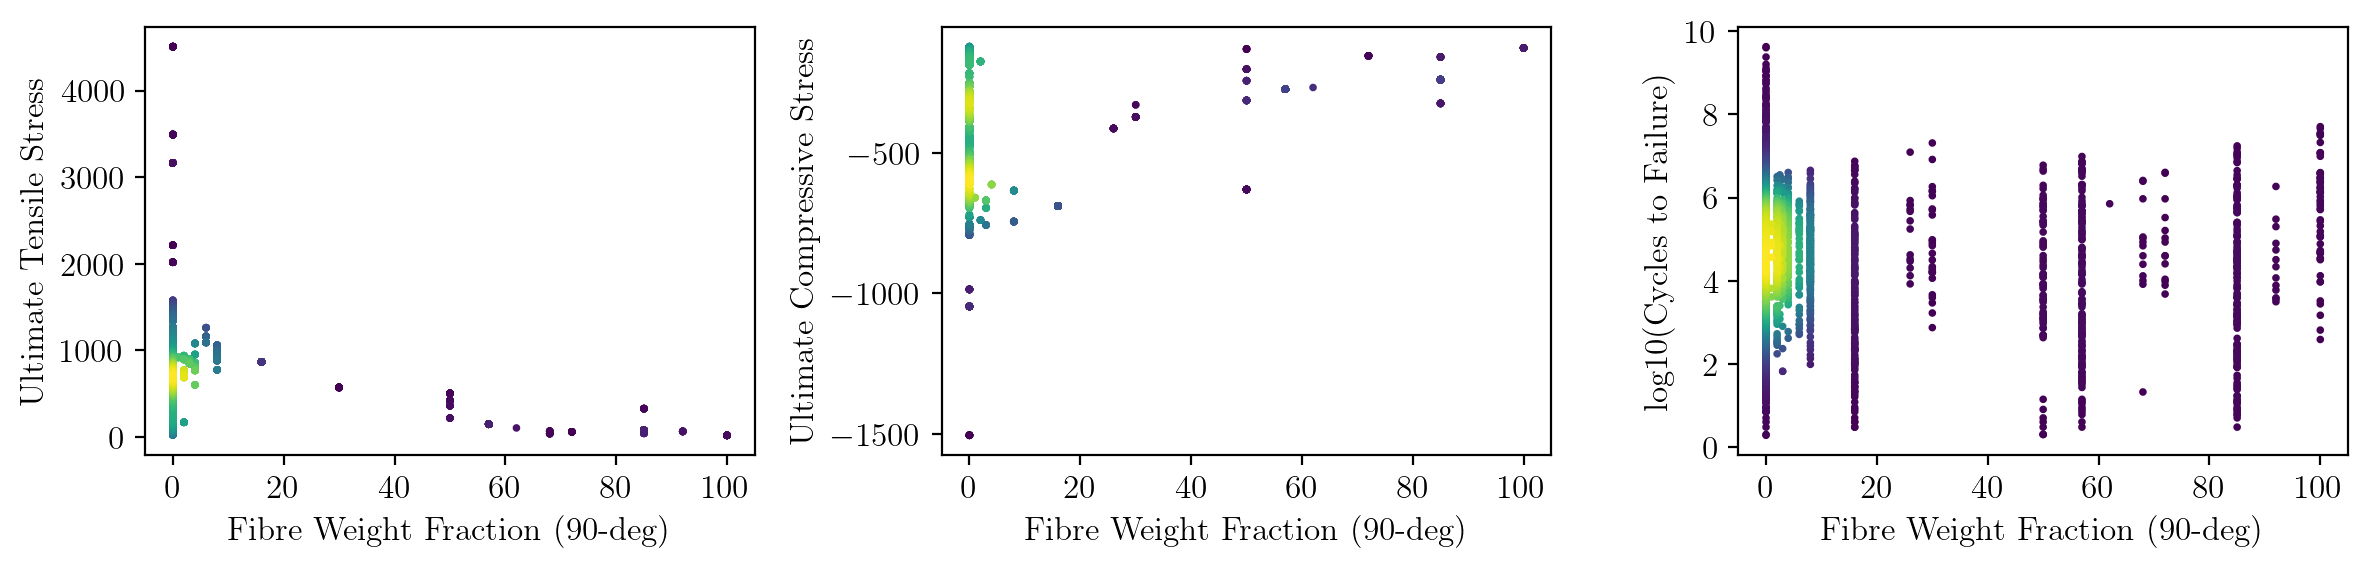

In [53]:
plt.figure(figsize=(12,3), dpi=200)
ax1 = plt.subplot(131)
trainer.plot_scatter(x_col="Fibre Weight Fraction (90-deg)", y_col="Ultimate Tensile Stress", imputed=False, ax=ax1, scatter_kwargs=dict(s=3), kde_color=True)
ax1.set_xlabel("Fibre Weight Fraction (90-deg)")
ax1.set_ylabel("Ultimate Tensile Stress")

ax2 = plt.subplot(132)
trainer.plot_scatter(x_col="Fibre Weight Fraction (90-deg)", y_col="Ultimate Compressive Stress", imputed=False, ax=ax2, scatter_kwargs=dict(s=3), kde_color=True)
ax2.set_xlabel("Fibre Weight Fraction (90-deg)")
ax2.set_ylabel("Ultimate Compressive Stress")

ax3 = plt.subplot(133)
trainer.plot_scatter(x_col="Fibre Weight Fraction (90-deg)", y_col="log10(Cycles to Failure)", imputed=False, ax=ax3, scatter_kwargs=dict(s=3), kde_color=True)
ax3.set_xlabel("Fibre Weight Fraction (90-deg)")
ax3.set_ylabel("log10(Cycles to Failure)")
plt.show()

## Histograms

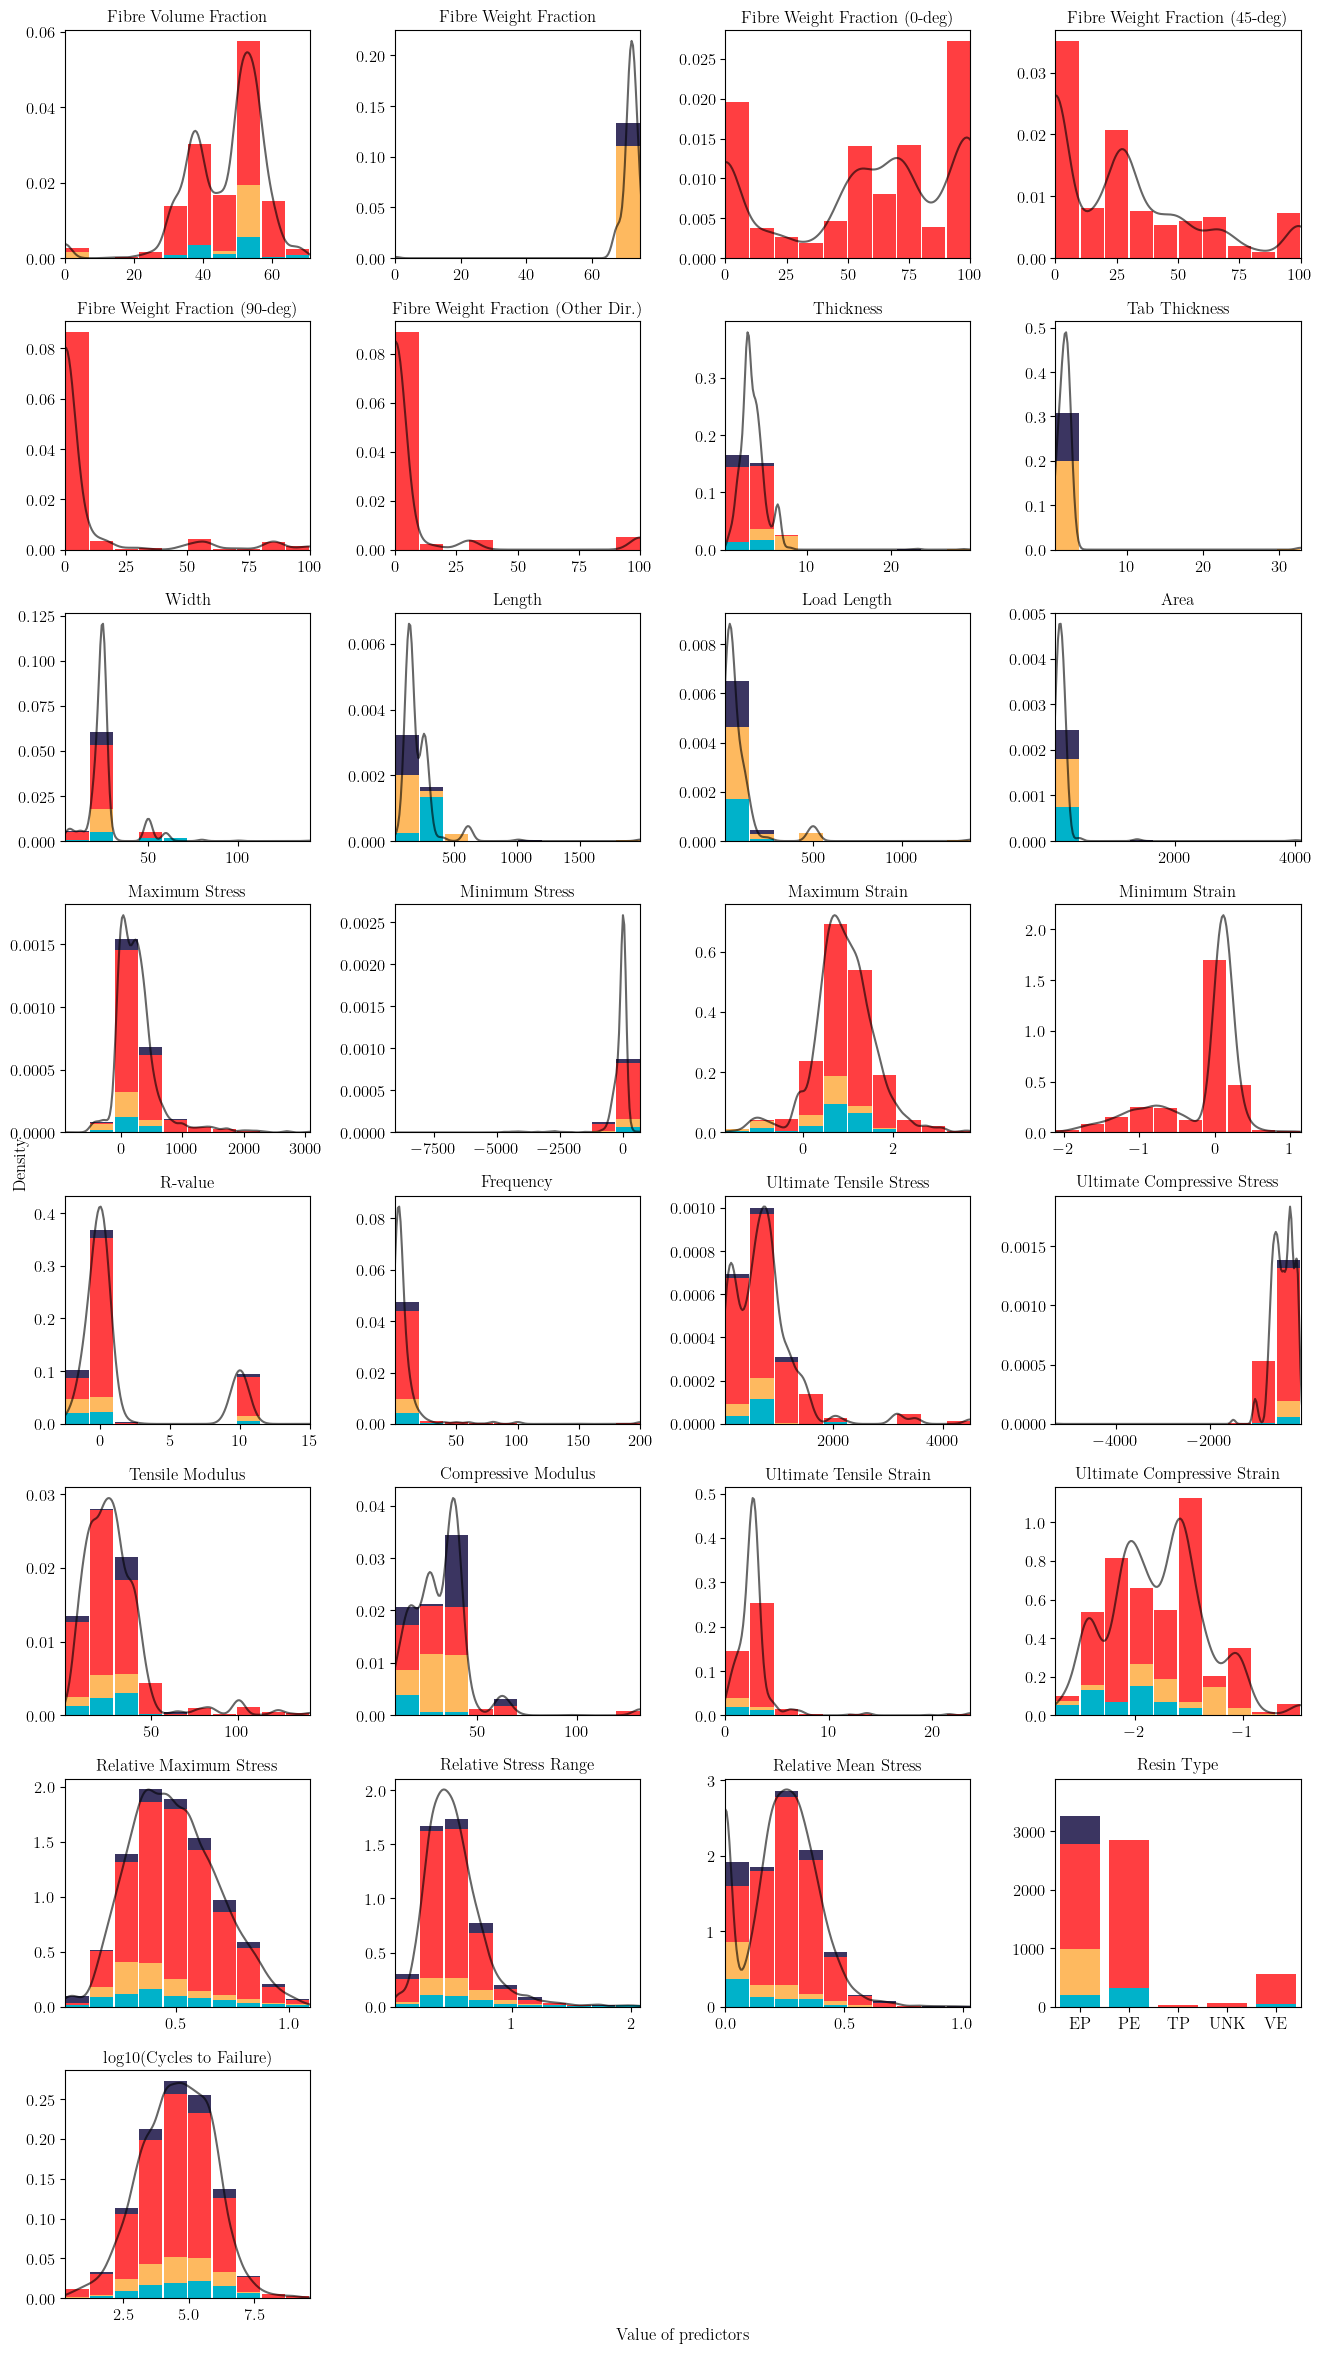

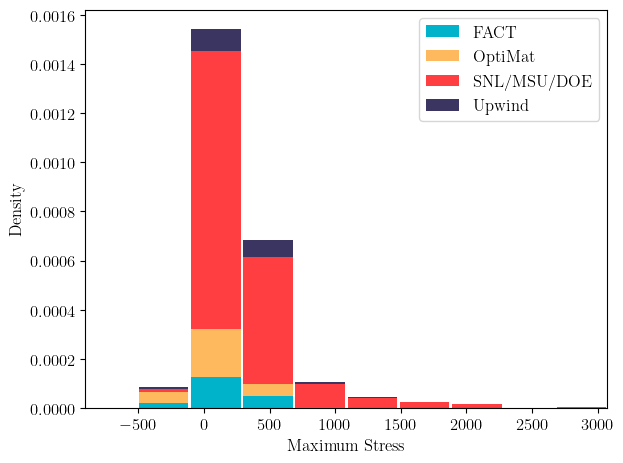

<AxesSubplot:xlabel='Maximum Stress', ylabel='Density'>

In [54]:
from tabensemb.utils.utils import global_palette, global_marker

trainer.plot_hist_all(imputed=False, kde=True, kde_kwargs=dict(kdeplot_kwargs=dict(color="k", alpha=0.6, zorder=10)), category="Data source", legend=False)
trainer.plot_hist(feature="Maximum Stress", imputed=False, category="Data source")

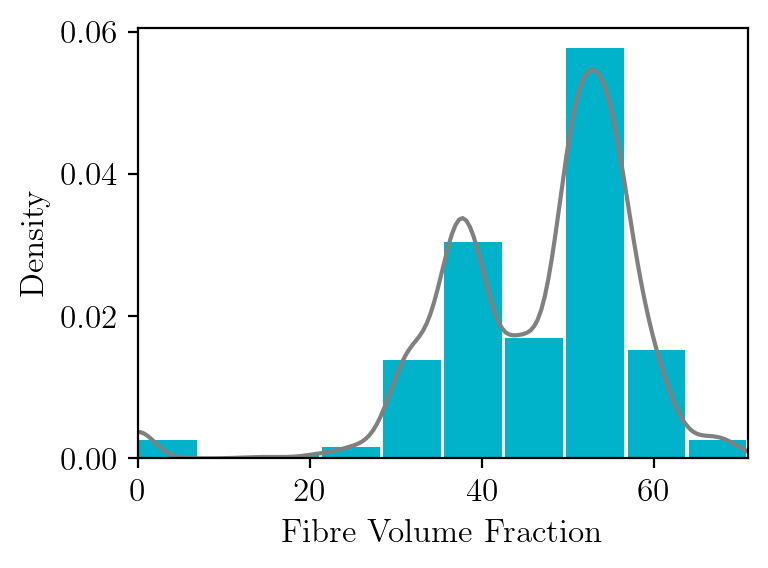

<AxesSubplot:xlabel='Fibre Volume Fraction', ylabel='Density'>

In [55]:
trainer.plot_hist(feature="Fibre Volume Fraction", figure_kwargs=dict(figsize=(4, 3), dpi=200), kde=True, kde_kwargs=dict(clr=["grey"]))

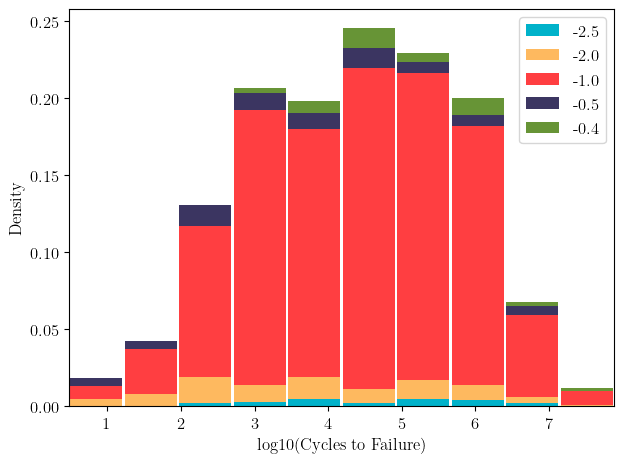

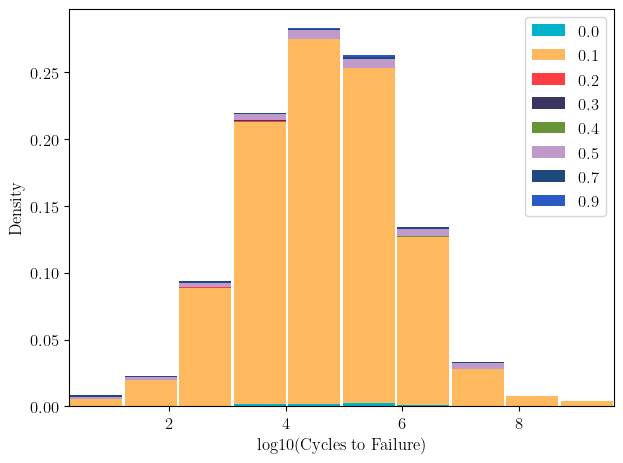

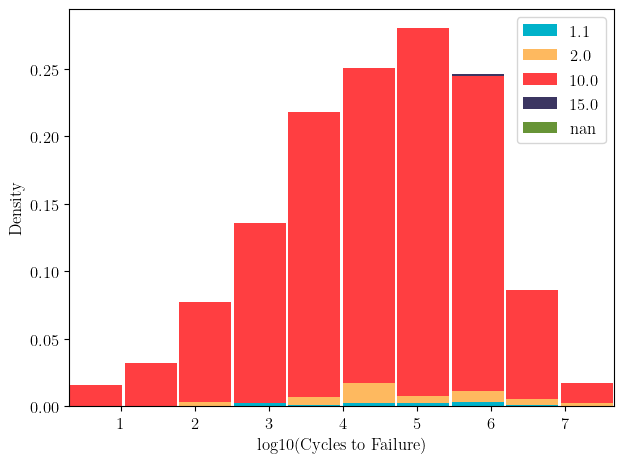

<AxesSubplot:xlabel='log10(Cycles to Failure)', ylabel='Density'>

In [56]:
trainer.plot_hist(feature="log10(Cycles to Failure)", imputed=False, category="R-value", select_by_value_kwargs={"selection": {"R-value": (-20, 0)}}, hist_kwargs={"stacked": True})
trainer.plot_hist(feature="log10(Cycles to Failure)", imputed=False, category="R-value", select_by_value_kwargs={"selection": {"R-value": (0, 1)}}, hist_kwargs={"stacked": True})
trainer.plot_hist(feature="log10(Cycles to Failure)", imputed=False, category="R-value", select_by_value_kwargs={"selection": {"R-value": (1, 20)}}, hist_kwargs={"stacked": True})
# all_r_values = trainer.df.loc[trainer.datamodule.select_by_value(selection={"R-value": (-20, 0)}),"R-value"]
# all_cycles = trainer.df.loc[trainer.datamodule.select_by_value(selection={"R-value": (-20, 0)}),"log10(Cycles to Failure)"]
# r = (all_cycles.min(), all_cycles.max())
# trainer.plot_on_one_axes(meth_name="plot_hist", meth_kwargs_ls=[dict(select_by_value_kwargs={"selection": {"R-value": rval}}, hist_kwargs={"color": global_palette[idx], "label": rval, "range": r, "bins":10}) for idx, rval in enumerate(set(all_r_values))], meth_fix_kwargs=dict(imputed=False, feature="log10(Cycles to Failure)"), xlabel="log10(Cycles to Failure)", ylabel="Density")

## KDE and PDF

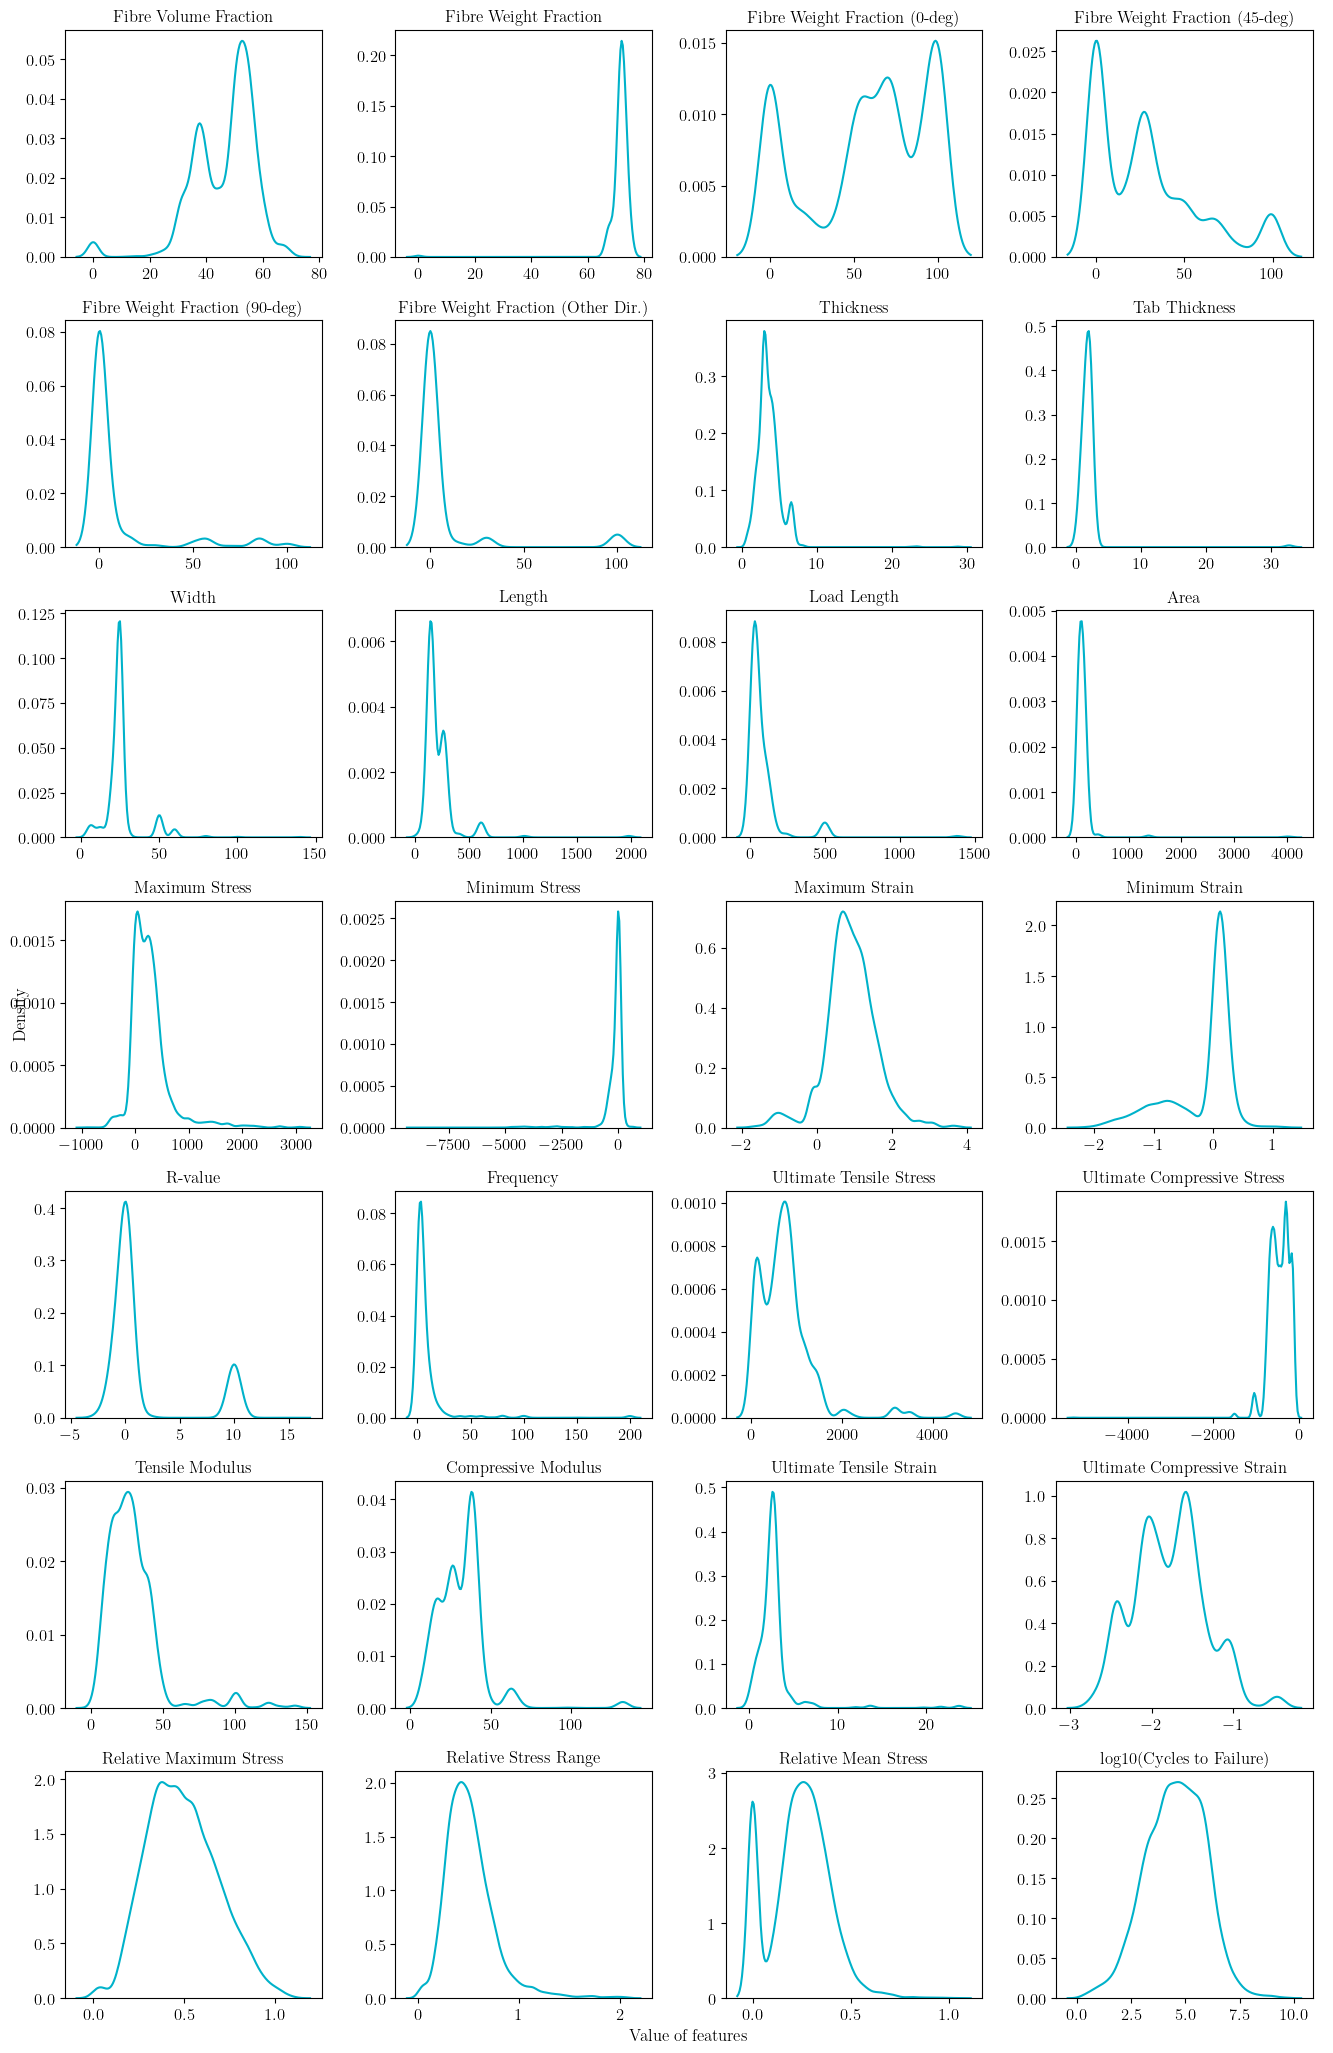

In [57]:
_ = trainer.plot_kde_all(imputed=False)

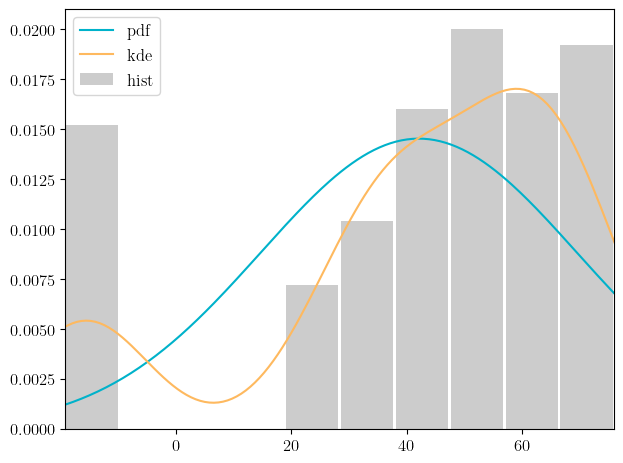

<AxesSubplot:>

In [58]:
trainer.plot_on_one_axes(
    meth_name=["plot_hist", "plot_pdf", "plot_kde"],
    meth_kwargs_ls=[
        dict(
            feature="Maximum Stress",
            select_by_value_kwargs={
                "selection": {"Material_Code": "MD-P2B[±45/(90)4C]S"}
            },
            hist_kwargs={"color": "k", "alpha": 0.2, "label": "hist"},
            imputed=False,
        ),
        dict(
            feature="Maximum Stress",
            imputed=False,
            select_by_value_kwargs={
                "selection": {"Material_Code": "MD-P2B[±45/(90)4C]S"}
            },
            plot_kwargs={"color": global_palette[0], "label": "pdf"},
        ),
        dict(
            x_col="Maximum Stress",
            imputed=False,
            select_by_value_kwargs={
                "selection": {"Material_Code": "MD-P2B[±45/(90)4C]S"}
            },
            kdeplot_kwargs={"color": global_palette[1], "label": "kde"},
        ),
    ],
    legend=True,
)

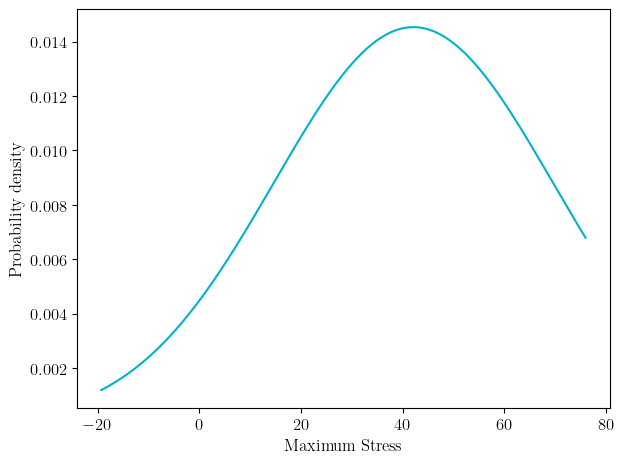

<AxesSubplot:xlabel='Maximum Stress', ylabel='Probability density'>

In [59]:
trainer.plot_pdf(
    feature="Maximum Stress",
    select_by_value_kwargs={"selection": {"Material_Code": "MD-P2B[±45/(90)4C]S"}},
    imputed=False,
)

## Correlation

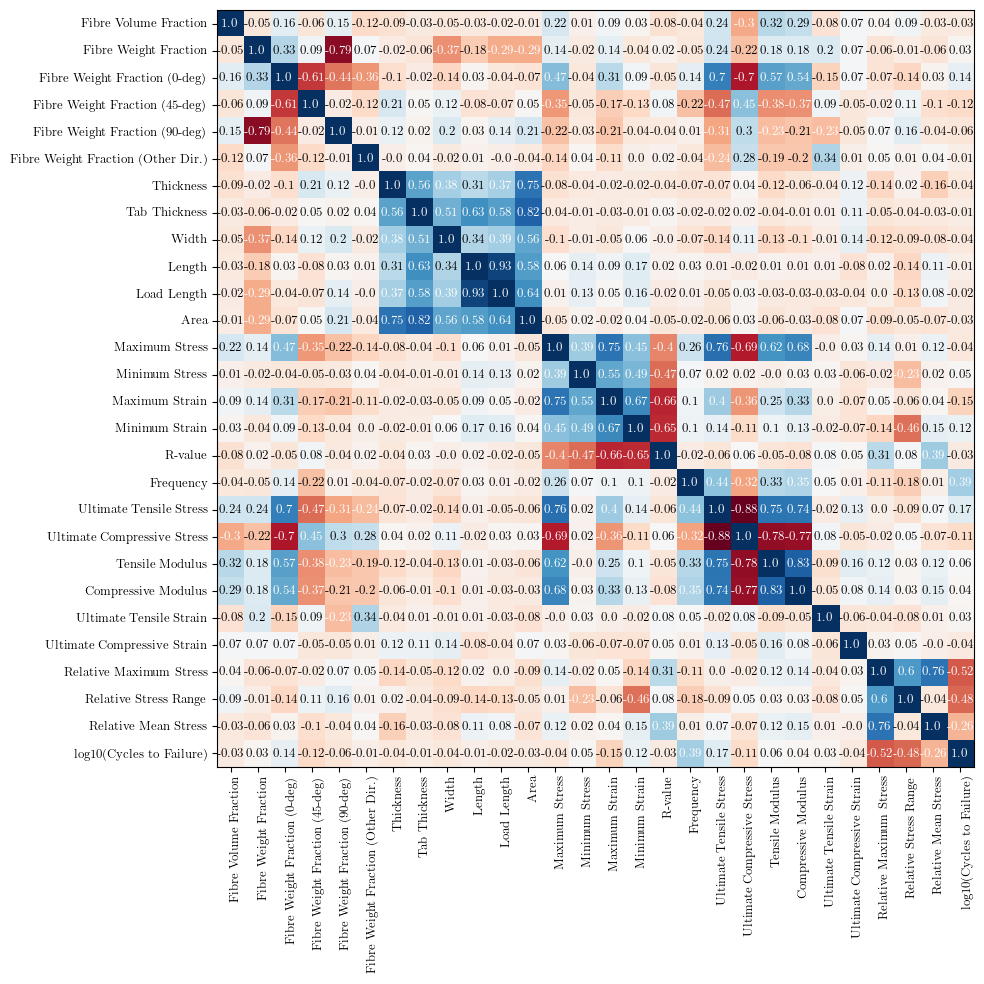

<AxesSubplot:>

In [60]:
trainer.plot_corr(fontsize=9, imputed=True, imshow_kwargs=dict(cmap="RdBu"))

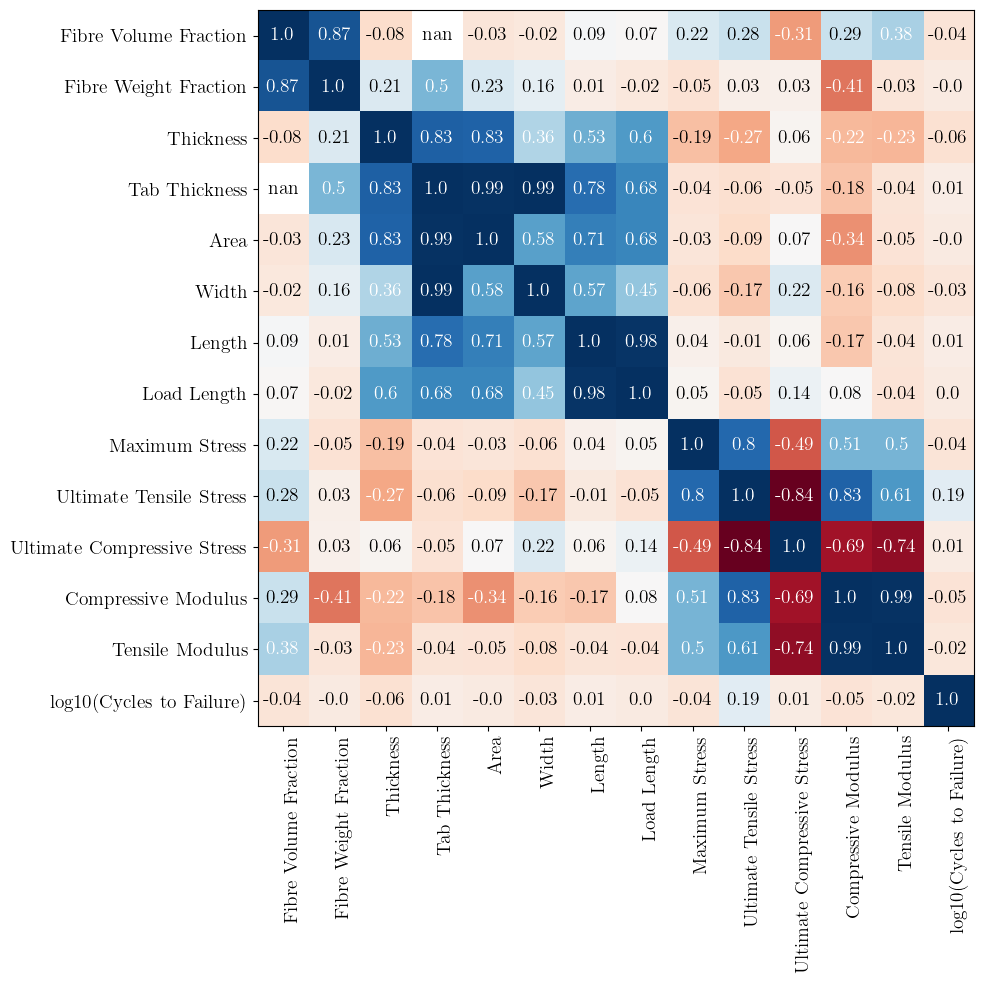

<AxesSubplot:>

In [61]:
import numpy as np
from tabensemb.data.utils import get_corr_sets

corr = trainer.datamodule.cal_corr(imputed=False, features_only=True).abs()
corr_names = get_corr_sets(np.where(corr>0.8), trainer.cont_feature_names)[0]
trainer.plot_corr(fontsize=14, features=corr_names, include_label=True, imputed=False, imshow_kwargs=dict(cmap="RdBu"))

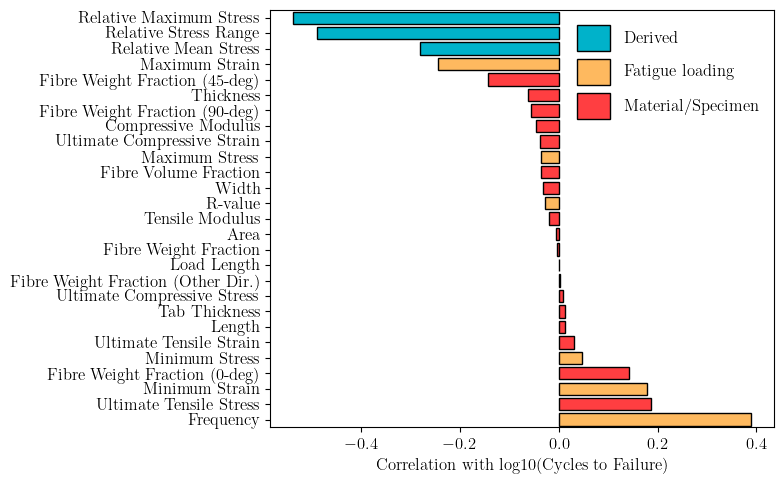

<AxesSubplot:xlabel='Correlation with log10(Cycles to Failure)'>

In [62]:
trainer.plot_corr_with_label(imputed=False, order="ascending", legend_kwargs={"loc": "upper right"})

Frequency has higher correlation with the target by means of the spearman correlation (a non-linear correlation).

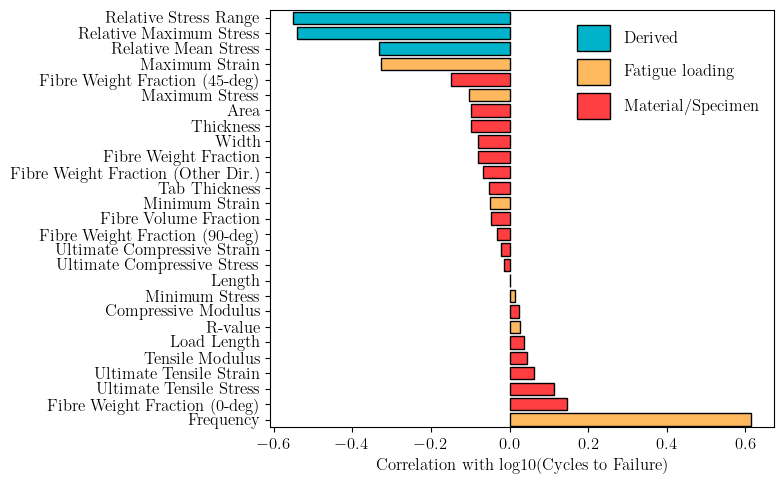

<AxesSubplot:xlabel='Correlation with log10(Cycles to Failure)'>

In [63]:
trainer.plot_corr_with_label(method="spearman", imputed=False, order="ascending", legend_kwargs={"loc": "upper right"})

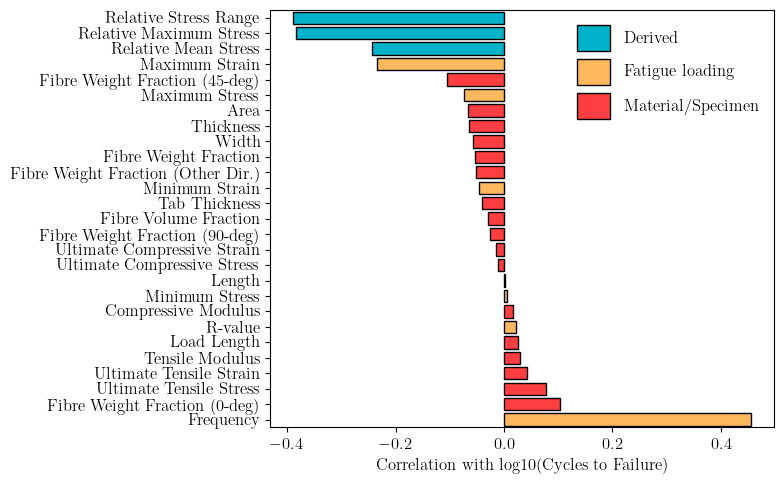

<AxesSubplot:xlabel='Correlation with log10(Cycles to Failure)'>

In [64]:
trainer.plot_corr_with_label(method="kendall", imputed=False, order="ascending", legend_kwargs={"loc": "upper right"})

## Pairplot

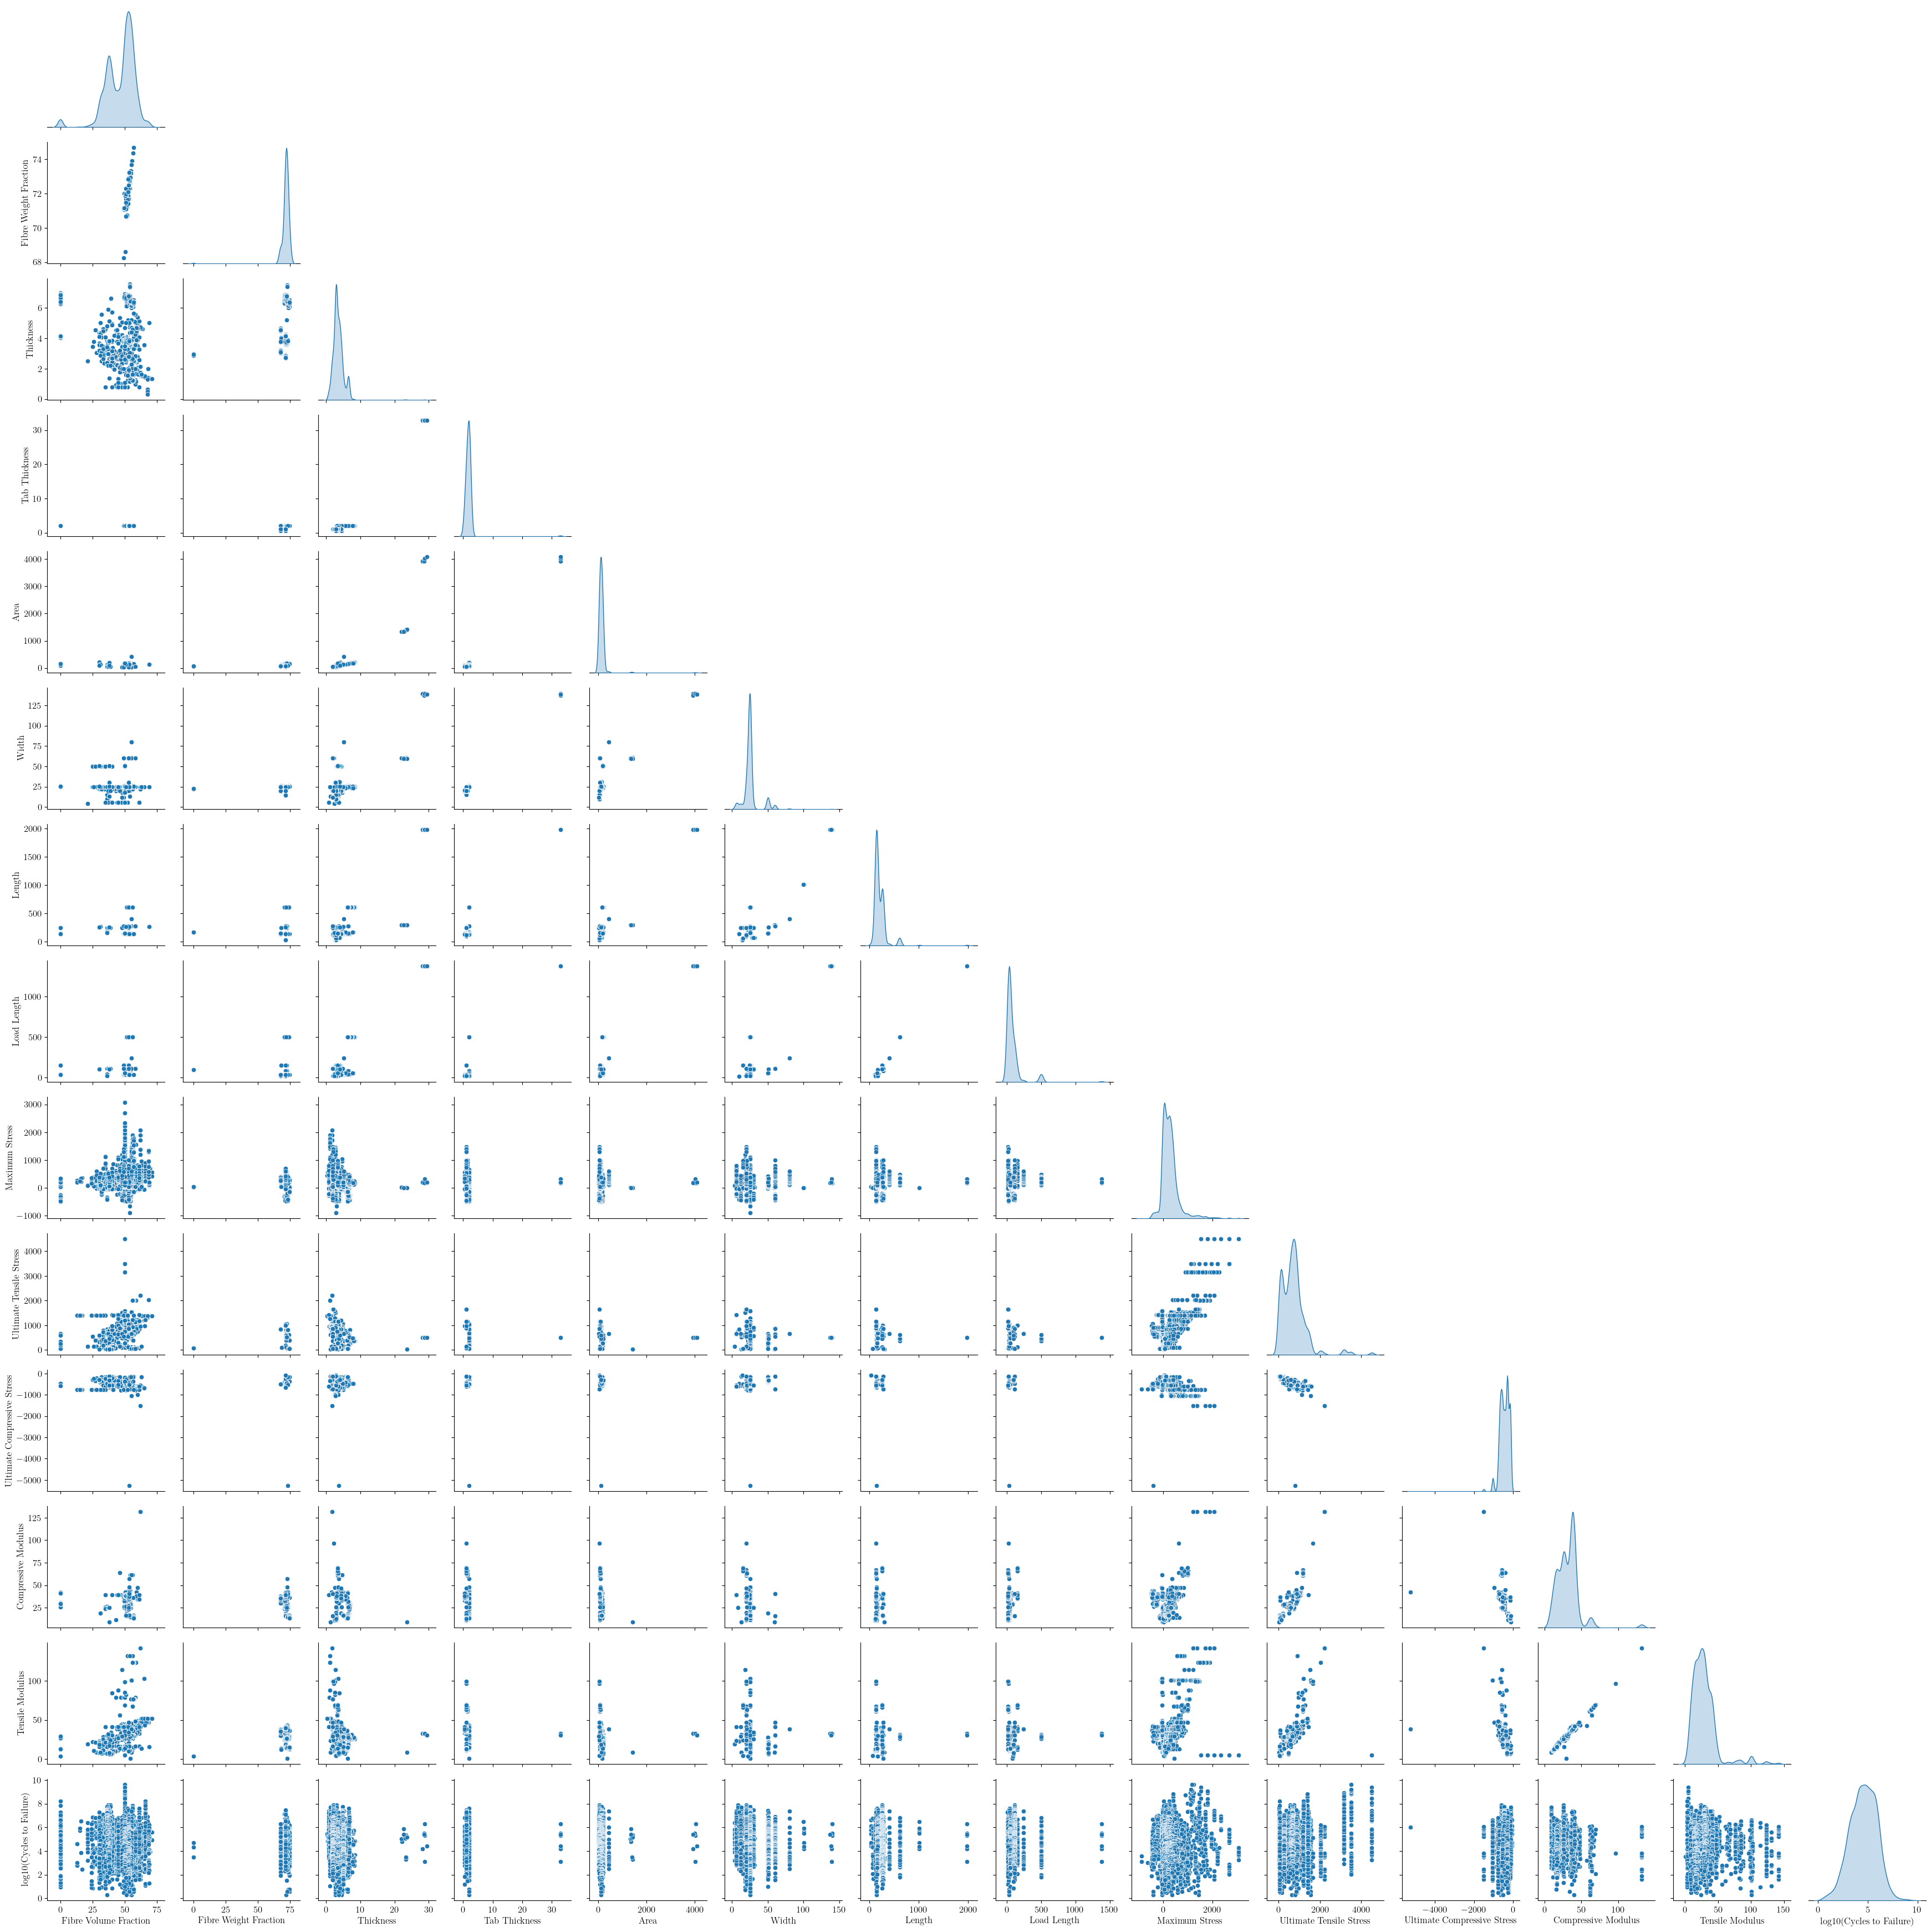

In [65]:
trainer.plot_pairplot(features=corr_names, imputed=False, include_label=True)

## Boxplot

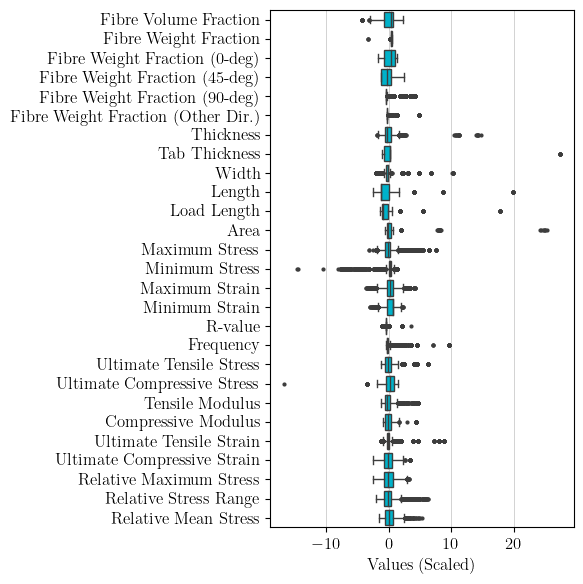

<AxesSubplot:xlabel='Values (Scaled)'>

In [66]:
trainer.plot_feature_box(imputed=False)

# Analyse results

In [2]:
from tabensemb.model import PytorchTabular, CatEmbed, AutoGluon
from src.model.thiswork import ThisWork

def _get_model_names(self):
    return ["AutoGluon_Linear Regression_NoWrap_1L_PCA_KMeans"]

ThisWork._get_model_names = _get_model_names
models = [
    # PytorchTabular(trainer, model_subset=["TabTransformer"]),
    AutoGluon(trainer, model_subset=["Linear Regression"]),
    CatEmbed(trainer, model_subset=["Category Embedding"]),
    ThisWork(trainer, model_subset=["AutoGluon_Linear Regression_NoWrap_1L_PCA_KMeans"], n_pca_dim=2)
]
trainer.clear_modelbase()
trainer.add_modelbases(models)
trainer.train(stderr_to_stdout=True)


-------------Run AutoGluon-------------

Training Linear Regression
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "output/analyse/2023-10-13-16-07-12-0_composite_test/AutoGluon/Linear Regression/"
AutoGluon Version:  0.7.0
Python Version:     3.8.17
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Mon Dec 13 20:27:58 CST 2021
Train Data Rows:    4062
Train Data Columns: 28
Tuning Data Rows:    1354
Tuning Data Columns: 28
Label Column: log10(Cycles to Failure)
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting PipelineFeatureGenerator...
	Available Memory:                    15067.69 MB
	Train Data (Original)  Memory Usage: 1.49 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of th

## Error histogram

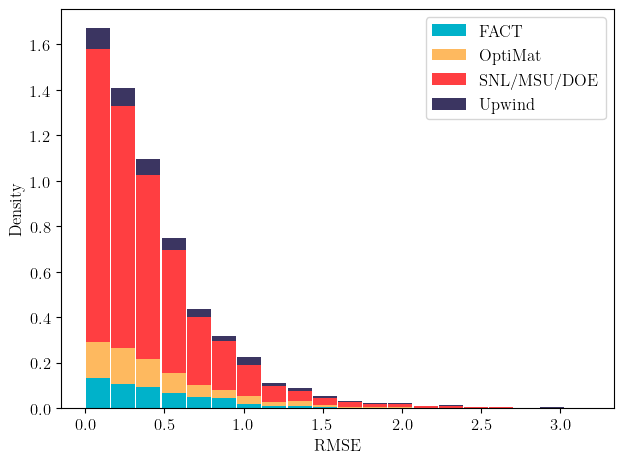

<AxesSubplot:xlabel='RMSE', ylabel='Density'>

In [68]:
trainer.plot_err_hist(program="PytorchTabular", model_name="Category Embedding", category="Data source")

## Truth vs pred

Training MSE Loss: 0.2836, R2: 0.8419
Validation MSE Loss: 0.4249, R2: 0.7757
Testing MSE Loss: 0.4344, R2: 0.7710


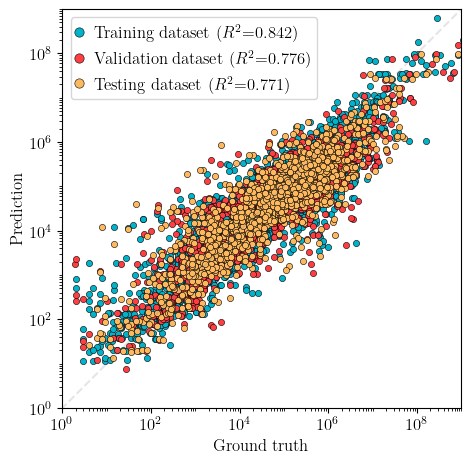

<AxesSubplot:xlabel='Ground truth', ylabel='Prediction'>

In [69]:
trainer.plot_truth_pred(program="PytorchTabular", model_name="Category Embedding")

## Partial error

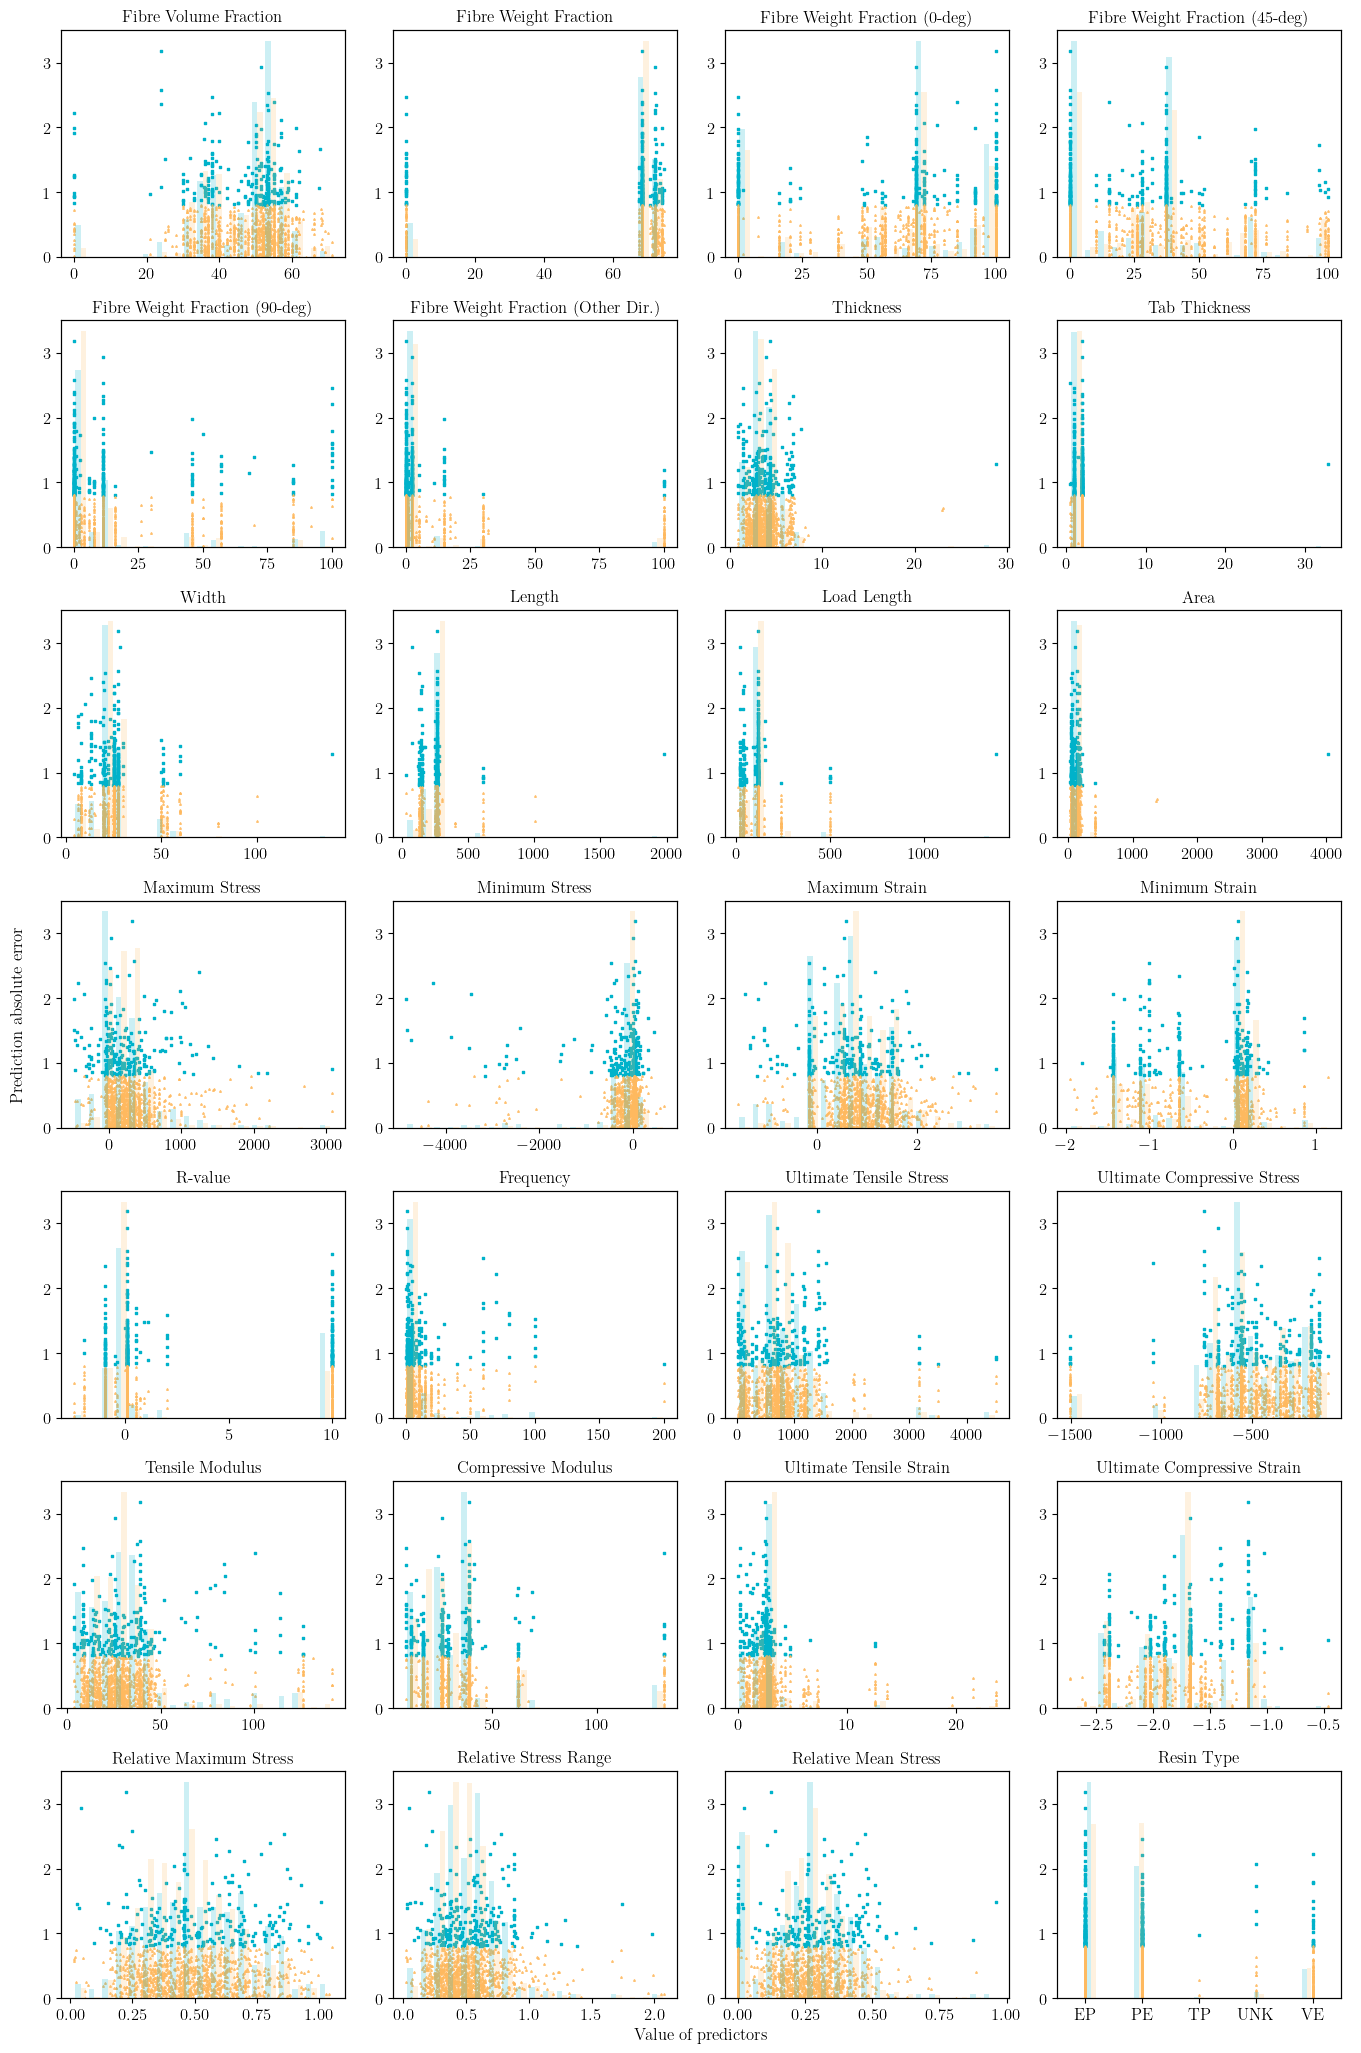

In [70]:
_ = trainer.plot_partial_err_all(program="PytorchTabular", model_name="Category Embedding")

## Partial dependency

Calculate PDP:  Fibre Volume Fraction
Calculate PDP:  Fibre Weight Fraction
Calculate PDP:  Fibre Weight Fraction (0-deg)
Calculate PDP:  Fibre Weight Fraction (45-deg)
Calculate PDP:  Fibre Weight Fraction (90-deg)
Calculate PDP:  Fibre Weight Fraction (Other Dir.)
Calculate PDP:  Thickness
Calculate PDP:  Tab Thickness
Calculate PDP:  Width
Calculate PDP:  Length
Calculate PDP:  Load Length
Calculate PDP:  Area
Calculate PDP:  Maximum Stress
Calculate PDP:  Minimum Stress
Calculate PDP:  Maximum Strain
Calculate PDP:  Minimum Strain
Calculate PDP:  R-value
Calculate PDP:  Frequency
Calculate PDP:  Ultimate Tensile Stress
Calculate PDP:  Ultimate Compressive Stress
Calculate PDP:  Tensile Modulus
Calculate PDP:  Compressive Modulus
Calculate PDP:  Ultimate Tensile Strain
Calculate PDP:  Ultimate Compressive Strain
Calculate PDP:  Relative Maximum Stress
Calculate PDP:  Relative Stress Range
Calculate PDP:  Relative Mean Stress
Calculate PDP:  Resin Type


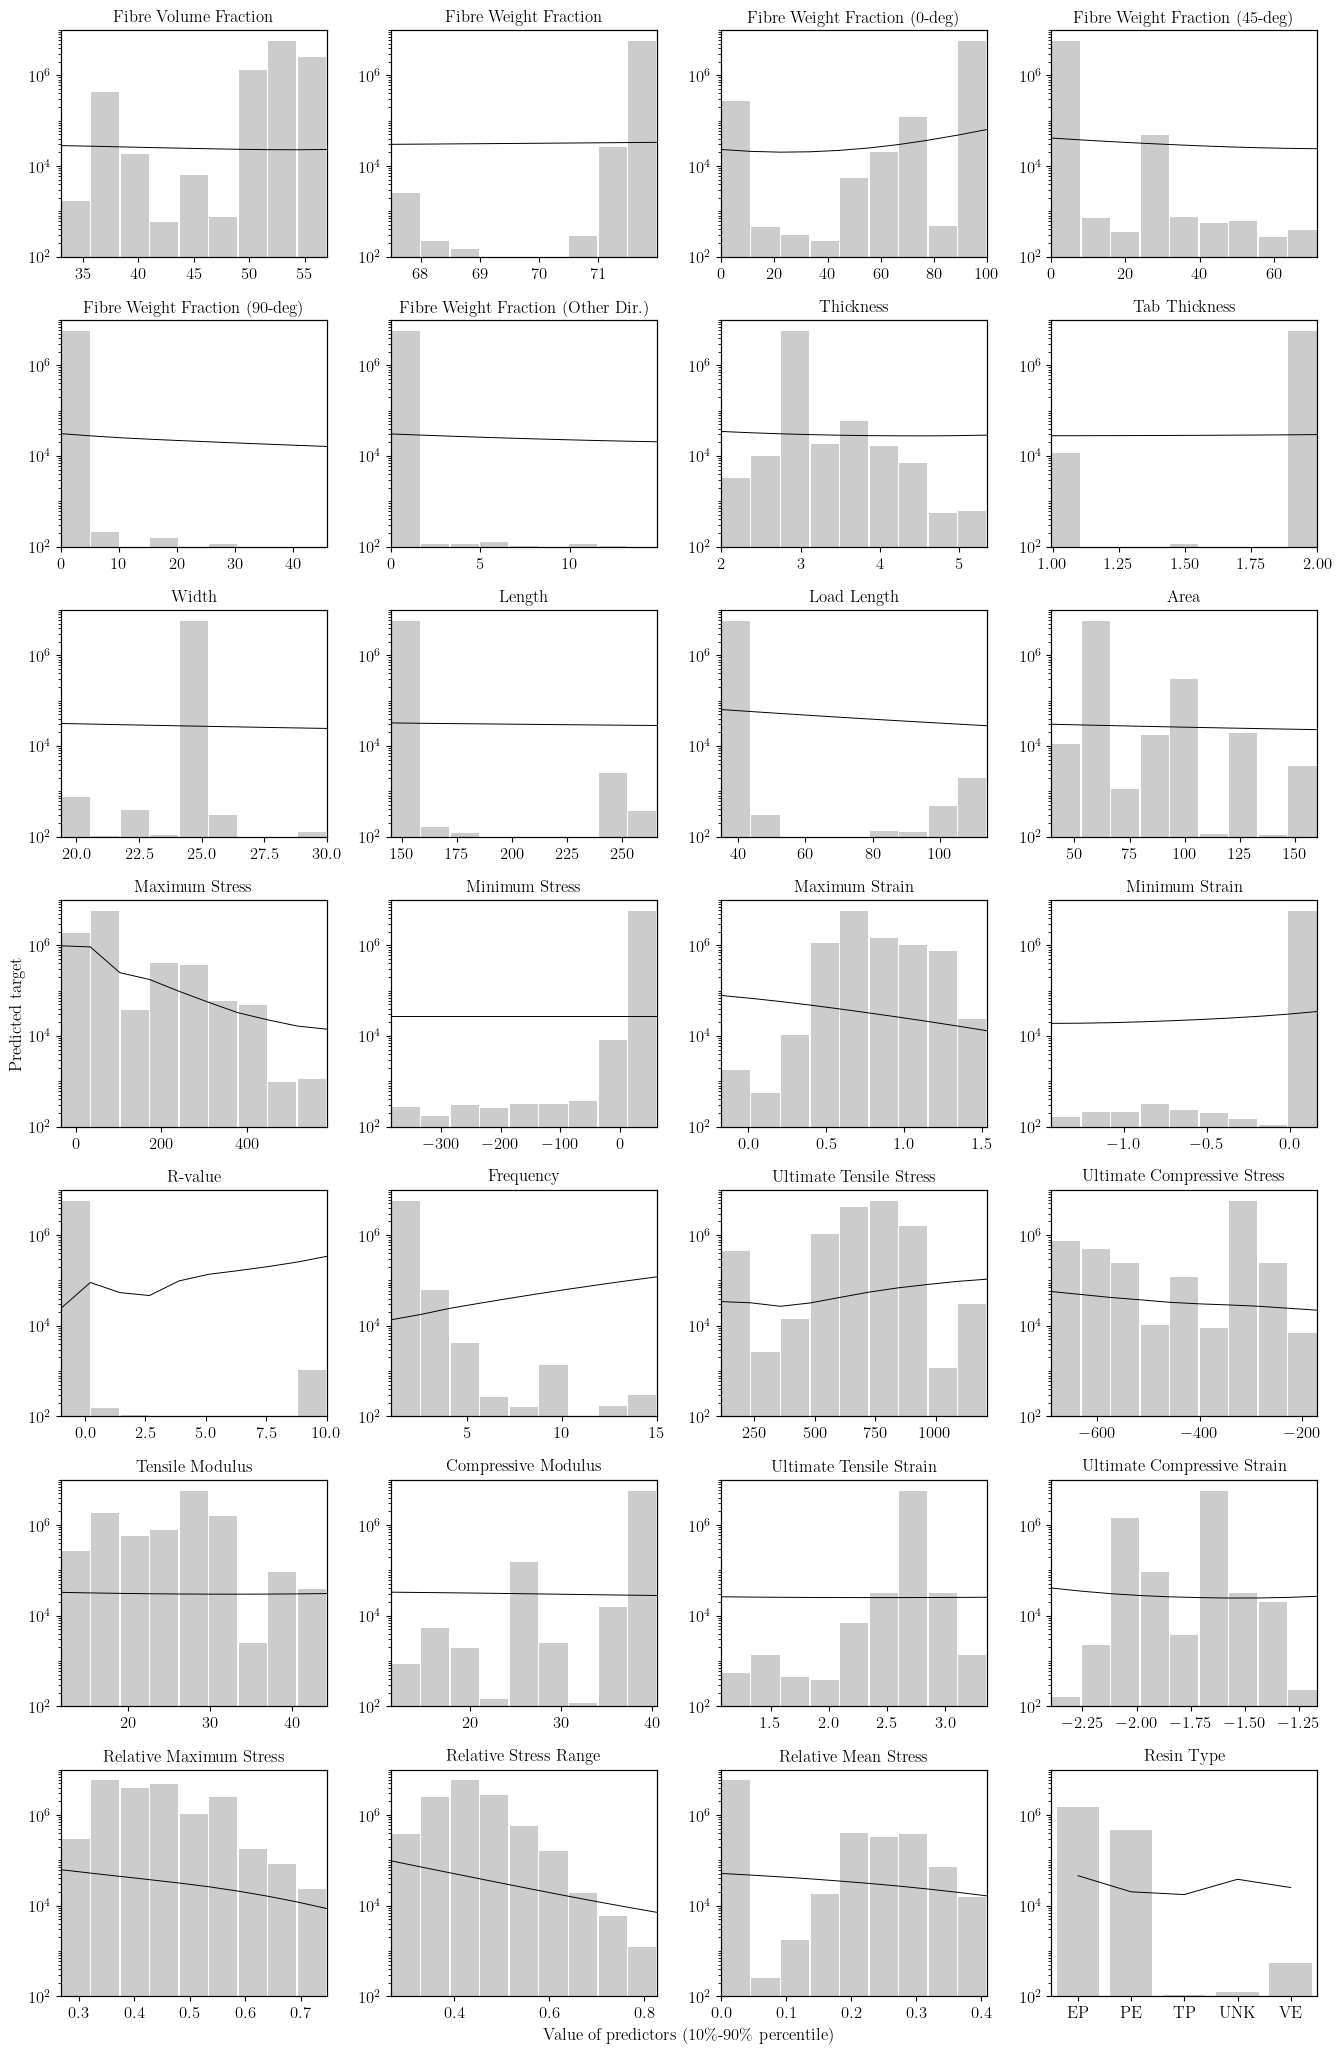

In [71]:
_ = trainer.plot_partial_dependence_all(
    program="PytorchTabular", model_name="Category Embedding", refit=False, grid_size=10
)

## Feature importance

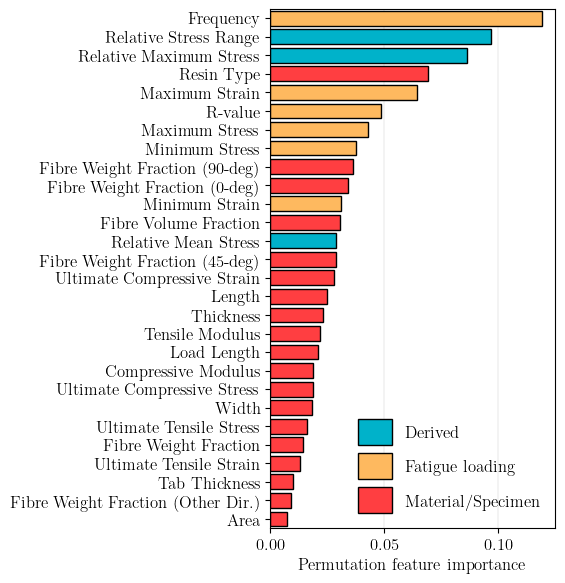

<AxesSubplot:xlabel='Permutation feature importance'>

In [74]:
trainer.plot_feature_importance(program="PytorchTabular", model_name="Category Embedding", method="permutation", figure_kwargs=dict(figsize=(6,6)))

shap.DeepExplainer cannot handle categorical features because their gradients (as float dtype) are zero, and integers can not require_grad. If shap values of categorical values are needed, pass `call_general_method=True` to use shap.KernelExplainer.


Feature importance less than 1e-5: ['Lay-up Sequence-0', 'Lay-up Sequence-1', 'Lay-up Sequence-10', 'Lay-up Sequence-11', 'Lay-up Sequence-12', 'Lay-up Sequence-13', 'Lay-up Sequence-14', 'Lay-up Sequence-15', 'Lay-up Sequence-16', 'Lay-up Sequence-17', 'Lay-up Sequence-18', 'Lay-up Sequence-19', 'Lay-up Sequence-2', 'Lay-up Sequence-20', 'Lay-up Sequence-21', 'Lay-up Sequence-22', 'Lay-up Sequence-23', 'Lay-up Sequence-24', 'Lay-up Sequence-25', 'Lay-up Sequence-26', 'Lay-up Sequence-27', 'Lay-up Sequence-28', 'Lay-up Sequence-29', 'Lay-up Sequence-3', 'Lay-up Sequence-30', 'Lay-up Sequence-31', 'Lay-up Sequence-32', 'Lay-up Sequence-33', 'Lay-up Sequence-34', 'Lay-up Sequence-35', 'Lay-up Sequence-4', 'Lay-up Sequence-5', 'Lay-up Sequence-6', 'Lay-up Sequence-7', 'Lay-up Sequence-8', 'Lay-up Sequence-9', 'Number of Layers', 'Resin Type', 'Unscaled-0', 'Unscaled-1', 'Unscaled-10', 'Unscaled-11', 'Unscaled-12', 'Unscaled-13', 'Unscaled-14', 'Unscaled-15', 'Unscaled-16', 'Unscaled-17', 

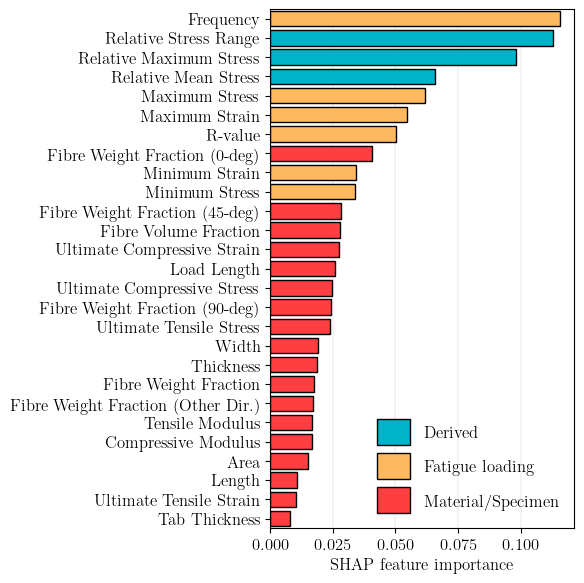

In [76]:
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", message="The 'nopython' keyword argument")
    warnings.filterwarnings("ignore", message="Using a non-full backward hook")
    trainer.plot_feature_importance(program="CatEmbed", model_name="Category Embedding", method="shap", figure_kwargs=dict(figsize=(6,6)))

## Cluster

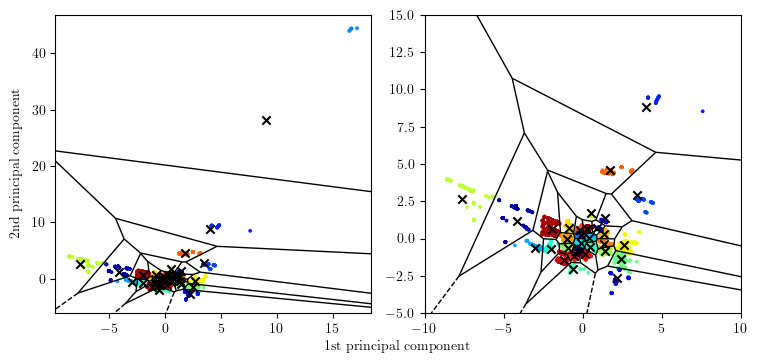

In [8]:
from scipy.spatial import Voronoi, voronoi_plot_2d

clustering_features = trainer.datamodule.get_feature_names_by_type("Material/Specimen") + ["Frequency", "R-value"]
clustering_features.remove("Resin Type")

partition = "all"

df_dict = {"train": trainer.datamodule.X_train, "val": trainer.datamodule.X_val, "test": trainer.datamodule.X_test, "all": trainer.df}
D_dict = {"train": trainer.datamodule.D_train, "val": trainer.datamodule.D_val, "test": trainer.datamodule.D_test, "all": trainer.derived_data}

x_clusters = models[-1].inspect_clusters(model_name="AutoGluon_Linear Regression_NoWrap_1L_PCA_KMeans", df=df_dict[partition], derived_data =D_dict[partition])

pca = trainer.datamodule.pca(feature_names=clustering_features, indices=trainer.datamodule.select_by_value(partition=partition))
model_pca = models[-1].model["AutoGluon_Linear Regression_NoWrap_1L_PCA_KMeans"].clustering_phy_model.clustering.pca

transformed_centers = models[-1].model["AutoGluon_Linear Regression_NoWrap_1L_PCA_KMeans"].clustering_phy_model.clustering.centers.cpu().numpy()
# Components of these two PCA are very close, but their signs (and the signs of clustering centers) might be different.
transformed_centers[:, 0] *= 1 if np.sign(model_pca.components_.numpy()[0,0]) == np.sign(pca.components_[0,0]) else -1
transformed_centers[:, 1] *= 1 if np.sign(model_pca.components_.numpy()[1,0]) == np.sign(pca.components_[1,0]) else -1
# centers_df = pd.DataFrame(columns=clustering_features, data=centers)
# pca = trainer.datamodule.pca(feature_names=clustering_features, indices=trainer.datamodule.select_by_value(partition=partition))
# transformed_centers = pca.transform(centers_df)

vor = Voronoi(points=transformed_centers)

indices = trainer.datamodule._get_indices(partition=partition)
order = np.argsort(indices)
cluster_sort = x_clusters[order]

fig = plt.figure(figsize=(8,4))
ax = plt.subplot(121)
trainer.plot_pca_2d_visual(ax=ax, features=clustering_features, select_by_value_kwargs=dict(partition=partition), scatter_kwargs=dict(edgecolor=None, color=None, c=cluster_sort, s=3, cmap="jet"))
ax.scatter(transformed_centers[:, 0], transformed_centers[:, 1], marker="x", color="k")
xlims = ax.get_xlim()
ylims = ax.get_ylim()
voronoi_plot_2d(vor, ax=ax, line_colors="k", show_points=False, show_vertices=False)
ax.set_xlim(xlims)
ax.set_ylim(ylims)

ax = plt.subplot(122)
trainer.plot_pca_2d_visual(ax=ax, features=clustering_features, select_by_value_kwargs=dict(partition=partition), scatter_kwargs=dict(edgecolor=None, color=None, c=cluster_sort, s=3, cmap="jet"))
ax.scatter(transformed_centers[:, 0], transformed_centers[:, 1], marker="x", color="k")
xlims = ax.get_xlim()
ylims = ax.get_ylim()
voronoi_plot_2d(vor, ax=ax, line_colors="k", show_points=False, show_vertices=False)
ax.set_xlim(xlims)
ax.set_ylim(ylims)

ax.set_xlim([-10, 10])
ax.set_ylim([-5, 15])

ax = fig.add_subplot(111, frameon=False)
ax.tick_params(
            labelcolor="none",
            which="both",
            top=False,
            bottom=False,
            left=False,
            right=False,
        )
ax.set_xlabel("1st principal component")
ax.set_ylabel("2nd principal component")
plt.show()

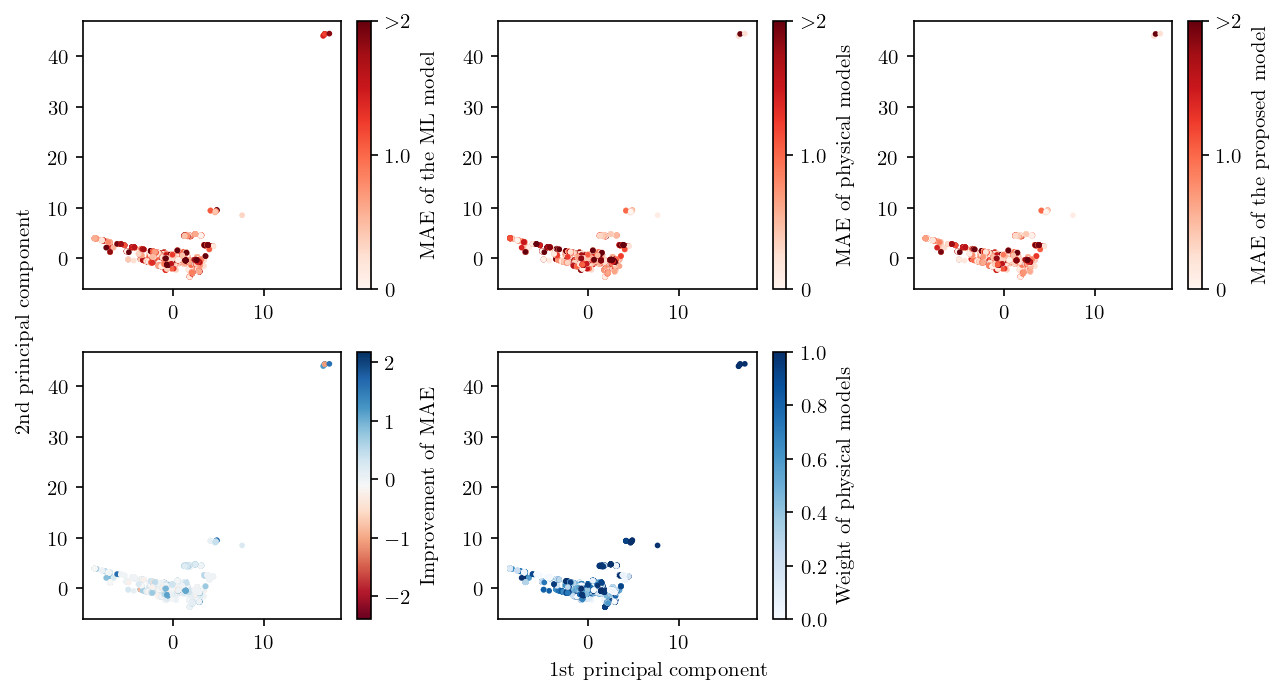

In [42]:
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from scipy.stats import pearsonr

clustering_features = trainer.datamodule.get_feature_names_by_type("Material/Specimen") + ["Frequency", "R-value"]
clustering_features.remove("Resin Type")

partition = "all"

base_model_pred = trainer.get_modelbase("AutoGluon")._predict_model_on_partition(model_name="Linear Regression", partition=partition)
thiswork_model_pred = trainer.get_modelbase("ThisWork")._predict_model_on_partition(model_name="AutoGluon_Linear Regression_NoWrap_1L_PCA_KMeans", partition=partition)
indices = trainer.datamodule._get_indices(partition=partition)
truth = trainer.df.loc[indices, trainer.label_name].values
order = np.argsort(indices)
base_model_err = np.abs(base_model_pred-truth)[order]
thiswork_model_err = np.abs(thiswork_model_pred-truth)[order]
# base_model_err[base_model_err > np.percentile(base_model_err, 90)] = np.percentile(base_model_err, 90)
# thiswork_model_err[thiswork_model_err > np.percentile(thiswork_model_err, 90)] = np.percentile(thiswork_model_err, 90)
improvement = base_model_err - thiswork_model_err

weight_dict = models[-1].inspect_weighted_predictions(model_name="AutoGluon_Linear Regression_NoWrap_1L_PCA_KMeans", df=df_dict[partition], derived_data=D_dict[partition])
dl_weight = weight_dict["USER_INPUT"]["dl_weight"][order]
dl_pred = weight_dict["USER_INPUT"]["dl_pred"][order]
phy_pred = weight_dict["USER_INPUT"]["phy_pred"][order]
phy_model_err = np.abs(phy_pred-truth)[order]

max_err = max([np.max(base_model_err), np.max(thiswork_model_err), np.max(phy_model_err)])
min_err = min([np.min(base_model_err), np.min(thiswork_model_err), np.min(phy_model_err)])

err_lim = 2

# Just a trick to have the same normalization for the colors
base_model_err_mod = base_model_err.copy()
base_model_err_mod[base_model_err==np.min(base_model_err)] = 0
base_model_err_mod[base_model_err>err_lim] = err_lim
fig = plt.figure(figsize=(9,5), dpi=150)
ax = plt.subplot(231)
trainer.plot_pca_2d_visual(ax=ax, features=clustering_features, select_by_value_kwargs=dict(partition=partition), scatter_kwargs=dict(edgecolor=None, color=None, s=3, c=base_model_err_mod, cmap="Reds"))
cbar = plt.colorbar(mappable=ScalarMappable(norm=Normalize(0, err_lim), cmap="Reds"), ax=ax, label="MAE of the ML model")
cbar.set_ticks([0, err_lim/2, err_lim])
cbar.set_ticklabels([0, err_lim/2, r"$>$" + str(err_lim)])

d = ax.collections[0]
points = d.get_offsets().data
center = np.mean(points, axis=0)

phy_model_err_mod = phy_model_err.copy()
phy_model_err_mod[phy_model_err==np.min(phy_model_err)] = 0
phy_model_err_mod[phy_model_err>err_lim] = err_lim
ax = plt.subplot(232)
trainer.plot_pca_2d_visual(ax=ax, features=clustering_features, select_by_value_kwargs=dict(partition=partition), scatter_kwargs=dict(edgecolor=None, color=None, s=3, c=phy_model_err_mod, cmap="Reds"))
cbar = plt.colorbar(mappable=ScalarMappable(norm=Normalize(0, err_lim), cmap="Reds"), ax=ax, label="MAE of physical models")
cbar.set_ticks([0, err_lim/2, err_lim])
cbar.set_ticklabels([0, err_lim/2, r"$>$" + str(err_lim)])

thiswork_model_err_mod = thiswork_model_err.copy()
thiswork_model_err_mod[thiswork_model_err==np.min(thiswork_model_err)] = 0
thiswork_model_err_mod[thiswork_model_err>err_lim] = err_lim
ax = plt.subplot(233)
trainer.plot_pca_2d_visual(ax=ax, features=clustering_features, select_by_value_kwargs=dict(partition=partition), scatter_kwargs=dict(edgecolor=None, color=None, s=3, c=thiswork_model_err_mod, cmap="Reds"))
cbar = plt.colorbar(mappable=ScalarMappable(norm=Normalize(0, err_lim), cmap="Reds"), ax=ax, label="MAE of the proposed model")
cbar.set_ticks([0, err_lim/2, err_lim])
cbar.set_ticklabels([0, err_lim/2, r"$>$" + str(err_lim)])

ax = plt.subplot(234)
trainer.plot_pca_2d_visual(ax=ax, features=clustering_features, select_by_value_kwargs=dict(partition=partition), scatter_kwargs=dict(edgecolor=None, color=None, s=3, c=improvement, cmap="RdBu"))
plt.colorbar(mappable=ScalarMappable(norm=Normalize(np.min(improvement), np.max(improvement)), cmap="RdBu"), ax=ax, label="Improvement of MAE")

# x = ax.scatter(center[0], center[1], marker="x", color="k")
# ax.legend(handles=[x], labels=["Center"], frameon=False, loc="upper left")

ax = plt.subplot(235)
trainer.plot_pca_2d_visual(ax=ax, features=clustering_features, select_by_value_kwargs=dict(partition=partition), scatter_kwargs=dict(edgecolor=None, color=None, s=3, c=1-dl_weight, cmap="Blues"))
plt.colorbar(mappable=ScalarMappable(norm=Normalize(np.max(dl_weight), np.min(dl_weight)), cmap="Blues"), ax=ax, label="Weight of physical models")


ax = fig.add_subplot(111, frameon=False)
ax.tick_params(
            labelcolor="none",
            which="both",
            top=False,
            bottom=False,
            left=False,
            right=False,
        )
ax.set_xlabel("1st principal component")
ax.set_ylabel("2nd principal component")

plt.show()

<AxesSubplot:label='<colorbar>', ylabel='MAE of the ML model'>

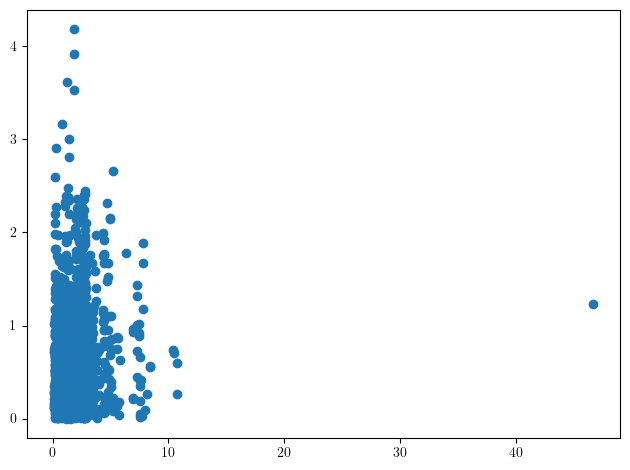

In [22]:
plt.figure()
ax = plt.subplot(111)
dist_center = np.sqrt(np.sum((points - center)**2, axis=-1))
ax.scatter(dist_center, base_model_err)
plt.show()

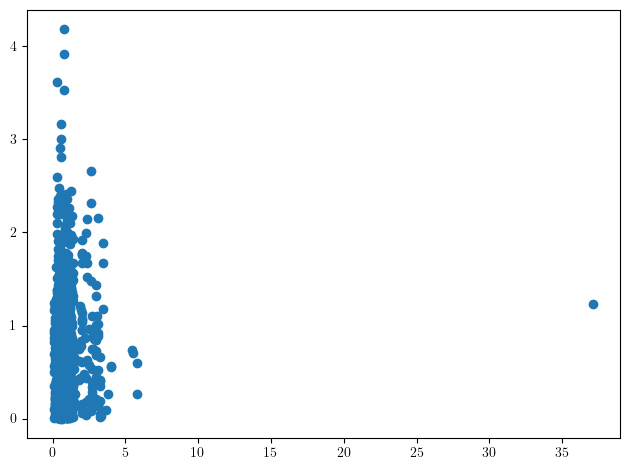

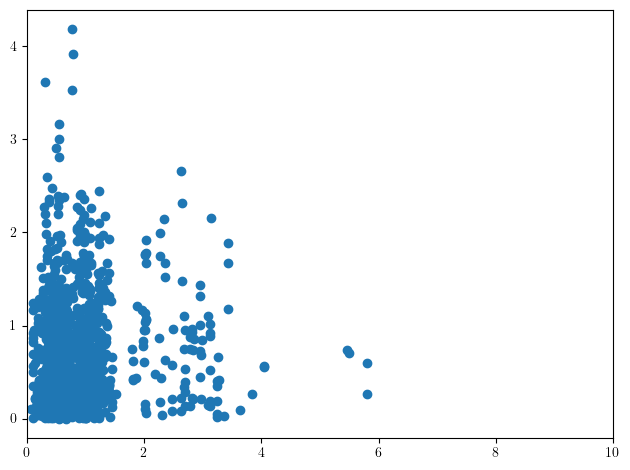

In [25]:
plt.figure()
ax = plt.subplot(111)
dist_centers = np.sqrt(np.sum((points[:, None, :] - transformed_centers[None, :, :])**2, axis=-1))
dist_centers[np.arange(len(cluster_sort)), cluster_sort] = np.nan
dist_center = np.nanmin(dist_centers, axis=-1)
ax.scatter(dist_center, base_model_err)
ax.set_xlim([0, 10])
plt.show()

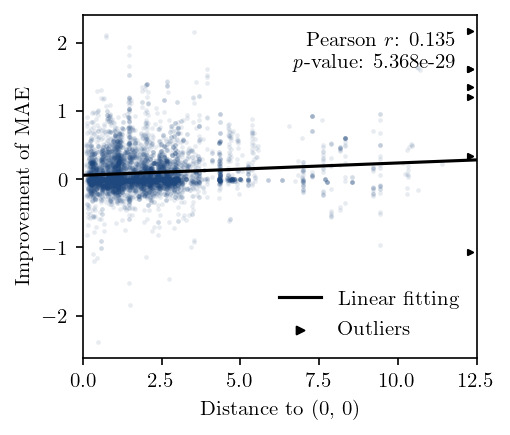

In [40]:
plt.figure(figsize=(3.5, 3), dpi=150)

# dist_centers = np.sqrt(np.sum((points[:, None, :] - transformed_centers[None, :, :])**2, axis=-1))
# dist_centers[np.arange(len(cluster_sort)), cluster_sort] = np.nan
# dist_center = np.nanmin(dist_centers, axis=-1)
dist_center = np.sqrt(np.sum((points - center)**2, axis=-1))

ax = plt.subplot(111)
ax.scatter(dist_center, improvement, alpha=0.1, s=5, facecolor=global_palette[6], edgecolor=None, linewidth=0)
pfit = np.polyfit(dist_center, improvement, 1)
k, b = pfit[0], pfit[1]
ax.plot(np.linspace(0, 40, 3), k*np.linspace(0, 40, 3)+b, color="k", label="Linear fitting")
r = pearsonr(improvement.flatten(), k*dist_center+b)
ax.text(.95, .95, s=f"Pearson $r$: {r[0]:.3f}"+"\n"+r"$\mathit{p}$"+f"-value: {r[1]:.3e}", ha='right', va='top', transform=ax.transAxes)

right = 12.5
ax.set_xlim(left=0, right=right)

where_exceed = dist_center > right
outliers = ax.scatter(np.ones(len(np.where(where_exceed)[0]))*right-0.2, improvement[where_exceed].flatten(), marker=">", color="k", s=6, edgecolor=None, label="Outliers")
ax.legend(loc="lower right", frameon=False, markerscale=1.5)

ax.set_xlabel("Distance to (0, 0)")
ax.set_ylabel("Improvement of MAE")

plt.show()

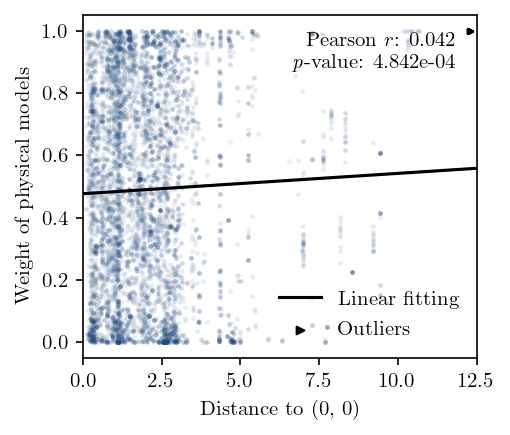

In [44]:
plt.figure(figsize=(3.5, 3), dpi=150)

# dist_centers = np.sqrt(np.sum((points[:, None, :] - transformed_centers[None, :, :])**2, axis=-1))
# dist_centers[np.arange(len(cluster_sort)), cluster_sort] = np.nan
# dist_center = np.nanmin(dist_centers, axis=-1)
dist_center = np.sqrt(np.sum((points - center)**2, axis=-1))

ax = plt.subplot(111)
ax.scatter(dist_center, 1-dl_weight, alpha=0.1, s=5, facecolor=global_palette[6], edgecolor=None, linewidth=0)
pfit = np.polyfit(dist_center, 1-dl_weight, 1)
k, b = pfit[0], pfit[1]
ax.plot(np.linspace(0, 40, 3), k*np.linspace(0, 40, 3)+b, color="k", label="Linear fitting")
r = pearsonr((1-dl_weight).flatten(), k*dist_center+b)
ax.text(.95, .95, s=f"Pearson $r$: {r[0]:.3f}"+"\n"+r"$\mathit{p}$"+f"-value: {r[1]:.3e}", ha='right', va='top', transform=ax.transAxes)

right = 12.5
ax.set_xlim(left=0, right=right)

where_exceed = dist_center > right
outliers = ax.scatter(np.ones(len(np.where(where_exceed)[0]))*right-0.2, (1-dl_weight)[where_exceed].flatten(), marker=">", color="k", s=6, edgecolor=None, label="Outliers")
ax.legend(loc="lower right", frameon=False, markerscale=1.5)

ax.set_xlabel("Distance to (0, 0)")
ax.set_ylabel("Weight of physical models")

plt.show()